# 📌 1. Introdução (FINALIZAR)

O objetivo deste projeto é construir modelos preditivos para **detectar churn de clientes em uma empresa de telecomunicações**, utilizando uma base de dados do Kaggle. A tarefa é de **classificação binária**, e envolve o uso de diferentes algoritmos, como redes neurais (MLP e Transformer), Random Forest, Gradient Boosting e mais.

Este notebook está organizado em seções por **responsável** e segue princípios de **código limpo** com **funções reutilizáveis**, documentação clara e visualizações apropriadas.

O grupo é composto por:

- Brenda  Guerra (bvga)
- Yasmin Maria Wanderley Soares (ymws)
- Gabriel Ferreira da Silva (gfs4)
- Lucas Santiago Monterazo (lsm6)
- Matheus Correia (mcr)


# ⚙️ 2. Metodologia

## 2.1. Etapas do projeto
O projeto foi dividido para ser feito por etapas, com cada membro responsável por uma etapa:
- **T1-T4 (lsm6)**: Pré-processamento dos dados, normalização, codificação e divisão dos conjuntos
- **T5-T6 (Pessoa 2)**: Modelagem com MLP e Transformer
- **T7-T8 (Pessoa 3)**: Modelagem com Random Forest e Gradient Boosting
- **T9-T11 (Pessoa 4)**: Avaliação e visualização dos modelos
- **T12-T14 (Pessoa 5)**: Integração, documentação e apresentação



# 🧹 3. Pré-processamento



## 3.1. Carregamento e inspeção inicial

In [ ]:
#dependencias
!pip install tabular-transformers

import importlib.util
from google.colab import files

def check_and_install(package):
    if importlib.util.find_spec(package) is None:
        !pip install {package} -qq

check_and_install('tensorflow')
check_and_install('numpy')
check_and_install('pandas')
check_and_install('scipy')
check_and_install('matplotlib')
check_and_install('scikit-learn')
check_and_install('kagglehub')
check_and_install('seaborn')
check_and_install('tabpfn')
check_and_install('torch')
check_and_install('tabular_transformers')


#libs
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import io
import os
from scipy import stats
from sklearn.metrics import mean_squared_error, log_loss, confusion_matrix, roc_auc_score, precision_score, recall_score, f1_score, roc_curve, auc
import seaborn as sns
%matplotlib inline

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.6/61.6 kB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 32.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 13.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 24.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 13.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 188.7/188.7 MB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 73.4 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12

In [ ]:
import kagglehub
import os
import pandas as pd

# Download do dataset pelo Kaggle
dataset_path = kagglehub.dataset_download("kapturovalexander/customers-churned-in-telecom-services")
csv_filename = 'customer_churn_telecom_services.csv' # Corrected filename
csv_filepath = os.path.join(dataset_path, csv_filename) # Construct the correct file path

#loading the dataset -- #decoding the files as uploaded will be a dictionary of keys (the file names) and values (the encoded file objects)

churn = pd.read_csv(csv_filepath)
display(churn.head())

gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  Female              0     Yes         No       1           No   
1    Male              0      No         No      34          Yes   
2    Male              0      No         No       2          Yes   
3    Male              0      No         No      45           No   
4  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity OnlineBackup  \
0  No phone service             DSL             No          Yes   
1                No             DSL            Yes           No   
2                No             DSL            Yes          Yes   
3  No phone service             DSL            Yes           No   
4                No     Fiber optic             No           No   

  DeviceProtection TechSupport StreamingTV StreamingMovies        Contract  \
0               No          No          No              No  Month-to-month   
1              Yes          No          No              No        One year   
2               No          No          No              No  Month-to-month   
3              Yes         Yes          No              No        One year   
4               No          No          No              No  Month-to-month   

  PaperlessBilling              PaymentMethod  MonthlyCharges  TotalCharges  \
0              Yes           Electronic check           29.85         29.85   
1               No               Mailed check           56.95       1889.50   
2              Yes               Mailed check           53.85        108.15   
3               No  Bank transfer (automatic)           42.30       1840.75   
4              Yes           Electronic check           70.70        151.65   

  Churn  
0    No  
1    No  
2   Yes  
3    No  
4   Yes

## 3.2. Limpeza dos dados (nulos, inconsistências, outliers)

In [ ]:
def tratar_dados(df):
    # Remove irrelevant columns if any (none identified in this dataset initially)
    # Handle 'TotalCharges' which is object type and contains some spaces
    # Replace spaces with NaN and then convert to numeric
    df['TotalCharges'] = df['TotalCharges'].replace(' ', np.nan)
    df['TotalCharges'] = pd.to_numeric(df['TotalCharges'])

    # Remove rows with missing values (introduced by the above step or originally present)
    df = df.dropna()

    # Handle inconsistencies in categorical strings (extra spaces, capitalization)
    for col in df.select_dtypes(include='object').columns:
        df[col] = df[col].astype(str).str.strip().str.lower()

    return df

## 3.3. Codificação e normalização

- Codificação para redes (one-hot + normalização)

- Codificação para árvores (label ou nada)

In [ ]:
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Identify categorical and numerical features
def get_feature_types(df, target='Churn'):
    categorical_features = df.select_dtypes(include='object').columns.tolist()
    if target in categorical_features:
        categorical_features.remove(target)
    numeric_features = df.select_dtypes(include=np.number).columns.tolist()
    return categorical_features, numeric_features

# Preprocessing for Neural Networks (One-Hot Encoding + Scaling)
def preprocess_for_nn(df, target='Churn'):
    df_processed = df.copy()
    categorical_features, numeric_features = get_feature_types(df_processed, target=target)

    # Separate target variable before processing
    y = df_processed[target].apply(lambda x: 1 if x == 'yes' else 0) # Convert Churn to 0/1
    X = df_processed.drop(target, axis=1)


    # Create a column transformer for applying different transformations to different columns
    preprocessor = ColumnTransformer(
        transformers=[
            ('num', StandardScaler(), numeric_features),
            ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)])

    # Create a preprocessing pipeline
    pipeline = Pipeline(steps=[('preprocessor', preprocessor)])

    X_processed = pipeline.fit_transform(X)
    return X_processed, y, pipeline # Return pipeline to be used for transforming new data

# Preprocessing for Tree-based Models (Label Encoding - for categorical features where order doesn't matter, or leave as is for some algorithms)
# For simplicity and compatibility with most tree models in sklearn, we'll use Label Encoding for object types.
def preprocess_for_trees(df, target='Churn'):
    df_processed = df.copy()
    # Convert target to numeric
    print(df_processed[target].value_counts())
    df_processed[target] = df_processed[target].apply(lambda x: 1 if x == 'yes' else 0)

    for col in df_processed.select_dtypes(include='object').columns:
        df_processed[col] = LabelEncoder().fit_transform(df_processed[col])

    X = df_processed.drop(target, axis=1)
    y = df_processed[target]

    return X, y

## 3.4. Divisão dos dados (treino, validação, teste)

In [ ]:
from sklearn.model_selection import train_test_split

def dividir_dados(X, y):
    X_trainval, X_test, y_trainval, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
    X_train, X_val, y_train, y_val = train_test_split(X_trainval, y_trainval, test_size=0.25, random_state=42, stratify=y_trainval)

    return X_train, X_val, X_test, y_train, y_val, y_test

## 3.5 Feature Engineering

In [ ]:
def create_engineered_features(df):
    df_engineered = df.copy()

    df_engineered['AvgMonthlyCharge_per_Tenure'] = df_engineered.apply(
        lambda row: row['TotalCharges'] / row['tenure'] if row['tenure'] > 0 else 0, axis=1
    )

    optional_services = ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']
    for col in optional_services:
        if col in df_engineered.columns:
            # Ensure consistent handling of 'No internet service' or similar
            df_engineered[col] = df_engineered[col].apply(lambda x: 1 if x == 'Yes' else 0)
    df_engineered['NumExtraServices'] = df_engineered[optional_services].sum(axis=1)

    if 'InternetService' in df_engineered.columns and 'Contract' in df_engineered.columns:
         df_engineered['InternetService_Contract'] = df_engineered['InternetService'] + '_' + df_engineered['Contract']

    if 'PaymentMethod' in df_engineered.columns:
        df_engineered['IsElectronicCheck'] = df_engineered['PaymentMethod'].apply(lambda x: 1 if x == 'Electronic check' else 0)

    return df_engineered

# Apply the feature engineering step to your cleaned data
# Make sure to run the 'tratar_dados' function first to get 'churn_cleaned'
churn_cleaned = tratar_dados(churn.copy())
churn_cleaned_engineered = create_engineered_features(churn_cleaned.copy())

print("Original columns:", churn_cleaned.columns.tolist())
print("Columns after feature engineering:", churn_cleaned_engineered.columns.tolist())
display(churn_cleaned_engineered[['tenure', 'MonthlyCharges', 'TotalCharges', 'AvgMonthlyCharge_per_Tenure', 'NumExtraServices', 'InternetService_Contract', 'IsElectronicCheck']].head())

Original columns: ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn']
Columns after feature engineering: ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn', 'AvgMonthlyCharge_per_Tenure', 'NumExtraServices', 'InternetService_Contract', 'IsElectronicCheck']


tenure  MonthlyCharges  TotalCharges  AvgMonthlyCharge_per_Tenure  \
0       1           29.85         29.85                    29.850000   
1      34           56.95       1889.50                    55.573529   
2       2           53.85        108.15                    54.075000   
3      45           42.30       1840.75                    40.905556   
4       2           70.70        151.65                    75.825000   

   NumExtraServices    InternetService_Contract  IsElectronicCheck  
0                 0          dsl_month-to-month                  0  
1                 0                dsl_one year                  0  
2                 0          dsl_month-to-month                  0  
3                 0                dsl_one year                  0  
4                 0  fiber optic_month-to-month                  0

In [ ]:

display(churn_cleaned_engineered.head())

gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  female              0     yes         no       1           no   
1    male              0      no         no      34          yes   
2    male              0      no         no       2          yes   
3    male              0      no         no      45           no   
4  female              0      no         no       2          yes   

      MultipleLines InternetService  OnlineSecurity  OnlineBackup  ...  \
0  no phone service             dsl               0             0  ...   
1                no             dsl               0             0  ...   
2                no             dsl               0             0  ...   
3  no phone service             dsl               0             0  ...   
4                no     fiber optic               0             0  ...   

         Contract  PaperlessBilling              PaymentMethod  \
0  month-to-month               yes           electronic check   
1        one year                no               mailed check   
2  month-to-month               yes               mailed check   
3        one year                no  bank transfer (automatic)   
4  month-to-month               yes           electronic check   

   MonthlyCharges TotalCharges Churn AvgMonthlyCharge_per_Tenure  \
0           29.85        29.85    no                   29.850000   
1           56.95      1889.50    no                   55.573529   
2           53.85       108.15   yes                   54.075000   
3           42.30      1840.75    no                   40.905556   
4           70.70       151.65   yes                   75.825000   

   NumExtraServices    InternetService_Contract IsElectronicCheck  
0                 0          dsl_month-to-month                 0  
1                 0                dsl_one year                 0  
2                 0          dsl_month-to-month                 0  
3                 0                dsl_one year                 0  
4                 0  fiber optic_month-to-month                 0  

[5 rows x 24 columns]

## 3.6. Visualização inicial dos dados

In [ ]:
# Apply data cleaning
churn_cleaned = tratar_dados(churn.copy())

# Apply feature engineering
churn_engineered = create_engineered_features(churn_cleaned.copy())

churn_minority = churn_engineered[churn_engineered['Churn'] == 'yes']
churn_majority = churn_engineered[churn_engineered['Churn'] == 'no']

churn_minority_duplicated = pd.concat([churn_minority]*3, ignore_index=True)

churn_balanced = pd.concat([churn_majority, churn_minority_duplicated], ignore_index=True)


In [ ]:

# Preprocessing and Splitting for Neural Networks
X_processed_nn, y_nn, pipeline_nn = preprocess_for_nn(churn_balanced.copy())
X_train_nn, X_val_nn, X_test_nn, y_train_nn, y_val_nn, y_test_nn = dividir_dados(X_processed_nn, y_nn)

# Preprocessing and Splitting for Tree-based Models
X_processed_trees, y_trees = preprocess_for_trees(churn_balanced.copy())
X_train_trees, X_val_trees, X_test_trees, y_train_trees, y_val_trees, y_test_trees = dividir_dados(X_processed_trees, y_trees)



Churn
yes    5607
no     5163
Name: count, dtype: int64


In [ ]:

print("Data preprocessing and splitting complete.")
print("\nShapes for Neural Networks:")
print("X_train_nn:", X_train_nn.shape)
print("X_val_nn:", X_val_nn.shape)
print("X_test_nn:", X_test_nn.shape)
print("y_train_nn:", y_train_nn.shape)
print("y_val_nn:", y_val_nn.shape)
print("y_test_nn:", y_test_nn.shape)

print("\nShapes for Tree-based Models:")
print("X_train_trees:", X_train_trees.shape)
print("X_val_trees:", X_val_trees.shape)
print("X_test_trees:", X_test_trees.shape)
print("y_train_trees:", y_train_trees.shape)
print("y_val_trees:", y_val_trees.shape)
print("y_test_trees:", y_test_trees.shape)

Data preprocessing and splitting complete.

Shapes for Neural Networks:
X_train_nn: (6462, 45)
X_val_nn: (2154, 45)
X_test_nn: (2154, 45)
y_train_nn: (6462,)
y_val_nn: (2154,)
y_test_nn: (2154,)

Shapes for Tree-based Models:
X_train_trees: (6462, 23)
X_val_trees: (2154, 23)
X_test_trees: (2154, 23)
y_train_trees: (6462,)
y_val_trees: (2154,)
y_test_trees: (2154,)


In [ ]:
print(y_nn.value_counts())


Churn
1    5607
0    5163
Name: count, dtype: int64



--- Data after Cleaning ---
Shape before cleaning: (7043, 20)
Shape after cleaning: (7032, 20)

Missing values after cleaning:
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

--- Visualizing outliers after cleaning ---


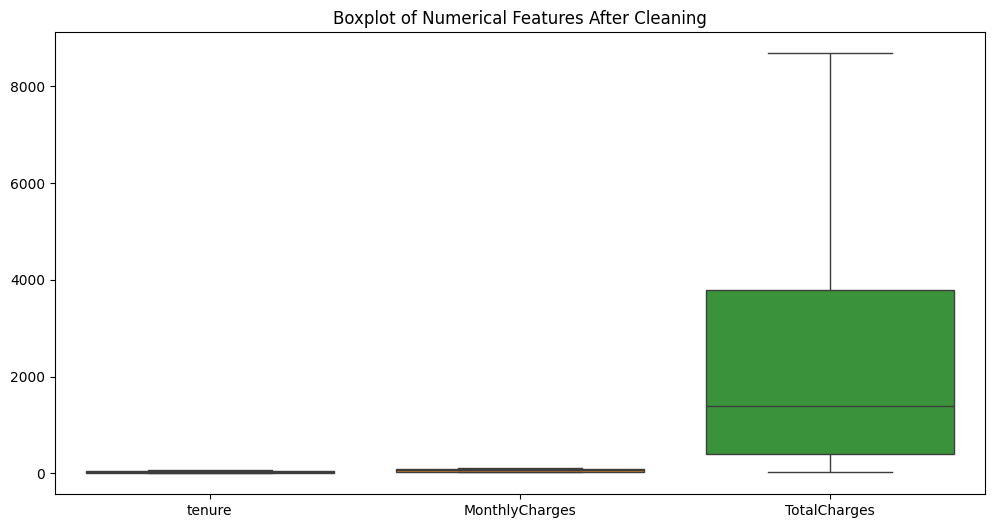


--- Data after Feature Engineering ---
Shape after Feature Engineering: (7032, 24)


tenure  MonthlyCharges  TotalCharges  AvgMonthlyCharge_per_Tenure  \
0       1           29.85         29.85                    29.850000   
1      34           56.95       1889.50                    55.573529   
2       2           53.85        108.15                    54.075000   
3      45           42.30       1840.75                    40.905556   
4       2           70.70        151.65                    75.825000   

   NumExtraServices    InternetService_Contract  IsElectronicCheck  
0                 0          dsl_month-to-month                  0  
1                 0                dsl_one year                  0  
2                 0          dsl_month-to-month                  0  
3                 0                dsl_one year                  0  
4                 0  fiber optic_month-to-month                  0


--- Data after Encoding (for Neural Networks) ---
Shape after One-Hot Encoding and Scaling: (10770, 45)


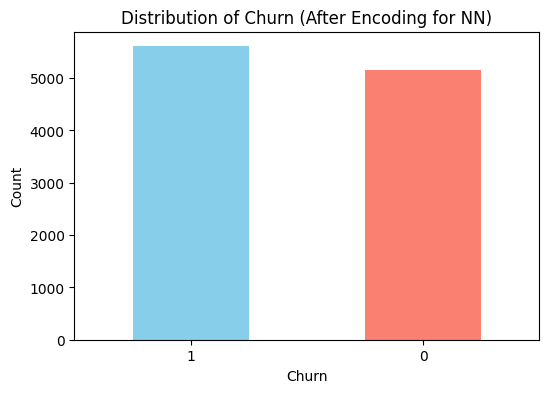


--- Data after Encoding (for Tree-based Models) ---
Shape after Label Encoding: (10770, 23)


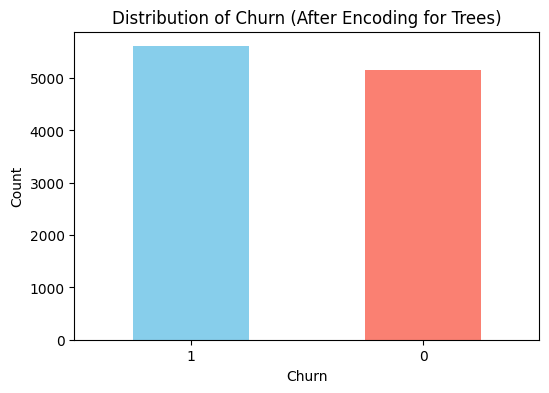


--- Data after Splitting (Example for Neural Networks) ---
Shape of X_train_nn: (6462, 45)
Shape of X_val_nn: (2154, 45)
Shape of X_test_nn: (2154, 45)
Shape of y_train_nn: (6462,)
Shape of y_val_nn: (2154,)
Shape of y_test_nn: (2154,)


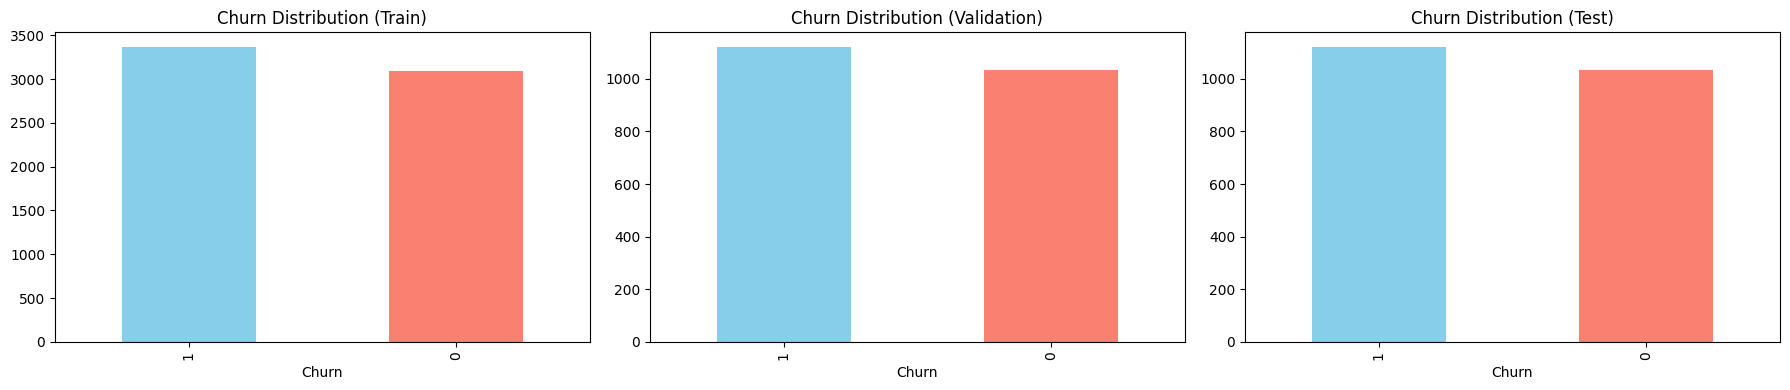

In [ ]:
print("\n--- Data after Cleaning ---")
print("Shape before cleaning:", churn.shape)
print("Shape after cleaning:", churn_cleaned.shape)
print("\nMissing values after cleaning:")
print(churn_cleaned.isnull().sum())

print("\n--- Visualizing outliers after cleaning ---")
plt.figure(figsize=(12, 6))
sns.boxplot(data=churn_cleaned[['tenure', 'MonthlyCharges', 'TotalCharges']])
plt.title('Boxplot of Numerical Features After Cleaning')
plt.show()


print("\n--- Data after Feature Engineering ---")
print("Shape after Feature Engineering:", churn_engineered.shape)
display(churn_engineered[['tenure', 'MonthlyCharges', 'TotalCharges', 'AvgMonthlyCharge_per_Tenure', 'NumExtraServices', 'InternetService_Contract', 'IsElectronicCheck']].head())


print("\n--- Data after Encoding (for Neural Networks) ---")
print("Shape after One-Hot Encoding and Scaling:", X_processed_nn.shape)
# Visualize the distribution of the target variable in the processed data.
plt.figure(figsize=(6, 4))
pd.Series(y_nn).value_counts().plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Distribution of Churn (After Encoding for NN)')
plt.xlabel('Churn')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()


print("\n--- Data after Encoding (for Tree-based Models) ---")
print("Shape after Label Encoding:", X_processed_trees.shape)
# Visualize the distribution of the target variable again.
plt.figure(figsize=(6, 4))
pd.Series(y_trees).value_counts().plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Distribution of Churn (After Encoding for Trees)')
plt.xlabel('Churn')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()


print("\n--- Data after Splitting (Example for Neural Networks) ---")
print("Shape of X_train_nn:", X_train_nn.shape)
print("Shape of X_val_nn:", X_val_nn.shape)
print("Shape of X_test_nn:", X_test_nn.shape)
print("Shape of y_train_nn:", y_train_nn.shape)
print("Shape of y_val_nn:", y_val_nn.shape)
print("Shape of y_test_nn:", y_test_nn.shape)

# Visualize the distribution of the target variable in each split to check stratification.
plt.figure(figsize=(18, 4))
plt.subplot(1, 3, 1)
pd.Series(y_train_nn).value_counts().plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Churn Distribution (Train)')
plt.subplot(1, 3, 2)
pd.Series(y_val_nn).value_counts().plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Churn Distribution (Validation)')
plt.subplot(1, 3, 3)
pd.Series(y_test_nn).value_counts().plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Churn Distribution (Test)')
plt.tight_layout()
plt.show()

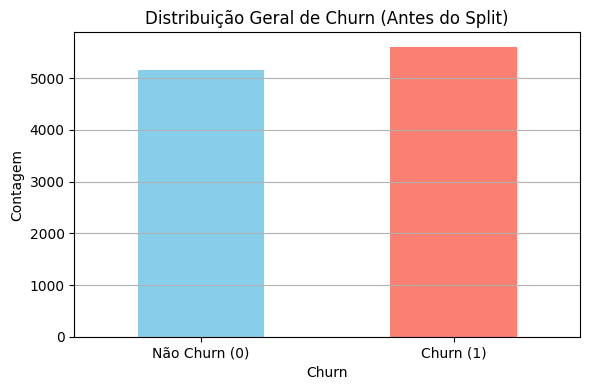

In [ ]:

plt.figure(figsize=(6, 4))
pd.Series(y_nn).value_counts().sort_index().plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Distribuição Geral de Churn (Antes do Split)')
plt.xticks([0, 1], ['Não Churn (0)', 'Churn (1)'], rotation=0)
plt.xlabel('Churn')
plt.ylabel('Contagem')
plt.grid(axis='y')
plt.tight_layout()
plt.show()



# 🧠 4. Modelagem com Redes Neurais (Pessoa 2)

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score
import numpy as np
import tensorflow as tf

def auc_roc(y_true, y_pred_prob):
    auc = roc_auc_score(y_true, y_pred_prob)
    return auc

def ks_statistic(y_true, y_pred):
    ks_stat, p_value = stats.ks_2samp(y_true, y_pred)
    return ks_stat, p_value
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score
import numpy as np
import tensorflow as tf

class RocKsCallback(tf.keras.callbacks.Callback):
    def __init__(self, X_val, y_val, plot_interval=25):
        super().__init__()
        self.X_val = X_val
        self.y_val = y_val
        self.plot_interval = plot_interval

    def on_epoch_end(self, epoch, logs=None):
        y_pred_proba = self.model.predict(self.X_val, verbose=0).ravel()

        # ROC AUC
        fpr, tpr, thresholds = roc_curve(self.y_val, y_pred_proba)
        roc_auc = roc_auc_score(self.y_val, y_pred_proba)

        # KS
        ks_statistic = np.max(np.abs(tpr - fpr))
        ks_threshold = thresholds[np.argmax(np.abs(tpr - fpr))]

        print(f"Epoch {epoch+1} - ROC AUC: {roc_auc:.4f} | KS: {ks_statistic:.4f}")

        # Plot & show in Colab
        if (epoch + 1) % self.plot_interval == 0:
            fig, axs = plt.subplots(1, 2, figsize=(10, 4))

            # ROC plot
            axs[0].plot(fpr, tpr, label=f'AUC = {roc_auc:.3f}')
            axs[0].plot([0, 1], [0, 1], 'k--')
            axs[0].set_title(f'ROC Curve - Epoch {epoch+1}')
            axs[0].set_xlabel('FPR')
            axs[0].set_ylabel('TPR')
            axs[0].legend()
            axs[0].grid(True)

            # KS plot
            axs[1].plot(thresholds, tpr, label='TPR')
            axs[1].plot(thresholds, fpr, label='FPR')
            axs[1].axvline(ks_threshold, color='r', linestyle='--',
                           label=f'KS = {ks_statistic:.3f}')
            axs[1].set_title('KS Curve')
            axs[1].set_xlabel('Threshold')
            axs[1].set_ylabel('Rate')
            axs[1].legend()
            axs[1].grid(True)

            plt.tight_layout()
            plt.show()
            plt.savefig(f'roc_ks_epoch_{epoch+1}.png', dpi=300)




In [ ]:

model = Sequential([
    Dense(10, activation='relu', input_shape=(X_train_nn.shape[1],)),
    Dense(1, activation='sigmoid')  # Saída binária
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
early_stop = EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)
history = model.fit(
    X_train_nn, y_train_nn,
    validation_data=(X_val_nn, y_val_nn),
    epochs=500,
    callbacks=[early_stop, RocKsCallback(X_val_nn, y_val_nn)],
    verbose=1,
    batch_size=32
)

model.save('nn_1camada.h5')
files.download('nn_1camada.h5')


# 9. Avaliação
loss, acc = model.evaluate(X_val_nn, y_val_nn, verbose=0)
print(f"\n✅ Validação final — Loss: {loss:.4f}, Accuracy: {acc:.4f}")

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, precision_score, recall_score, f1_score

y_pred_probs = model.predict(X_test_nn)
y_pred = (y_pred_probs > 0.5).astype(int).flatten()

precision = precision_score(y_test_nn, y_pred)
recall = recall_score(y_test_nn, y_pred)
f1 = f1_score(y_test_nn, y_pred)

print("\n📊 Classification Report:\n")
print(classification_report(y_test_nn, y_pred, target_names=["Não Churn", "Churn"]))


68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step

📊 Classification Report:

              precision    recall  f1-score   support

   Não Churn       0.77      0.68      0.72      1033
       Churn       0.74      0.81      0.77      1121

    accuracy                           0.75      2154
   macro avg       0.75      0.75      0.75      2154
weighted avg       0.75      0.75      0.75      2154



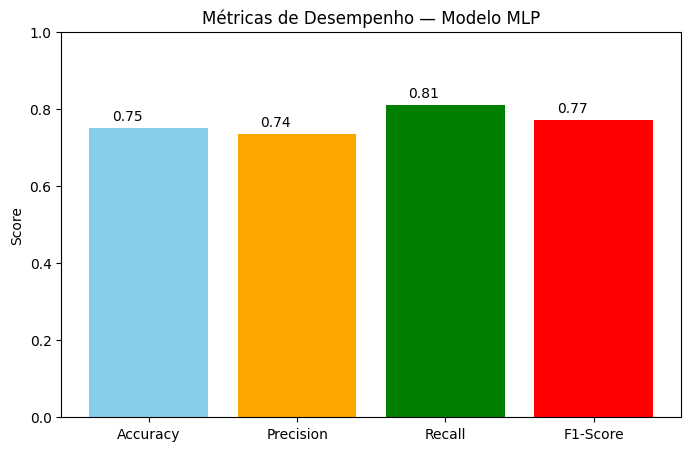

In [ ]:
import matplotlib.pyplot as plt

metrics_names = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
metrics_values = [
    model.evaluate(X_test_nn, y_test_nn, verbose=0)[1],  # accuracy from model
    precision,
    recall,
    f1
]

plt.figure(figsize=(8, 5))
bars = plt.bar(metrics_names, metrics_values, color=['skyblue', 'orange', 'green', 'red'])
plt.ylim(0, 1)
plt.title('Métricas de Desempenho — Modelo MLP')
plt.ylabel('Score')
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + 0.15, yval + 0.02, f'{yval:.2f}')
plt.show()


Epoch 1/500
188/202 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5704 - loss: 0.6808Epoch 1 - ROC AUC: 0.7877 | KS: 0.4713
202/202 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.5750 - loss: 0.6789 - val_accuracy: 0.7335 - val_loss: 0.6063
Epoch 2/500
184/202 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7026 - loss: 0.6137Epoch 2 - ROC AUC: 0.7924 | KS: 0.4767
202/202 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.7034 - loss: 0.6125 - val_accuracy: 0.7344 - val_loss: 0.5607
Epoch 3/500
185/202 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7258 - loss: 0.5760Epoch 3 - ROC AUC: 0.7995 | KS: 0.4831
202/202 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.7267 - loss: 0.5750 - val_accuracy: 0.7428 - val_loss: 0.5437
Epoch 4/500
184/202 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7479 - loss: 0.5541Epoch 4 - ROC AUC: 0.8078 | KS: 0.4858
202/202 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7473 - loss: 0.5543 - val_accuracy: 0.7428 - val_loss: 0.5369
Epoch 5/500
185/202 ━━━━━━━━━━━━

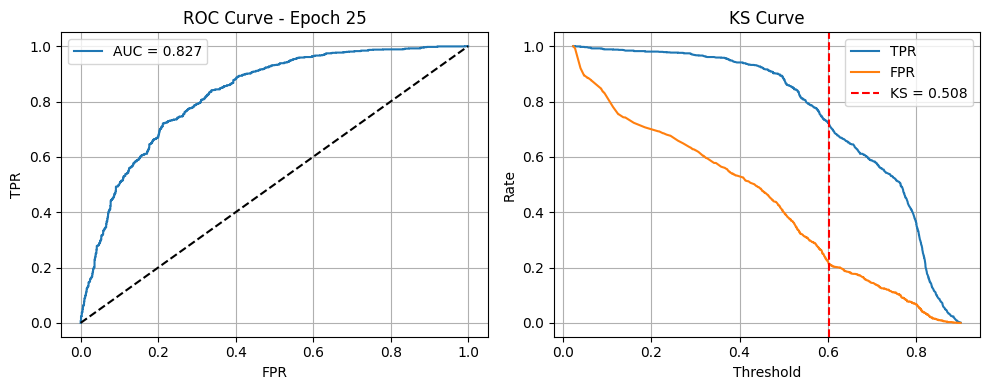

202/202 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7485 - loss: 0.5157 - val_accuracy: 0.7465 - val_loss: 0.5159
Epoch 26/500
201/202 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7586 - loss: 0.5170Epoch 26 - ROC AUC: 0.8258 | KS: 0.5018
202/202 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7586 - loss: 0.5170 - val_accuracy: 0.7447 - val_loss: 0.5145
Epoch 27/500
181/202 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7505 - loss: 0.5263Epoch 27 - ROC AUC: 0.8265 | KS: 0.5054
202/202 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7516 - loss: 0.5247 - val_accuracy: 0.7461 - val_loss: 0.5149
Epoch 28/500
190/202 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7546 - loss: 0.5185Epoch 28 - ROC AUC: 0.8259 | KS: 0.5011
202/202 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7546 - loss: 0.5182 - val_accuracy: 0.7474 - val_loss: 0.5151
Epoch 29/500
187/202 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7623 - loss: 0.4979Epoch 29 - ROC AUC: 0.8255 | KS: 0.5031
202/202 ━━━━━━━━━━━━━━━━

<Figure size 640x480 with 0 Axes>

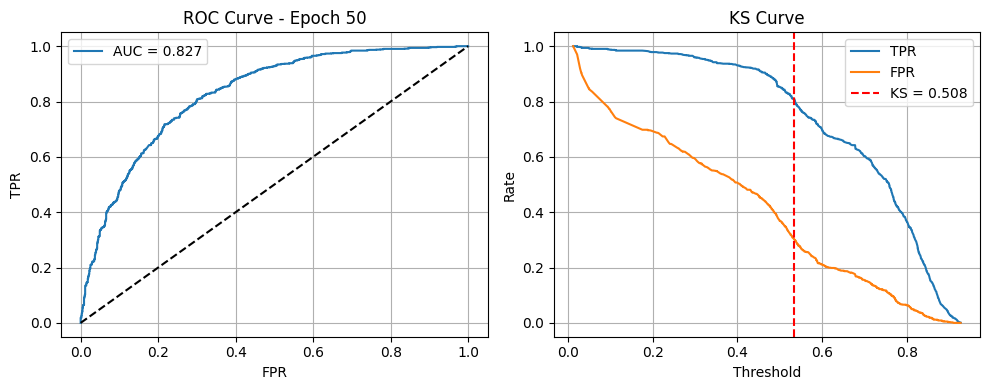

202/202 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.7618 - loss: 0.5086 - val_accuracy: 0.7461 - val_loss: 0.5126
Epoch 51/500
185/202 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7689 - loss: 0.5030Epoch 51 - ROC AUC: 0.8263 | KS: 0.5002
202/202 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7683 - loss: 0.5034 - val_accuracy: 0.7461 - val_loss: 0.5131
Epoch 52/500
180/202 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7701 - loss: 0.4927Epoch 52 - ROC AUC: 0.8267 | KS: 0.5024
202/202 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7692 - loss: 0.4937 - val_accuracy: 0.7405 - val_loss: 0.5216
Epoch 53/500
181/202 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7601 - loss: 0.4948Epoch 53 - ROC AUC: 0.8270 | KS: 0.4999
202/202 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7603 - loss: 0.4960 - val_accuracy: 0.7419 - val_loss: 0.5165
Epoch 54/500
183/202 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7629 - loss: 0.5039Epoch 54 - ROC AUC: 0.8270 | KS: 0.4998
202/202 ━━━━━━━━━━━━━━━━

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


✅ Validação final — Loss: 0.5108, Accuracy: 0.7447


<Figure size 640x480 with 0 Axes>

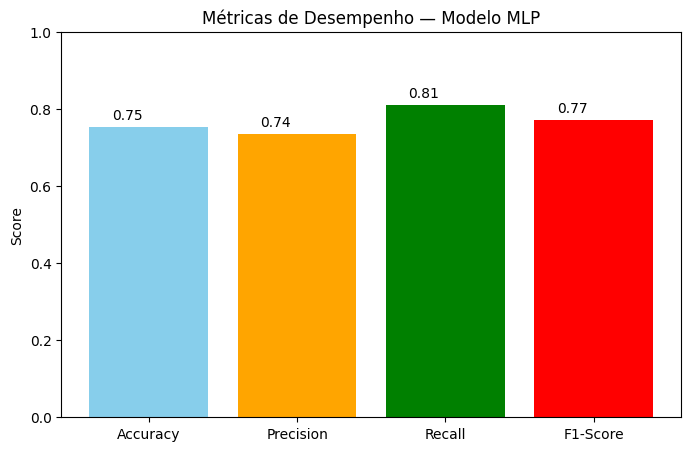

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

model = Sequential([
    Dense(10, activation='relu', input_shape=(X_train_nn.shape[1],)),
    Dropout(0.3),  # 30% dos neurônios desativados nessa camada
    Dense(10, activation='relu'),
    Dropout(0.3),  # Outro dropout antes da saída
    Dense(10, activation='relu'),
    Dropout(0.3),  # Outro dropout antes da saída
    Dense(1, activation='sigmoid')  # Saída binária
])

model.compile(optimizer='RMSprop', loss='binary_crossentropy', metrics=['accuracy'])

early_stop = EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)

history = model.fit(
    X_train_nn, y_train_nn,
    validation_data=(X_val_nn, y_val_nn),
    epochs=500,
    callbacks=[early_stop, RocKsCallback(X_val_nn, y_val_nn)],
    verbose=1,
    batch_size=32
)

model.save('nn_3camada_0.3dropout_500epochs.h5')
files.download('nn_3camada_0.3dropout_500epochs.h5')

# Avaliação
loss, acc = model.evaluate(X_val_nn, y_val_nn, verbose=0)
print(f"\n✅ Validação final — Loss: {loss:.4f}, Accuracy: {acc:.4f}")

metrics_names = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
metrics_values = [
    model.evaluate(X_test_nn, y_test_nn, verbose=0)[1],  # accuracy from model
    precision,
    recall,
    f1
]

plt.figure(figsize=(8, 5))
bars = plt.bar(metrics_names, metrics_values, color=['skyblue', 'orange', 'green', 'red'])
plt.ylim(0, 1)
plt.title('Métricas de Desempenho — Modelo MLP')
plt.ylabel('Score')
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + 0.15, yval + 0.02, f'{yval:.2f}')
plt.show()



Epoch 1/500


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


195/202 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6098 - loss: 0.6587Epoch 1 - ROC AUC: 0.8156 | KS: 0.4975
202/202 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.6124 - loss: 0.6563 - val_accuracy: 0.7479 - val_loss: 0.5258
Epoch 2/500
187/202 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7349 - loss: 0.5410Epoch 2 - ROC AUC: 0.8259 | KS: 0.5139
202/202 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7358 - loss: 0.5399 - val_accuracy: 0.7563 - val_loss: 0.5106
Epoch 3/500
190/202 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7462 - loss: 0.5164Epoch 3 - ROC AUC: 0.8274 | KS: 0.5158
202/202 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.7466 - loss: 0.5164 - val_accuracy: 0.7572 - val_loss: 0.5090
Epoch 4/500
196/202 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7638 - loss: 0.4963Epoch 4 - ROC AUC: 0.8291 | KS: 0.5123
202/202 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7636 - loss: 0.4966 - val_accuracy: 0.7530 - val_loss: 0.5057
Epoch 5/500
181/202 ━━━━━━━━━━━━━━━━━━━━ 0s 

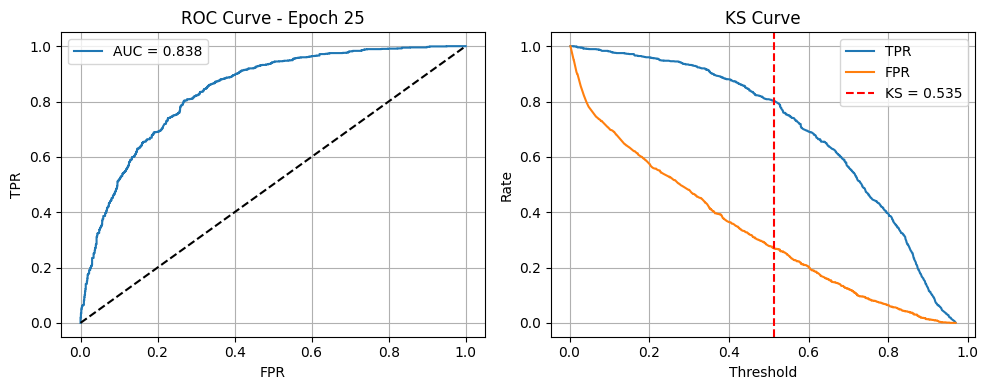

202/202 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.7790 - loss: 0.4836 - val_accuracy: 0.7669 - val_loss: 0.4949
Epoch 26/500
179/202 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7814 - loss: 0.4651Epoch 26 - ROC AUC: 0.8389 | KS: 0.5412
202/202 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.7809 - loss: 0.4666 - val_accuracy: 0.7674 - val_loss: 0.4929
Epoch 27/500
192/202 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7828 - loss: 0.4814Epoch 27 - ROC AUC: 0.8372 | KS: 0.5278
202/202 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7829 - loss: 0.4811 - val_accuracy: 0.7628 - val_loss: 0.4965
Epoch 28/500
182/202 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7840 - loss: 0.4839Epoch 28 - ROC AUC: 0.8379 | KS: 0.5274
202/202 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7839 - loss: 0.4829 - val_accuracy: 0.7558 - val_loss: 0.4948
Epoch 29/500
189/202 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7847 - loss: 0.4787Epoch 29 - ROC AUC: 0.8378 | KS: 0.5350
202/202 ━━━━━━━━━━━━━━━━

<Figure size 640x480 with 0 Axes>

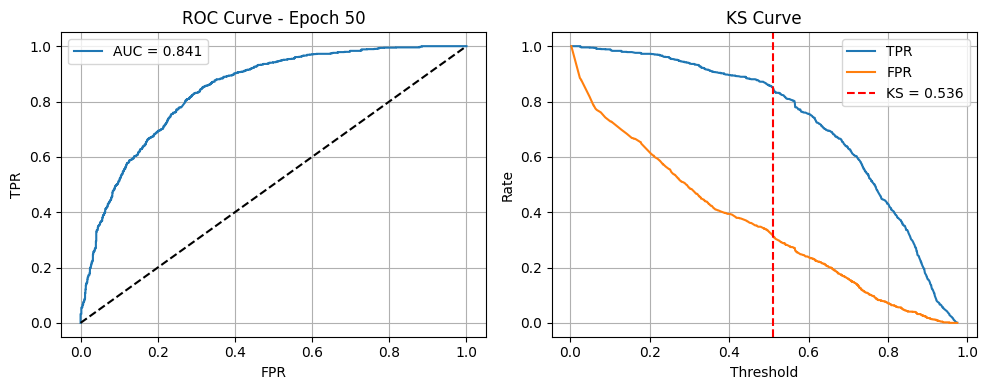

202/202 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.7806 - loss: 0.4599 - val_accuracy: 0.7683 - val_loss: 0.4895
Epoch 51/500
176/202 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7931 - loss: 0.4554Epoch 51 - ROC AUC: 0.8417 | KS: 0.5419
202/202 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7921 - loss: 0.4564 - val_accuracy: 0.7711 - val_loss: 0.4886
Epoch 52/500
186/202 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7807 - loss: 0.4730Epoch 52 - ROC AUC: 0.8410 | KS: 0.5339
202/202 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7811 - loss: 0.4725 - val_accuracy: 0.7669 - val_loss: 0.4901
Epoch 53/500
183/202 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7841 - loss: 0.4616Epoch 53 - ROC AUC: 0.8414 | KS: 0.5398
202/202 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7843 - loss: 0.4619 - val_accuracy: 0.7683 - val_loss: 0.4882
Epoch 54/500
187/202 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7818 - loss: 0.4690Epoch 54 - ROC AUC: 0.8426 | KS: 0.5434
202/202 ━━━━━━━━━━━━━━━━

<Figure size 640x480 with 0 Axes>

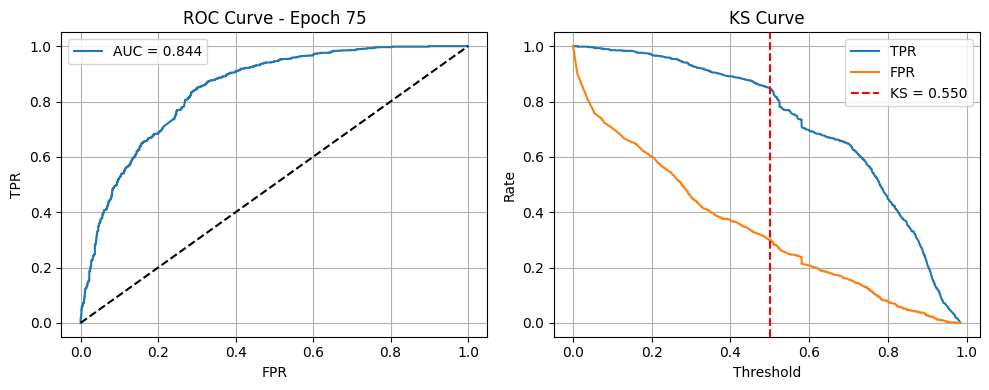

202/202 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.7796 - loss: 0.4631 - val_accuracy: 0.7772 - val_loss: 0.4841
Epoch 76/500
198/202 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7801 - loss: 0.4667Epoch 76 - ROC AUC: 0.8430 | KS: 0.5371
202/202 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7803 - loss: 0.4664 - val_accuracy: 0.7683 - val_loss: 0.4863
Epoch 77/500
181/202 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7929 - loss: 0.4564Epoch 77 - ROC AUC: 0.8432 | KS: 0.5453
202/202 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7928 - loss: 0.4565 - val_accuracy: 0.7730 - val_loss: 0.4852
Epoch 78/500
197/202 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7923 - loss: 0.4576Epoch 78 - ROC AUC: 0.8448 | KS: 0.5481
202/202 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7923 - loss: 0.4576 - val_accuracy: 0.7744 - val_loss: 0.4829
Epoch 79/500
197/202 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7877 - loss: 0.4549Epoch 79 - ROC AUC: 0.8450 | KS: 0.5420
202/202 ━━━━━━━━━━━━━━━━

<Figure size 640x480 with 0 Axes>

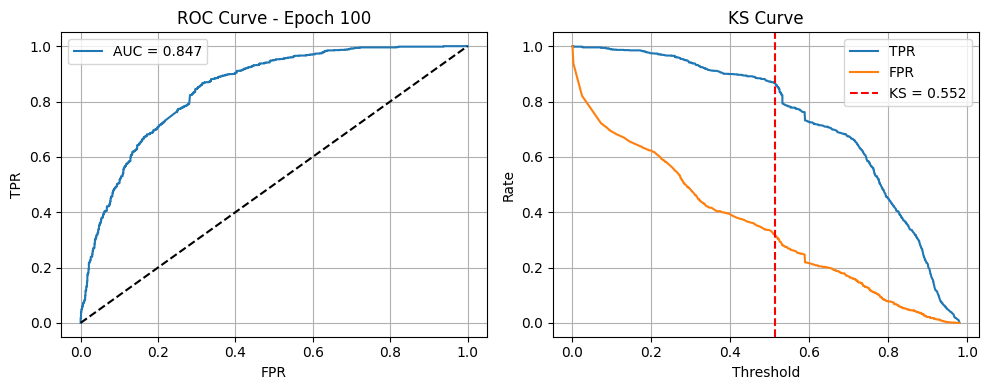

202/202 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.7978 - loss: 0.4491 - val_accuracy: 0.7730 - val_loss: 0.4814
Epoch 101/500
179/202 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7856 - loss: 0.4603Epoch 101 - ROC AUC: 0.8457 | KS: 0.5545
202/202 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7861 - loss: 0.4595 - val_accuracy: 0.7744 - val_loss: 0.4816
Epoch 102/500
199/202 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7888 - loss: 0.4506Epoch 102 - ROC AUC: 0.8440 | KS: 0.5521
202/202 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7888 - loss: 0.4506 - val_accuracy: 0.7781 - val_loss: 0.4833
Epoch 103/500
202/202 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7859 - loss: 0.4458Epoch 103 - ROC AUC: 0.8450 | KS: 0.5563
202/202 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7859 - loss: 0.4458 - val_accuracy: 0.7799 - val_loss: 0.4845
Epoch 104/500
196/202 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7889 - loss: 0.4543Epoch 104 - ROC AUC: 0.8452 | KS: 0.5529
202/202 ━━━━━━━━

<Figure size 640x480 with 0 Axes>

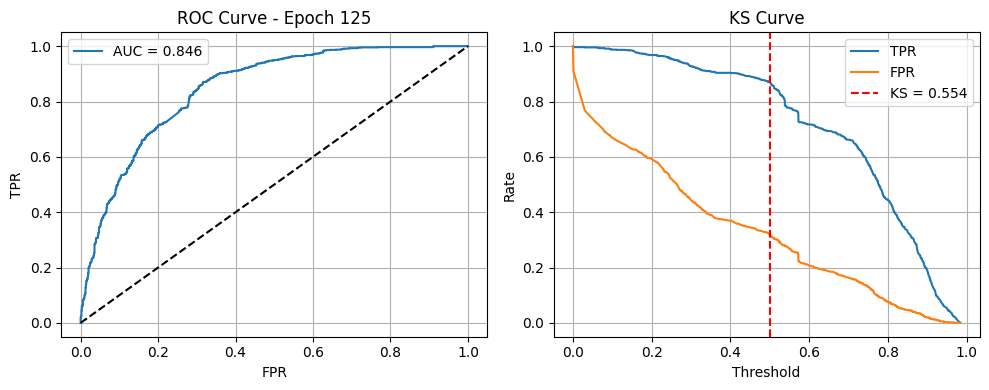

202/202 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.7979 - loss: 0.4417 - val_accuracy: 0.7809 - val_loss: 0.4802
Epoch 126/500
194/202 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7905 - loss: 0.4457Epoch 126 - ROC AUC: 0.8453 | KS: 0.5583
202/202 ━━━━━━━━━━━━━━━━━━━━ 38s 190ms/step - accuracy: 0.7905 - loss: 0.4457 - val_accuracy: 0.7813 - val_loss: 0.4813
Epoch 127/500
179/202 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7896 - loss: 0.4480Epoch 127 - ROC AUC: 0.8463 | KS: 0.5576
202/202 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.7891 - loss: 0.4484 - val_accuracy: 0.7823 - val_loss: 0.4794
Epoch 128/500
193/202 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7921 - loss: 0.4447Epoch 128 - ROC AUC: 0.8460 | KS: 0.5533
202/202 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7920 - loss: 0.4449 - val_accuracy: 0.7772 - val_loss: 0.4800
Epoch 129/500
201/202 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7899 - loss: 0.4484Epoch 129 - ROC AUC: 0.8470 | KS: 0.5588
202/202 ━━━━━

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


✅ Validação final — Loss: 0.4791, Accuracy: 0.7748


<Figure size 640x480 with 0 Axes>

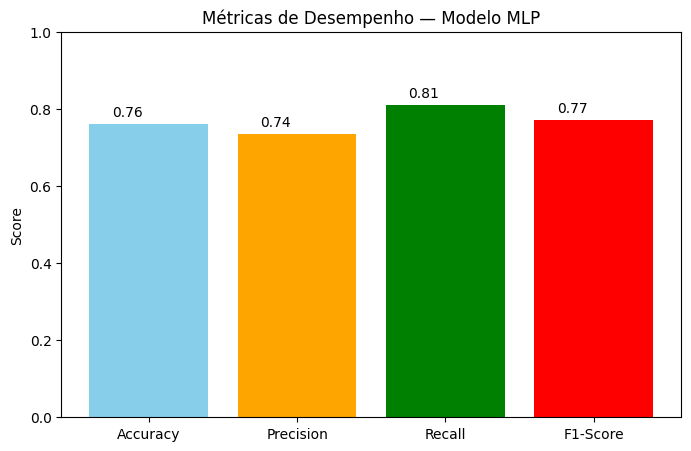

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

model = Sequential([
    Dense(20, activation='relu', input_shape=(X_train_nn.shape[1],)),
    Dropout(0.3),  # 30% dos neurônios desativados nessa camada
    Dense(20, activation='relu'),
    Dropout(0.3),  # Outro dropout antes da saída

    Dense(1, activation='sigmoid')  # Saída binária
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

early_stop = EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)

history = model.fit(
    X_train_nn, y_train_nn,
    validation_data=(X_val_nn, y_val_nn),
    epochs=500,
    callbacks=[early_stop, RocKsCallback(X_val_nn, y_val_nn)],
    verbose=1,
    batch_size=32
)


model.save('nn_2camada_0.3dropout_500epochs.h5')
files.download('nn_2camada_0.3dropout_500epochs.h5')

# Avaliação
loss, acc = model.evaluate(X_val_nn, y_val_nn, verbose=0)
print(f"\n✅ Validação final — Loss: {loss:.4f}, Accuracy: {acc:.4f}")

metrics_names = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
metrics_values = [
    model.evaluate(X_test_nn, y_test_nn, verbose=0)[1],  # accuracy from model
    precision,
    recall,
    f1
]

plt.figure(figsize=(8, 5))
bars = plt.bar(metrics_names, metrics_values, color=['skyblue', 'orange', 'green', 'red'])
plt.ylim(0, 1)
plt.title('Métricas de Desempenho — Modelo MLP')
plt.ylabel('Score')
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + 0.15, yval + 0.02, f'{yval:.2f}')
plt.show()



In [ ]:

model = Sequential([
    Dense(40, activation='tanh', input_shape=(X_train_nn.shape[1],)),
    Dropout(0.3),  # 30% dos neurônios desativados nessa camada
    Dense(10, activation='tanh'),
    Dropout(0.3),  # Outro dropout antes da saída

    Dense(1, activation='sigmoid')  # Saída binária
])

model.compile(optimizer='RMSprop', loss='binary_crossentropy', metrics=['accuracy'])

early_stop = EarlyStopping(monitor='val_loss', patience=100, restore_best_weights=True)

history = model.fit(
    X_train_nn, y_train_nn,
    validation_data=(X_val_nn, y_val_nn),
    epochs=1000,
    callbacks=[early_stop, RocKsCallback(X_val_nn, y_val_nn)],
    verbose=1,
    batch_size=32
)


model.save('nn_2camada_0.3dropout_1000epochs.h5')
files.download('nn_2camada_0.3dropout_1000epochs.h5')

# Avaliação
loss, acc = model.evaluate(X_val_nn, y_val_nn, verbose=0)
print(f"\n✅ Validação final — Loss: {loss:.4f}, Accuracy: {acc:.4f}")

metrics_names = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
metrics_values = [
    model.evaluate(X_test_nn, y_test_nn, verbose=0)[1],  # accuracy from model
    precision,
    recall,
    f1
]

plt.figure(figsize=(8, 5))
bars = plt.bar(metrics_names, metrics_values, color=['skyblue', 'orange', 'green', 'red'])
plt.ylim(0, 1)
plt.title('Métricas de Desempenho — Modelo MLP')
plt.ylabel('Score')
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + 0.15, yval + 0.02, f'{yval:.2f}')
plt.show()

NameError: name 'Sequential' is not defined

In [ ]:
model.save('nn_2camada_0.3dropout_1000epochs.h5')
files.download('nn_2camada_0.3dropout_1000epochs.h5')


NameError: name 'model' is not defined

In [ ]:
from tabpfn import TabPFNClassifier
import torch
from sklearn.metrics import classification_report, confusion_matrix

model = TabPFNClassifier(device='cuda' if torch.cuda.is_available() else 'cpu',
    ignore_pretraining_limits=True
)
model.fit(X_train_nn, y_train_nn)

y_pred = model.predict(X_val_nn)

print("📊 Relatório de Classificação:")
print(classification_report(y_val_nn, y_pred))

print("🧩 Matriz de Confusão:")
print(confusion_matrix(y_val_nn, y_pred))

In [ ]:
y_pred_proba = model.predict_proba(X_val_nn)[:, 1]  # probabilities for positive class

fpr, tpr, thresholds = roc_curve(y_val_nn, y_pred_proba)
ks_statistic = np.max(tpr - fpr)
ks_threshold = thresholds[np.argmax(tpr - fpr)]
y_pred_class = (y_pred_proba >= 0.5).astype(int)

acc = accuracy_score(y_val_nn, y_pred_class)
prec = precision_score(y_val_nn, y_pred_class)
rec = recall_score(y_val_nn, y_pred_class)
f1 = f1_score(y_val_nn, y_pred_class)


In [ ]:
plt.figure(figsize=(12,5))

# KS Curve subplot
plt.subplot(1,2,1)
plt.plot(thresholds, tpr, label='TPR (Recall)')
plt.plot(thresholds, fpr, label='FPR')
plt.axvline(ks_threshold, color='r', linestyle='--', label=f'KS = {ks_statistic:.3f}')
plt.xlabel('Threshold')
plt.ylabel('Rate')
plt.title('KS Curve')
plt.legend()
plt.grid(True)

# Bar plot of other metrics
plt.subplot(1,2,2)
metrics_names = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
metrics_values = [acc, prec, rec, f1]
plt.bar(metrics_names, metrics_values, color=['blue', 'orange', 'green', 'red'])
plt.ylim(0,1)
plt.title('Classification Metrics at Threshold=0.5')
for i, v in enumerate(metrics_values):
    plt.text(i, v + 0.02, f"{v:.2f}", ha='center')
plt.grid(axis='y')

plt.tight_layout()
plt.show()


In [ ]:
import joblib
joblib.dump(model, 'tabpfn_model.pkl')

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score
)

# Calculate metrics
accuracy = accuracy_score(y_val_nn, y_pred)
precision = precision_score(y_val_nn, y_pred, average='weighted')
recall = recall_score(y_val_nn, y_pred, average='weighted')
f1 = f1_score(y_val_nn, y_pred, average='weighted')

# Store in dictionary for plotting
metrics = {
    'Accuracy': accuracy,
    'Precision': precision,
    'Recall': recall,
    'F1 Score': f1
}

# Plot
plt.figure(figsize=(8, 5))
plt.bar(metrics.keys(), metrics.values(), color=['royalblue', 'seagreen', 'orange', 'crimson'])
plt.ylim(0, 1.05)  # scores range between 0 and 1
plt.title('🔍 Model Evaluation Metrics')
plt.ylabel('Score')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Annotate values on top of bars
for i, (key, value) in enumerate(metrics.items()):
    plt.text(i, value + 0.02, f"{value:.2f}", ha='center', fontsize=12)

plt.tight_layout()
plt.show()


In [ ]:
import torch
import torch.nn as nn

def ks_statistic(y_true, y_pred_proba):
    fpr, tpr, thresholds = roc_curve(y_true, y_pred_proba)
    ks = np.max(np.abs(tpr - fpr))
    return ks

X_val_tensor = torch.tensor(X_val_nn, dtype=torch.float32)
y_val_tensor = torch.tensor(y_val_nn.values, dtype=torch.float32)
val_loader = DataLoader(TensorDataset(X_val_tensor, y_val_tensor), batch_size=32)


def plot_ks_curve(y_true, y_pred_proba, title="KS Curve"):
    fpr, tpr, thresholds = roc_curve(y_true, y_pred_proba)
    ks_statistic = np.max(np.abs(tpr - fpr))
    ks_threshold = thresholds[np.argmax(np.abs(tpr - fpr))]

    plt.figure(figsize=(6,6))
    plt.plot(thresholds, tpr, label='TPR (True Positive Rate)')
    plt.plot(thresholds, fpr, label='FPR (False Positive Rate)')
    plt.axvline(ks_threshold, color='r', linestyle='--', label=f'KS = {ks_statistic:.3f}')
    plt.xlabel('Threshold')
    plt.ylabel('Rate')
    plt.title(title)
    plt.legend()
    plt.grid(True)
    plt.show()

def evaluate_validation(model, val_loader, device, epoch=None):
    model.eval()
    all_preds_proba = []
    all_targets = []
    with torch.no_grad():
        for xb, yb in val_loader:
            xb = xb.to(device)
            preds = model(xb).squeeze().cpu().numpy()
            all_preds_proba.extend(preds)
            all_targets.extend(yb.numpy())

    all_preds_proba = np.array(all_preds_proba)
    all_targets = np.array(all_targets)

    # Plot KS curve if epoch given
    if epoch is not None and epoch%25==0:
        plot_ks_curve(all_targets, all_preds_proba, title=f"KS Curve at Epoch {epoch+1}")

    ks = ks_statistic(all_targets, all_preds_proba)

    all_preds = (all_preds_proba >= 0.5).astype(int)
    acc = accuracy_score(all_targets, all_preds)
    prec = precision_score(all_targets, all_preds)
    rec = recall_score(all_targets, all_preds)
    f1 = f1_score(all_targets, all_preds)

    return ks, acc, prec, rec, f1

class STABTransformer(nn.Module):
    def __init__(self, input_dim, d_model=64, n_heads=4, n_layers=2, dropout=0.1):
        super(STABTransformer, self).__init__()
        self.input_proj = nn.Linear(input_dim, d_model)

        encoder_layer = nn.TransformerEncoderLayer(d_model=d_model, nhead=n_heads, dropout=dropout, batch_first=True)
        self.encoder = nn.TransformerEncoder(encoder_layer, num_layers=n_layers)

        self.head = nn.Sequential(
            nn.Linear(d_model, 64),
            nn.ReLU(),
            nn.Dropout(dropout),
            nn.Linear(64, 1),
            nn.Sigmoid()
        )

    def forward(self, x):
        # x shape: (batch_size, input_dim)
        x = self.input_proj(x).unsqueeze(1)  # shape: (batch_size, seq_len=1, d_model)
        x = self.encoder(x)                 # shape: (batch_size, 1, d_model)
        x = x.squeeze(1)                    # shape: (batch_size, d_model)
        return self.head(x)


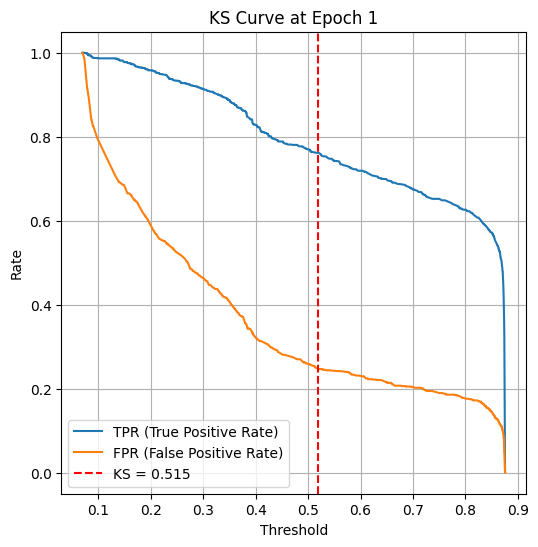

Epoch 000 — Train Loss: 0.5171 | Train Acc: 0.7546 | Val KS: 0.5150 | Val Acc: 0.7563 | Val Prec: 0.7637 | Val Recall: 0.7698 | Val F1: 0.7668
Epoch 010 — Train Loss: 0.4741 | Train Acc: 0.7761 | Val KS: 0.5186 | Val Acc: 0.7591 | Val Prec: 0.7412 | Val Recall: 0.8252 | Val F1: 0.7809
Epoch 020 — Train Loss: 0.4619 | Train Acc: 0.7786 | Val KS: 0.5182 | Val Acc: 0.7544 | Val Prec: 0.7414 | Val Recall: 0.8109 | Val F1: 0.7746


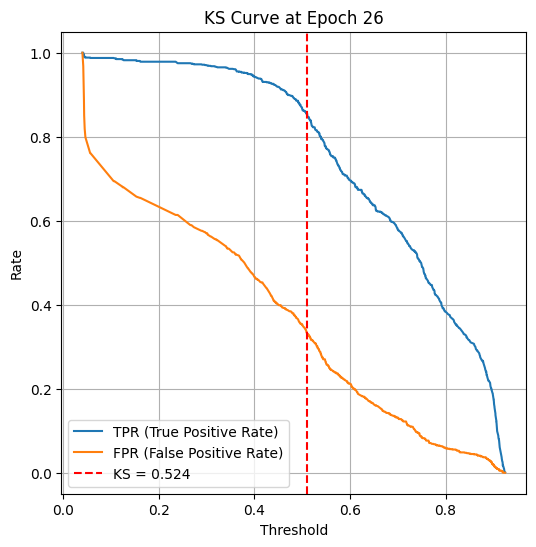

Epoch 030 — Train Loss: 0.4500 | Train Acc: 0.7868 | Val KS: 0.5189 | Val Acc: 0.7456 | Val Prec: 0.7650 | Val Recall: 0.7377 | Val F1: 0.7511
Epoch 040 — Train Loss: 0.4244 | Train Acc: 0.7990 | Val KS: 0.5361 | Val Acc: 0.7646 | Val Prec: 0.7410 | Val Recall: 0.8421 | Val F1: 0.7883


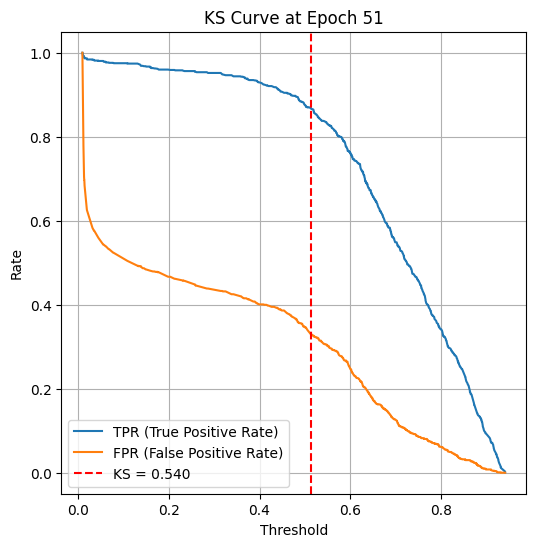

Epoch 050 — Train Loss: 0.3904 | Train Acc: 0.8254 | Val KS: 0.5397 | Val Acc: 0.7688 | Val Prec: 0.7326 | Val Recall: 0.8751 | Val F1: 0.7976
Epoch 060 — Train Loss: 0.3659 | Train Acc: 0.8389 | Val KS: 0.5339 | Val Acc: 0.7651 | Val Prec: 0.7331 | Val Recall: 0.8626 | Val F1: 0.7926
Epoch 070 — Train Loss: 0.3291 | Train Acc: 0.8527 | Val KS: 0.5855 | Val Acc: 0.7911 | Val Prec: 0.7381 | Val Recall: 0.9277 | Val F1: 0.8221


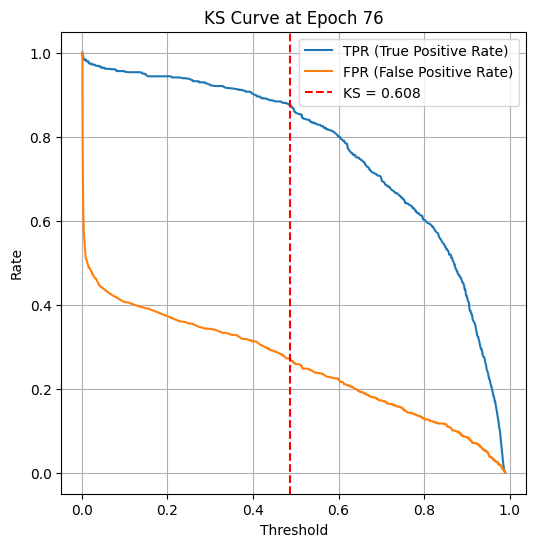

Epoch 080 — Train Loss: 0.2933 | Train Acc: 0.8709 | Val KS: 0.5907 | Val Acc: 0.7925 | Val Prec: 0.7687 | Val Recall: 0.8599 | Val F1: 0.8118
Epoch 090 — Train Loss: 0.2747 | Train Acc: 0.8785 | Val KS: 0.6071 | Val Acc: 0.7962 | Val Prec: 0.7777 | Val Recall: 0.8519 | Val F1: 0.8131
Epoch 099 — Train Loss: 0.2649 | Train Acc: 0.8801 | Val KS: 0.6179 | Val Acc: 0.8041 | Val Prec: 0.7812 | Val Recall: 0.8662 | Val F1: 0.8215


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from torch.utils.data import TensorDataset, DataLoader
import torch.nn.functional as F

X_train_tensor = torch.tensor(X_train_nn, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train_nn, dtype=torch.float32)


train_loader = DataLoader(TensorDataset(X_train_tensor, y_train_tensor), batch_size=32, shuffle=True)

# Model
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = STABTransformer(input_dim=X_train_tensor.shape[1]).to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)
loss_fn = nn.BCELoss()

epochs=100
for epoch in range(epochs):
    model.train()
    epoch_loss = 0

    all_preds = []
    all_targets = []

    for xb, yb in train_loader:
        xb, yb = xb.to(device), yb.to(device)

        pred = model(xb).squeeze()
        loss = loss_fn(pred, yb)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        epoch_loss += loss.item()

        preds_np = (pred > 0.5).detach().cpu().numpy()
        targets_np = yb.detach().cpu().numpy()

        all_preds.extend(preds_np)
        all_targets.extend(targets_np)

    # Training metrics
    acc = accuracy_score(all_targets, all_preds)
    prec = precision_score(all_targets, all_preds)
    rec = recall_score(all_targets, all_preds)
    f1 = f1_score(all_targets, all_preds)

    # Validation metrics
    ks_val, acc_val, prec_val, rec_val, f1_val = evaluate_validation(model, val_loader, device, epoch)

    if epoch % 10 == 0 or epoch == epochs - 1:
        print(f"Epoch {epoch:03d} — Train Loss: {epoch_loss/len(train_loader):.4f} | "
              f"Train Acc: {acc:.4f} | Val KS: {ks_val:.4f} | Val Acc: {acc_val:.4f} | "
              f"Val Prec: {prec_val:.4f} | Val Recall: {rec_val:.4f} | Val F1: {f1_val:.4f}")


In [ ]:
model.eval()
X_test_tensor = torch.tensor(X_test_nn, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test_nn.values, dtype=torch.float32)  # <-- Aqui está o fix

with torch.no_grad():
    y_pred_prob = model(X_test_tensor.to(device)).cpu().squeeze().numpy()
    y_pred = (y_pred_prob >= 0.5).astype(int)


# Save model weights
torch.save(model.state_dict(), 'stab_transformer_4head_2layer_0.1droput.pt')
files.download('stab_transformer_4head_2layer_0.1droput.pt')


acc = accuracy_score(y_test_nn, y_pred)
prec = precision_score(y_test_nn, y_pred)
rec = recall_score(y_test_nn, y_pred)
f1 = f1_score(y_test_nn, y_pred)

print(f"✅ Accuracy: {acc:.4f}")
print(f"✅ Precision: {prec:.4f}")
print(f"✅ Recall: {rec:.4f}")
print(f"✅ F1 Score: {f1:.4f}")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

✅ Accuracy: 0.8129
✅ Precision: 0.7854
✅ Recall: 0.8814
✅ F1 Score: 0.8306


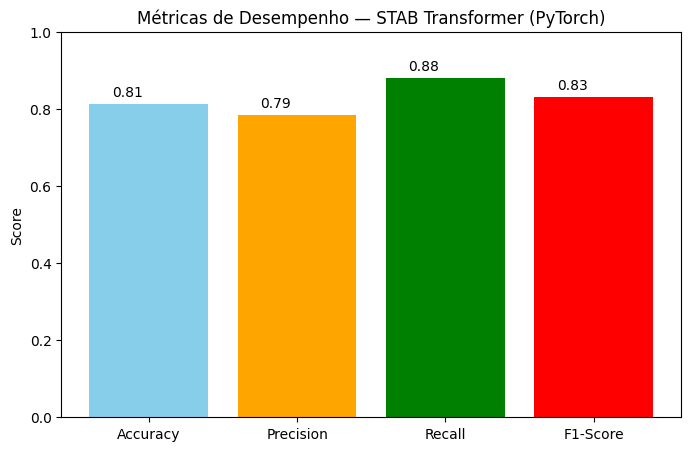

In [ ]:
metrics_names = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
metrics_values = [acc, prec, rec, f1]

plt.figure(figsize=(8, 5))
bars = plt.bar(metrics_names, metrics_values, color=['skyblue', 'orange', 'green', 'red'])
plt.ylim(0, 1)
plt.title('Métricas de Desempenho — STAB Transformer (PyTorch)')
plt.ylabel('Score')
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + 0.15, yval + 0.02, f'{yval:.2f}')
plt.show()


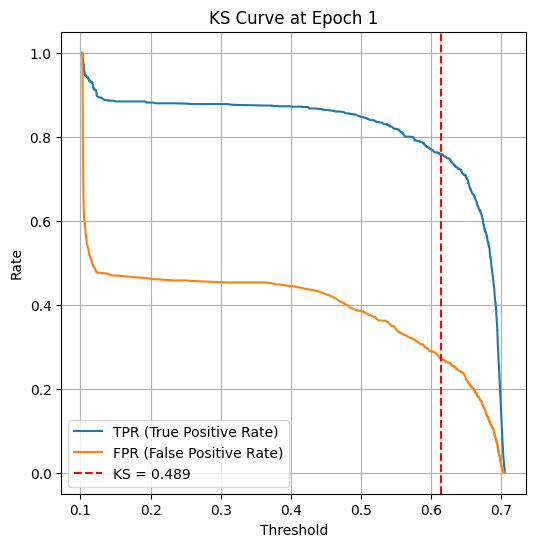

Epoch 000 — Train Loss: 0.5426 | Train Acc: 0.7526 | Val KS: 0.4891 | Val Acc: 0.7358 | Val Prec: 0.7047 | Val Recall: 0.8475 | Val F1: 0.7695
Epoch 010 — Train Loss: 0.4901 | Train Acc: 0.7665 | Val KS: 0.5173 | Val Acc: 0.7618 | Val Prec: 0.7346 | Val Recall: 0.8492 | Val F1: 0.7878
Epoch 020 — Train Loss: 0.4841 | Train Acc: 0.7719 | Val KS: 0.5207 | Val Acc: 0.7623 | Val Prec: 0.7228 | Val Recall: 0.8814 | Val F1: 0.7942


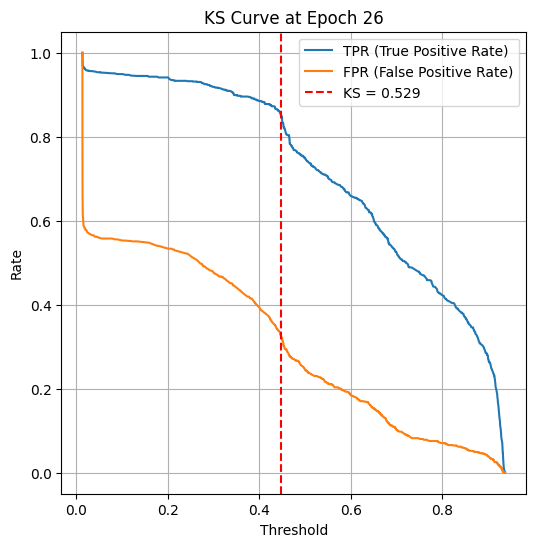

Epoch 030 — Train Loss: 0.4793 | Train Acc: 0.7721 | Val KS: 0.5174 | Val Acc: 0.7419 | Val Prec: 0.7817 | Val Recall: 0.6994 | Val F1: 0.7382
Epoch 040 — Train Loss: 0.4728 | Train Acc: 0.7721 | Val KS: 0.5253 | Val Acc: 0.7530 | Val Prec: 0.7632 | Val Recall: 0.7618 | Val F1: 0.7625


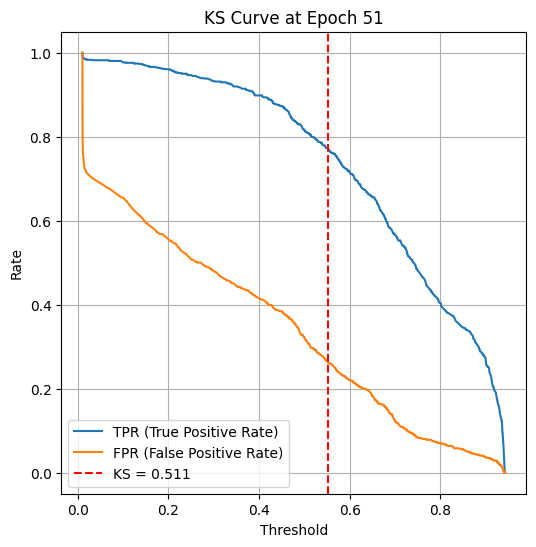

Epoch 050 — Train Loss: 0.4741 | Train Acc: 0.7762 | Val KS: 0.5111 | Val Acc: 0.7498 | Val Prec: 0.7332 | Val Recall: 0.8162 | Val F1: 0.7725
Epoch 060 — Train Loss: 0.4644 | Train Acc: 0.7821 | Val KS: 0.4931 | Val Acc: 0.7419 | Val Prec: 0.7119 | Val Recall: 0.8466 | Val F1: 0.7734
Epoch 070 — Train Loss: 0.4590 | Train Acc: 0.7880 | Val KS: 0.5242 | Val Acc: 0.7577 | Val Prec: 0.7081 | Val Recall: 0.9090 | Val F1: 0.7961


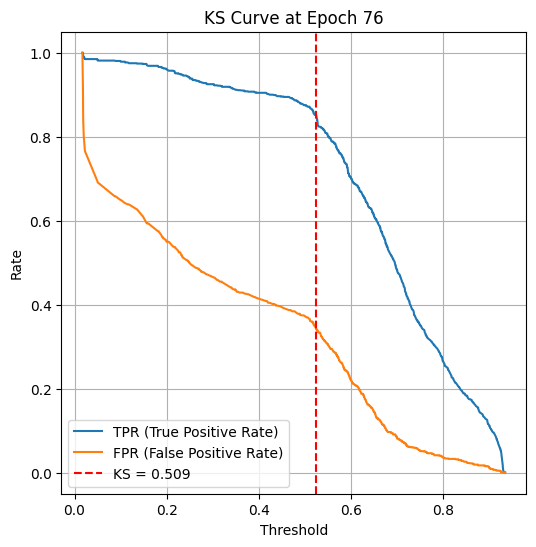

Epoch 080 — Train Loss: 0.4629 | Train Acc: 0.7816 | Val KS: 0.5177 | Val Acc: 0.7618 | Val Prec: 0.7229 | Val Recall: 0.8796 | Val F1: 0.7936
Epoch 090 — Train Loss: 0.4636 | Train Acc: 0.7855 | Val KS: 0.5201 | Val Acc: 0.7609 | Val Prec: 0.7345 | Val Recall: 0.8466 | Val F1: 0.7866


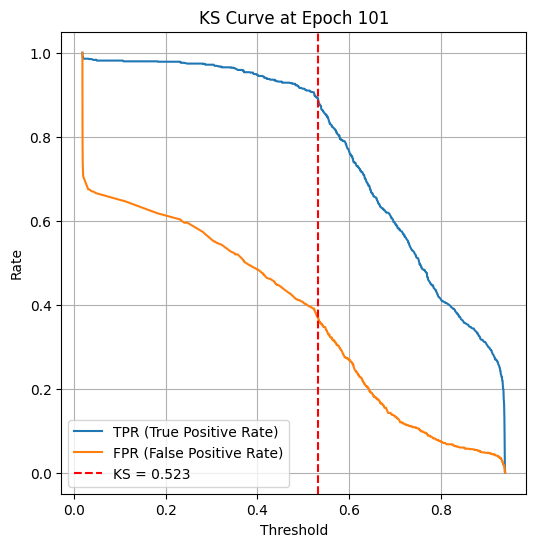

Epoch 100 — Train Loss: 0.4531 | Train Acc: 0.7895 | Val KS: 0.5232 | Val Acc: 0.7609 | Val Prec: 0.7098 | Val Recall: 0.9144 | Val F1: 0.7992
Epoch 110 — Train Loss: 0.4311 | Train Acc: 0.8013 | Val KS: 0.5211 | Val Acc: 0.7572 | Val Prec: 0.7415 | Val Recall: 0.8189 | Val F1: 0.7783
Epoch 120 — Train Loss: 0.4169 | Train Acc: 0.8075 | Val KS: 0.5298 | Val Acc: 0.7669 | Val Prec: 0.7127 | Val Recall: 0.9251 | Val F1: 0.8051


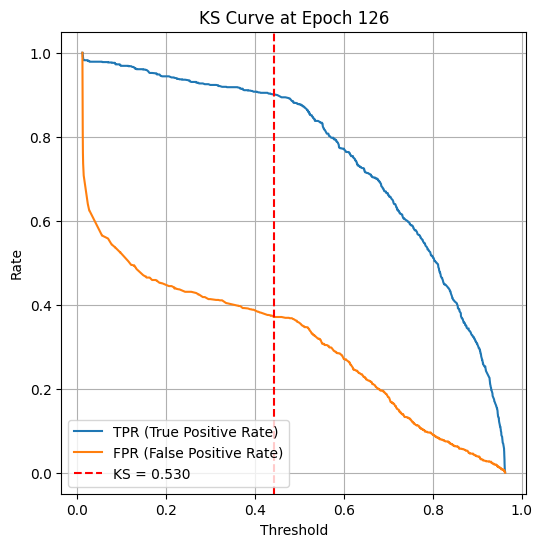

Epoch 130 — Train Loss: 0.4111 | Train Acc: 0.8157 | Val KS: 0.5322 | Val Acc: 0.7669 | Val Prec: 0.7169 | Val Recall: 0.9126 | Val F1: 0.8030
Epoch 140 — Train Loss: 0.3975 | Train Acc: 0.8202 | Val KS: 0.5467 | Val Acc: 0.7753 | Val Prec: 0.7486 | Val Recall: 0.8555 | Val F1: 0.7985


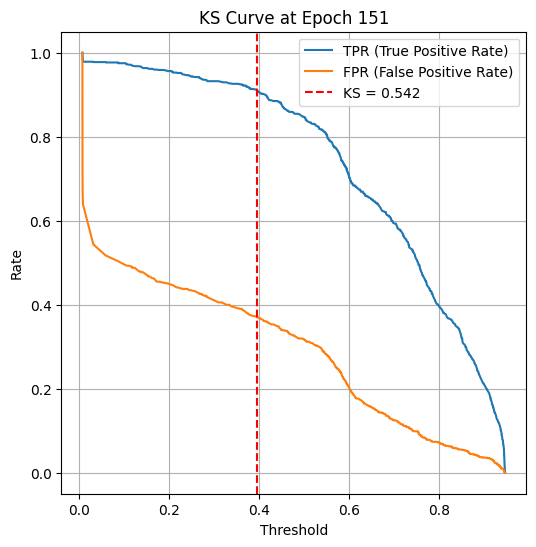

Epoch 150 — Train Loss: 0.3915 | Train Acc: 0.8242 | Val KS: 0.5418 | Val Acc: 0.7679 | Val Prec: 0.7431 | Val Recall: 0.8466 | Val F1: 0.7915
Epoch 160 — Train Loss: 0.3822 | Train Acc: 0.8307 | Val KS: 0.5658 | Val Acc: 0.7786 | Val Prec: 0.7249 | Val Recall: 0.9260 | Val F1: 0.8132
Epoch 170 — Train Loss: 0.3682 | Train Acc: 0.8321 | Val KS: 0.5600 | Val Acc: 0.7818 | Val Prec: 0.7340 | Val Recall: 0.9108 | Val F1: 0.8129


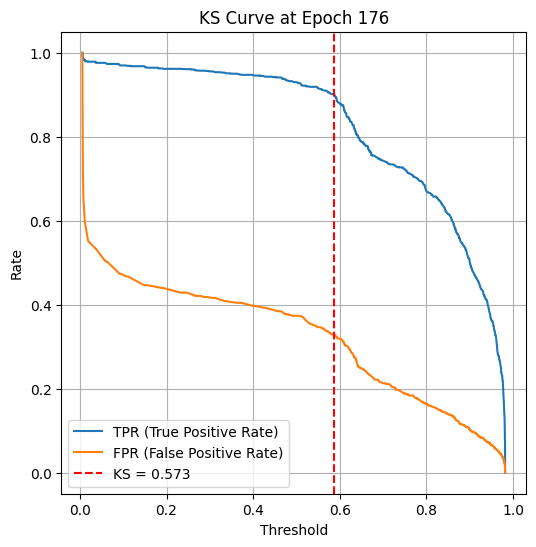

Epoch 180 — Train Loss: 0.3681 | Train Acc: 0.8323 | Val KS: 0.5728 | Val Acc: 0.7832 | Val Prec: 0.7280 | Val Recall: 0.9313 | Val F1: 0.8172
Epoch 190 — Train Loss: 0.3521 | Train Acc: 0.8457 | Val KS: 0.5900 | Val Acc: 0.7976 | Val Prec: 0.7531 | Val Recall: 0.9090 | Val F1: 0.8238


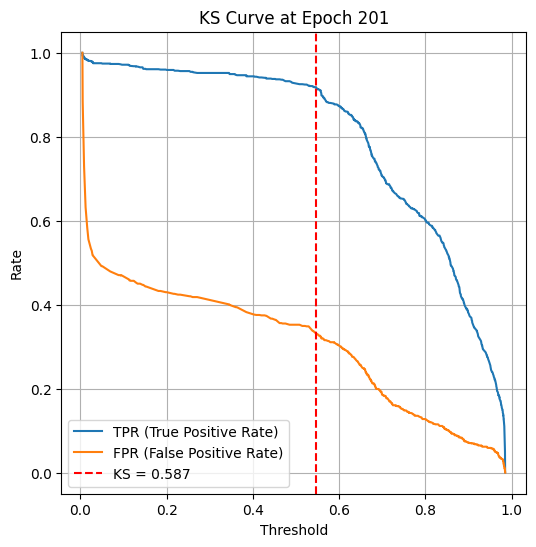

Epoch 200 — Train Loss: 0.3477 | Train Acc: 0.8485 | Val KS: 0.5869 | Val Acc: 0.7925 | Val Prec: 0.7404 | Val Recall: 0.9260 | Val F1: 0.8228
Epoch 210 — Train Loss: 0.3303 | Train Acc: 0.8559 | Val KS: 0.5945 | Val Acc: 0.8013 | Val Prec: 0.7580 | Val Recall: 0.9081 | Val F1: 0.8263
Epoch 220 — Train Loss: 0.3265 | Train Acc: 0.8572 | Val KS: 0.6085 | Val Acc: 0.7990 | Val Prec: 0.7675 | Val Recall: 0.8805 | Val F1: 0.8201


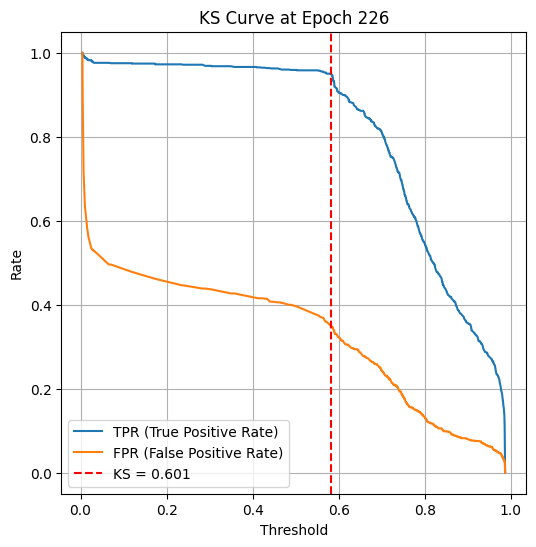

Epoch 230 — Train Loss: 0.3273 | Train Acc: 0.8607 | Val KS: 0.5898 | Val Acc: 0.7953 | Val Prec: 0.7572 | Val Recall: 0.8930 | Val F1: 0.8195
Epoch 240 — Train Loss: 0.3189 | Train Acc: 0.8606 | Val KS: 0.6160 | Val Acc: 0.8027 | Val Prec: 0.7766 | Val Recall: 0.8715 | Val F1: 0.8214


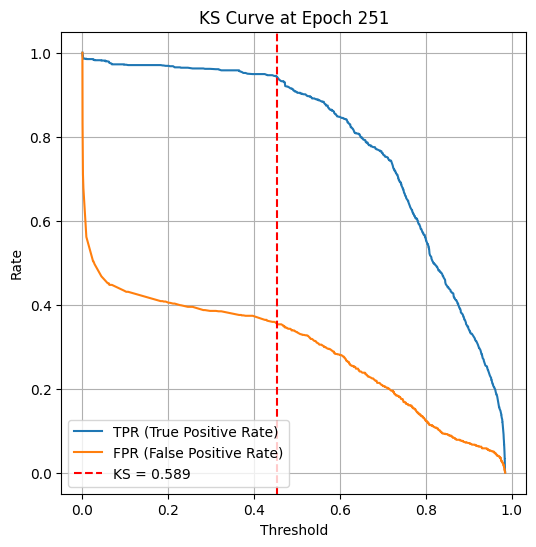

Epoch 250 — Train Loss: 0.3031 | Train Acc: 0.8691 | Val KS: 0.5887 | Val Acc: 0.7902 | Val Prec: 0.7458 | Val Recall: 0.9054 | Val F1: 0.8179
Epoch 260 — Train Loss: 0.2941 | Train Acc: 0.8717 | Val KS: 0.6081 | Val Acc: 0.8041 | Val Prec: 0.7772 | Val Recall: 0.8742 | Val F1: 0.8228
Epoch 270 — Train Loss: 0.2854 | Train Acc: 0.8736 | Val KS: 0.6014 | Val Acc: 0.7999 | Val Prec: 0.7447 | Val Recall: 0.9367 | Val F1: 0.8297


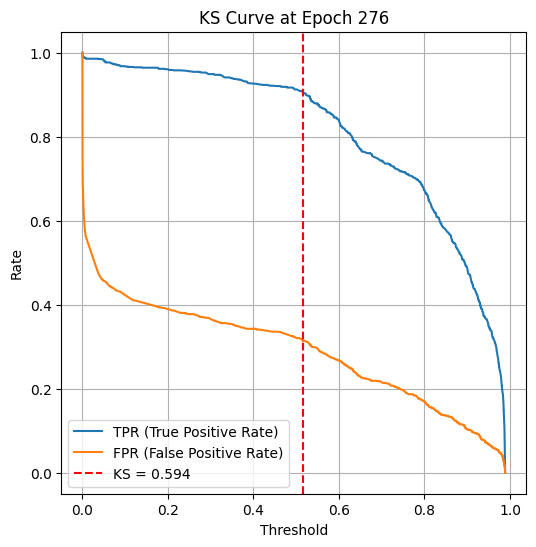

Epoch 280 — Train Loss: 0.2888 | Train Acc: 0.8751 | Val KS: 0.6071 | Val Acc: 0.8045 | Val Prec: 0.7489 | Val Recall: 0.9393 | Val F1: 0.8334
Epoch 290 — Train Loss: 0.2785 | Train Acc: 0.8774 | Val KS: 0.6123 | Val Acc: 0.8064 | Val Prec: 0.7540 | Val Recall: 0.9322 | Val F1: 0.8337


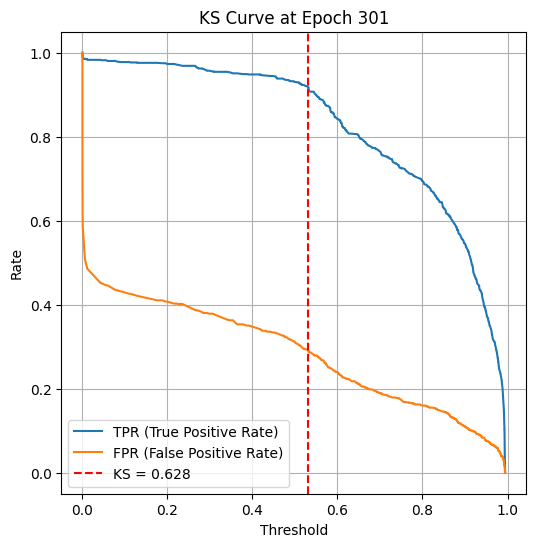

Epoch 300 — Train Loss: 0.2773 | Train Acc: 0.8822 | Val KS: 0.6283 | Val Acc: 0.8148 | Val Prec: 0.7647 | Val Recall: 0.9304 | Val F1: 0.8394
Epoch 310 — Train Loss: 0.2713 | Train Acc: 0.8873 | Val KS: 0.6231 | Val Acc: 0.8152 | Val Prec: 0.7621 | Val Recall: 0.9376 | Val F1: 0.8408
Epoch 320 — Train Loss: 0.2704 | Train Acc: 0.8858 | Val KS: 0.6303 | Val Acc: 0.8069 | Val Prec: 0.7756 | Val Recall: 0.8849 | Val F1: 0.8267


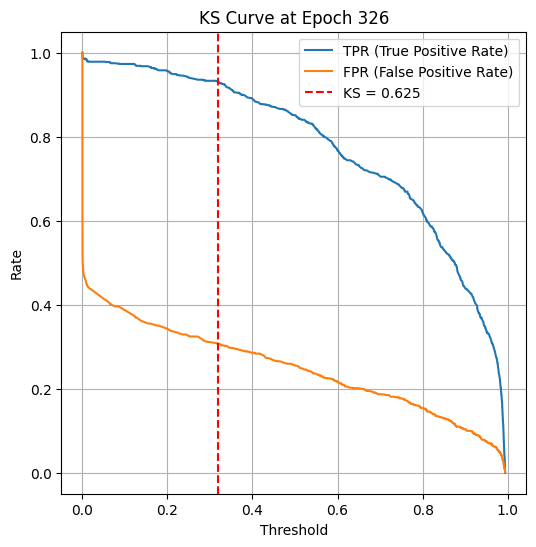

Epoch 330 — Train Loss: 0.2641 | Train Acc: 0.8829 | Val KS: 0.6054 | Val Acc: 0.8055 | Val Prec: 0.7573 | Val Recall: 0.9215 | Val F1: 0.8314
Epoch 340 — Train Loss: 0.2547 | Train Acc: 0.8931 | Val KS: 0.6333 | Val Acc: 0.8097 | Val Prec: 0.7754 | Val Recall: 0.8930 | Val F1: 0.8300


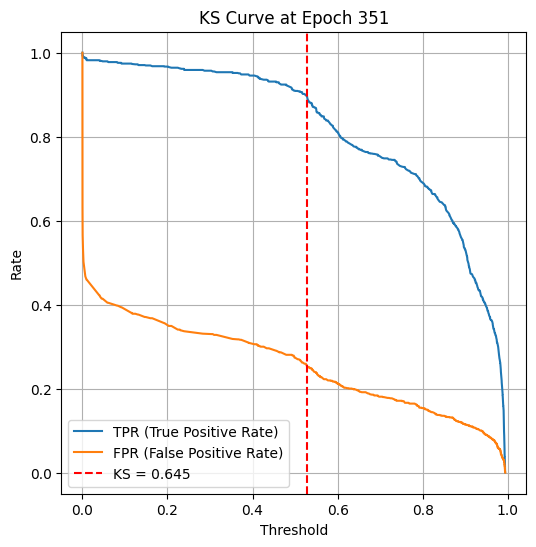

Epoch 350 — Train Loss: 0.2460 | Train Acc: 0.8920 | Val KS: 0.6448 | Val Acc: 0.8217 | Val Prec: 0.7832 | Val Recall: 0.9090 | Val F1: 0.8415
Epoch 360 — Train Loss: 0.2616 | Train Acc: 0.8918 | Val KS: 0.6319 | Val Acc: 0.8175 | Val Prec: 0.7692 | Val Recall: 0.9277 | Val F1: 0.8411
Epoch 370 — Train Loss: 0.2467 | Train Acc: 0.8946 | Val KS: 0.6300 | Val Acc: 0.8166 | Val Prec: 0.7729 | Val Recall: 0.9170 | Val F1: 0.8388


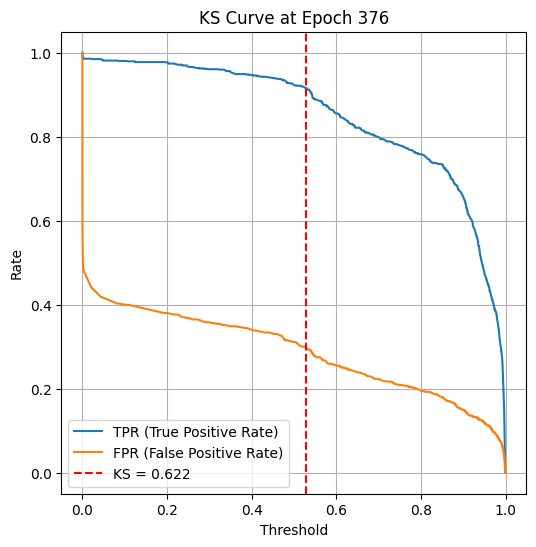

Epoch 380 — Train Loss: 0.2269 | Train Acc: 0.9024 | Val KS: 0.6352 | Val Acc: 0.8217 | Val Prec: 0.7692 | Val Recall: 0.9393 | Val F1: 0.8458
Epoch 390 — Train Loss: 0.2464 | Train Acc: 0.8948 | Val KS: 0.6458 | Val Acc: 0.8245 | Val Prec: 0.7742 | Val Recall: 0.9358 | Val F1: 0.8473


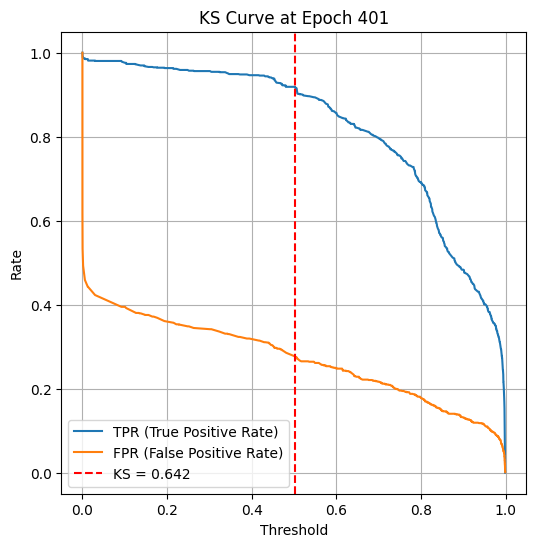

Epoch 400 — Train Loss: 0.2289 | Train Acc: 0.9020 | Val KS: 0.6420 | Val Acc: 0.8240 | Val Prec: 0.7815 | Val Recall: 0.9188 | Val F1: 0.8446
Epoch 410 — Train Loss: 0.2317 | Train Acc: 0.8980 | Val KS: 0.6499 | Val Acc: 0.8268 | Val Prec: 0.7783 | Val Recall: 0.9331 | Val F1: 0.8487
Epoch 420 — Train Loss: 0.2236 | Train Acc: 0.9041 | Val KS: 0.6329 | Val Acc: 0.8166 | Val Prec: 0.7615 | Val Recall: 0.9429 | Val F1: 0.8426


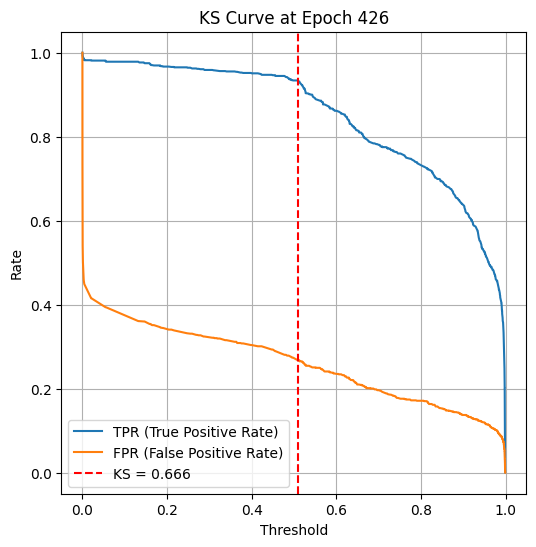

Epoch 430 — Train Loss: 0.2223 | Train Acc: 0.9041 | Val KS: 0.6519 | Val Acc: 0.8268 | Val Prec: 0.7846 | Val Recall: 0.9197 | Val F1: 0.8468
Epoch 440 — Train Loss: 0.2222 | Train Acc: 0.9027 | Val KS: 0.6256 | Val Acc: 0.8143 | Val Prec: 0.7823 | Val Recall: 0.8912 | Val F1: 0.8332


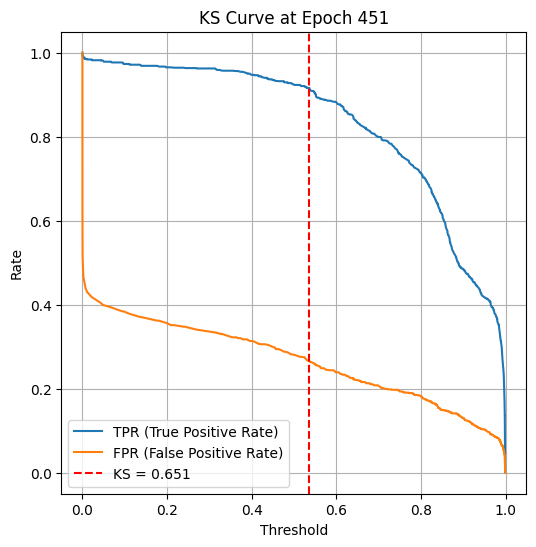

Epoch 450 — Train Loss: 0.2146 | Train Acc: 0.9059 | Val KS: 0.6509 | Val Acc: 0.8254 | Val Prec: 0.7811 | Val Recall: 0.9233 | Val F1: 0.8463
Epoch 460 — Train Loss: 0.2215 | Train Acc: 0.9059 | Val KS: 0.6571 | Val Acc: 0.8287 | Val Prec: 0.7793 | Val Recall: 0.9358 | Val F1: 0.8504
Epoch 470 — Train Loss: 0.2165 | Train Acc: 0.9051 | Val KS: 0.6357 | Val Acc: 0.8213 | Val Prec: 0.7690 | Val Recall: 0.9384 | Val F1: 0.8453


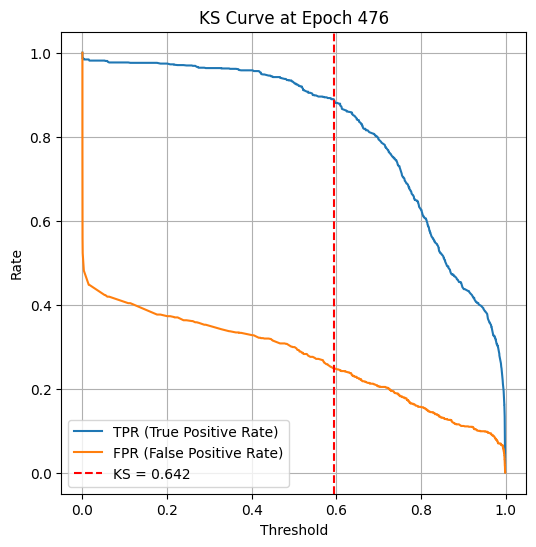

Epoch 480 — Train Loss: 0.2169 | Train Acc: 0.9107 | Val KS: 0.6692 | Val Acc: 0.8268 | Val Prec: 0.7936 | Val Recall: 0.9019 | Val F1: 0.8443
Epoch 490 — Train Loss: 0.2048 | Train Acc: 0.9084 | Val KS: 0.6572 | Val Acc: 0.8319 | Val Prec: 0.7935 | Val Recall: 0.9153 | Val F1: 0.8500
Epoch 499 — Train Loss: 0.2143 | Train Acc: 0.9075 | Val KS: 0.6458 | Val Acc: 0.8273 | Val Prec: 0.7748 | Val Recall: 0.9420 | Val F1: 0.8502


In [ ]:

# Model
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = STABTransformer(input_dim=X_train_tensor.shape[1], n_heads=8, n_layers=3, dropout=0.3).to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)
loss_fn = nn.BCELoss()


epochs=500
for epoch in range(epochs):
    model.train()
    epoch_loss = 0

    all_preds = []
    all_targets = []

    for xb, yb in train_loader:
        xb, yb = xb.to(device), yb.to(device)

        pred = model(xb).squeeze()
        loss = loss_fn(pred, yb)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        epoch_loss += loss.item()

        preds_np = (pred > 0.5).detach().cpu().numpy()
        targets_np = yb.detach().cpu().numpy()

        all_preds.extend(preds_np)
        all_targets.extend(targets_np)

    # Training metrics
    acc = accuracy_score(all_targets, all_preds)
    prec = precision_score(all_targets, all_preds)
    rec = recall_score(all_targets, all_preds)
    f1 = f1_score(all_targets, all_preds)

    # Validation metrics
    ks_val, acc_val, prec_val, rec_val, f1_val = evaluate_validation(model, val_loader, device, epoch)

    if epoch % 10 == 0 or epoch == epochs - 1:
        print(f"Epoch {epoch:03d} — Train Loss: {epoch_loss/len(train_loader):.4f} | "
              f"Train Acc: {acc:.4f} | Val KS: {ks_val:.4f} | Val Acc: {acc_val:.4f} | "
              f"Val Prec: {prec_val:.4f} | Val Recall: {rec_val:.4f} | Val F1: {f1_val:.4f}")


In [ ]:

torch.save(model.state_dict(), 'stab_transformer_8head_3layer_0.3droput_500epochs.pt')
files.download('stab_transformer_8head_3layer_0.3droput_500epochs.pt')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

✅ Accuracy: 0.8236
✅ Precision: 0.7742
✅ Recall: 0.9331
✅ F1 Score: 0.8463


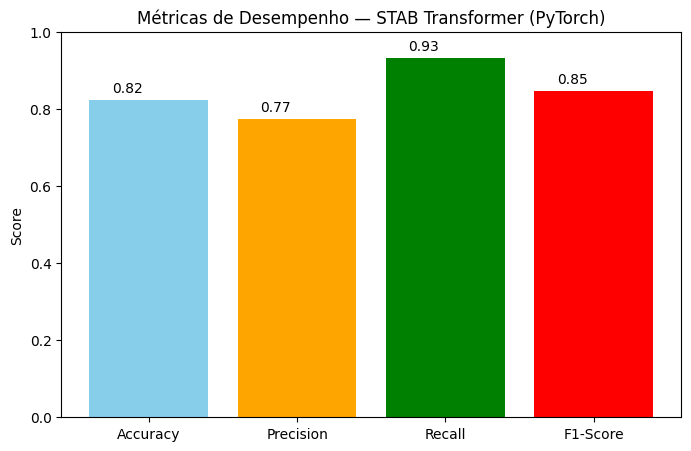

In [ ]:
model.eval()
X_test_tensor = torch.tensor(X_test_nn, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test_nn.values, dtype=torch.float32)  # <-- Aqui está o fix

with torch.no_grad():
    y_pred_prob = model(X_test_tensor.to(device)).cpu().squeeze().numpy()
    y_pred = (y_pred_prob >= 0.5).astype(int)


# Save model weights
torch.save(model.state_dict(), 'stab_transformer_4head_2layer_0.1droput.pt')
files.download('stab_transformer_4head_2layer_0.1droput.pt')


acc = accuracy_score(y_test_nn, y_pred)
prec = precision_score(y_test_nn, y_pred)
rec = recall_score(y_test_nn, y_pred)
f1 = f1_score(y_test_nn, y_pred)

print(f"✅ Accuracy: {acc:.4f}")
print(f"✅ Precision: {prec:.4f}")
print(f"✅ Recall: {rec:.4f}")
print(f"✅ F1 Score: {f1:.4f}")

metrics_names = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
metrics_values = [acc, prec, rec, f1]

plt.figure(figsize=(8, 5))
bars = plt.bar(metrics_names, metrics_values, color=['skyblue', 'orange', 'green', 'red'])
plt.ylim(0, 1)
plt.title('Métricas de Desempenho — STAB Transformer (PyTorch)')
plt.ylabel('Score')
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + 0.15, yval + 0.02, f'{yval:.2f}')
plt.show()



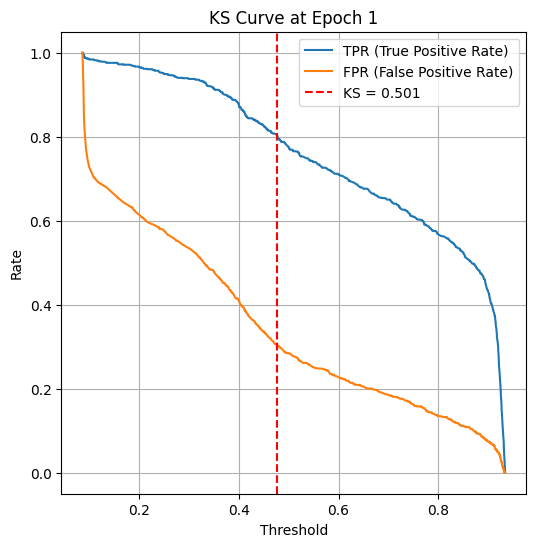

Epoch 000 — Train Loss: 0.5273 | Train Acc: 0.7502 | Val KS: 0.5008 | Val Acc: 0.7465 | Val Prec: 0.7476 | Val Recall: 0.7743 | Val F1: 0.7607
Epoch 010 — Train Loss: 0.4850 | Train Acc: 0.7696 | Val KS: 0.5199 | Val Acc: 0.7609 | Val Prec: 0.7218 | Val Recall: 0.8796 | Val F1: 0.7929
Epoch 020 — Train Loss: 0.4775 | Train Acc: 0.7764 | Val KS: 0.5134 | Val Acc: 0.7572 | Val Prec: 0.7293 | Val Recall: 0.8483 | Val F1: 0.7843


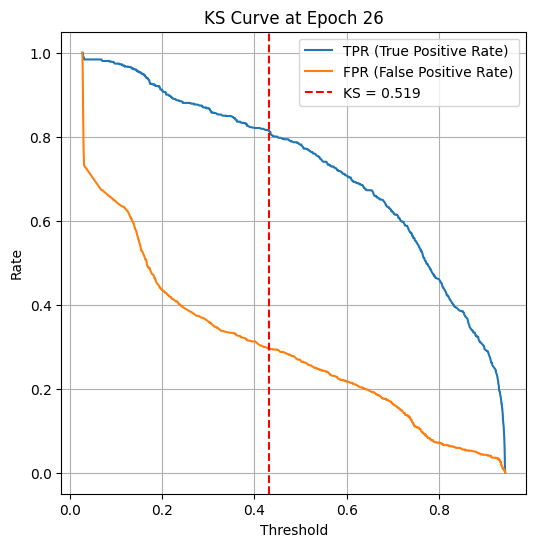

Epoch 030 — Train Loss: 0.4687 | Train Acc: 0.7810 | Val KS: 0.5188 | Val Acc: 0.7516 | Val Prec: 0.7593 | Val Recall: 0.7654 | Val F1: 0.7623
Epoch 040 — Train Loss: 0.4645 | Train Acc: 0.7806 | Val KS: 0.5117 | Val Acc: 0.7535 | Val Prec: 0.7349 | Val Recall: 0.8234 | Val F1: 0.7766


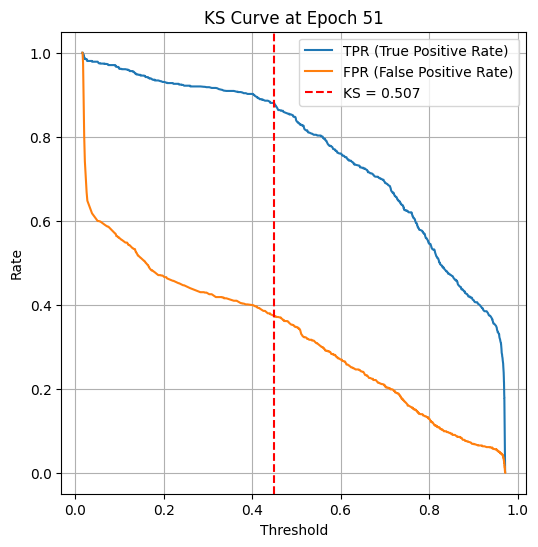

Epoch 050 — Train Loss: 0.4591 | Train Acc: 0.7826 | Val KS: 0.5069 | Val Acc: 0.7498 | Val Prec: 0.7242 | Val Recall: 0.8385 | Val F1: 0.7772
Epoch 060 — Train Loss: 0.4494 | Train Acc: 0.7916 | Val KS: 0.5103 | Val Acc: 0.7553 | Val Prec: 0.7207 | Val Recall: 0.8653 | Val F1: 0.7864
Epoch 070 — Train Loss: 0.4382 | Train Acc: 0.8005 | Val KS: 0.5259 | Val Acc: 0.7581 | Val Prec: 0.7107 | Val Recall: 0.9028 | Val F1: 0.7953


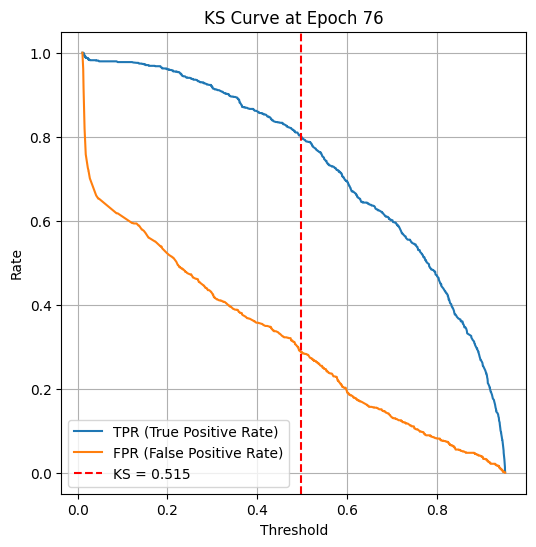

Epoch 080 — Train Loss: 0.4248 | Train Acc: 0.8070 | Val KS: 0.5323 | Val Acc: 0.7586 | Val Prec: 0.7375 | Val Recall: 0.8323 | Val F1: 0.7821
Epoch 090 — Train Loss: 0.4004 | Train Acc: 0.8199 | Val KS: 0.5442 | Val Acc: 0.7744 | Val Prec: 0.7257 | Val Recall: 0.9108 | Val F1: 0.8078


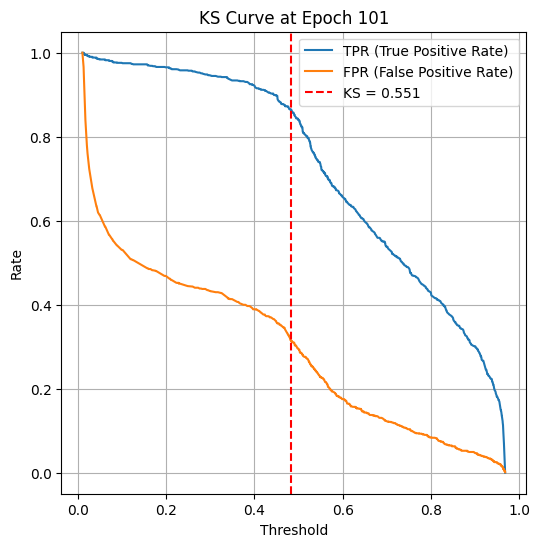

Epoch 100 — Train Loss: 0.3896 | Train Acc: 0.8166 | Val KS: 0.5508 | Val Acc: 0.7762 | Val Prec: 0.7566 | Val Recall: 0.8403 | Val F1: 0.7963
Epoch 110 — Train Loss: 0.3783 | Train Acc: 0.8259 | Val KS: 0.5337 | Val Acc: 0.7688 | Val Prec: 0.7365 | Val Recall: 0.8653 | Val F1: 0.7957
Epoch 120 — Train Loss: 0.3631 | Train Acc: 0.8302 | Val KS: 0.5696 | Val Acc: 0.7897 | Val Prec: 0.7359 | Val Recall: 0.9295 | Val F1: 0.8214


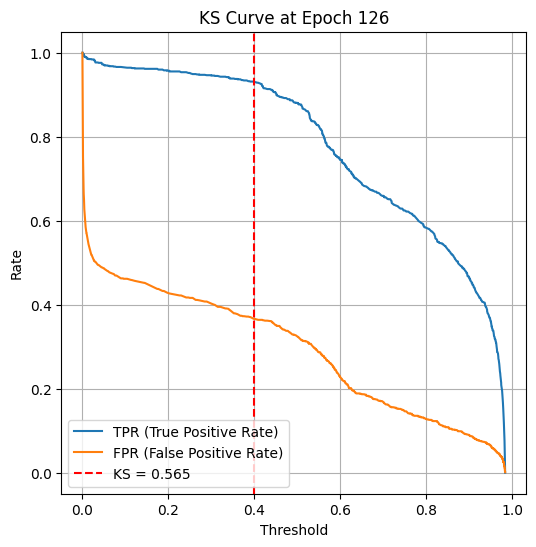

Epoch 130 — Train Loss: 0.3526 | Train Acc: 0.8397 | Val KS: 0.5665 | Val Acc: 0.7860 | Val Prec: 0.7381 | Val Recall: 0.9126 | Val F1: 0.8161
Epoch 140 — Train Loss: 0.3413 | Train Acc: 0.8420 | Val KS: 0.5886 | Val Acc: 0.7967 | Val Prec: 0.7498 | Val Recall: 0.9144 | Val F1: 0.8240


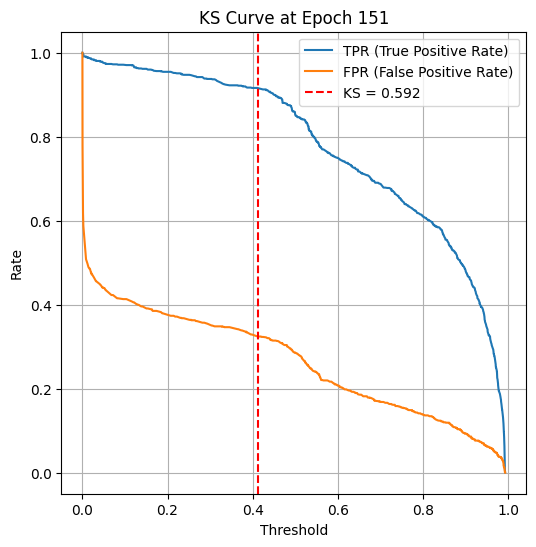

Epoch 150 — Train Loss: 0.3331 | Train Acc: 0.8462 | Val KS: 0.5918 | Val Acc: 0.7855 | Val Prec: 0.7638 | Val Recall: 0.8510 | Val F1: 0.8051
Epoch 160 — Train Loss: 0.3175 | Train Acc: 0.8544 | Val KS: 0.5977 | Val Acc: 0.7999 | Val Prec: 0.7482 | Val Recall: 0.9277 | Val F1: 0.8284
Epoch 170 — Train Loss: 0.3004 | Train Acc: 0.8652 | Val KS: 0.6055 | Val Acc: 0.8022 | Val Prec: 0.7538 | Val Recall: 0.9206 | Val F1: 0.8289


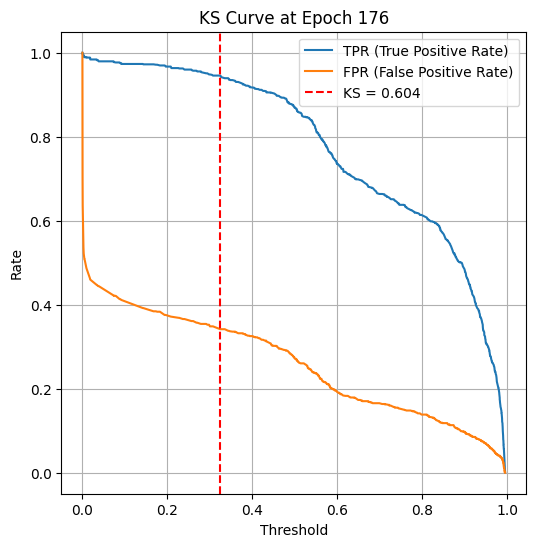

Epoch 180 — Train Loss: 0.2978 | Train Acc: 0.8646 | Val KS: 0.5952 | Val Acc: 0.7967 | Val Prec: 0.7629 | Val Recall: 0.8840 | Val F1: 0.8190
Epoch 190 — Train Loss: 0.2934 | Train Acc: 0.8699 | Val KS: 0.6102 | Val Acc: 0.7967 | Val Prec: 0.7617 | Val Recall: 0.8867 | Val F1: 0.8195


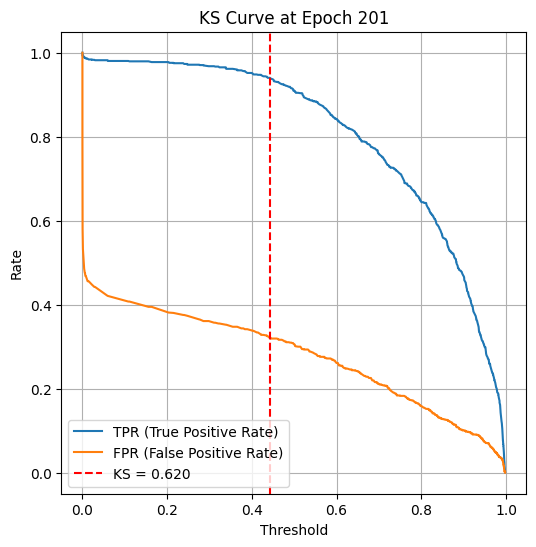

Epoch 200 — Train Loss: 0.2799 | Train Acc: 0.8742 | Val KS: 0.6198 | Val Acc: 0.8059 | Val Prec: 0.7633 | Val Recall: 0.9090 | Val F1: 0.8298
Epoch 210 — Train Loss: 0.2745 | Train Acc: 0.8722 | Val KS: 0.6139 | Val Acc: 0.8087 | Val Prec: 0.7616 | Val Recall: 0.9206 | Val F1: 0.8336
Epoch 220 — Train Loss: 0.2684 | Train Acc: 0.8802 | Val KS: 0.6217 | Val Acc: 0.8041 | Val Prec: 0.7733 | Val Recall: 0.8822 | Val F1: 0.8242


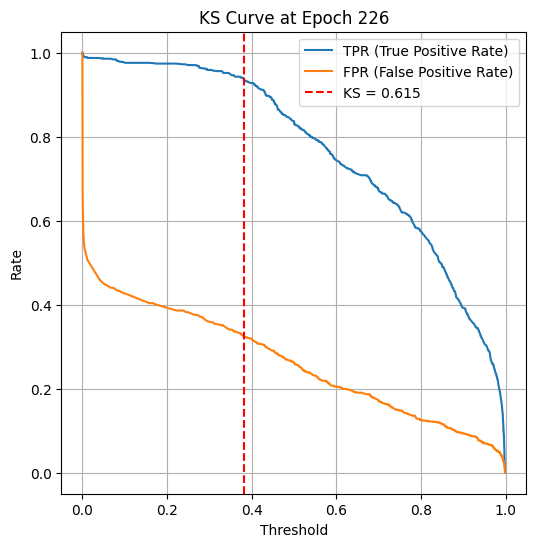

Epoch 230 — Train Loss: 0.2685 | Train Acc: 0.8788 | Val KS: 0.6227 | Val Acc: 0.8050 | Val Prec: 0.7793 | Val Recall: 0.8724 | Val F1: 0.8232
Epoch 240 — Train Loss: 0.2573 | Train Acc: 0.8866 | Val KS: 0.6175 | Val Acc: 0.8045 | Val Prec: 0.7730 | Val Recall: 0.8840 | Val F1: 0.8248


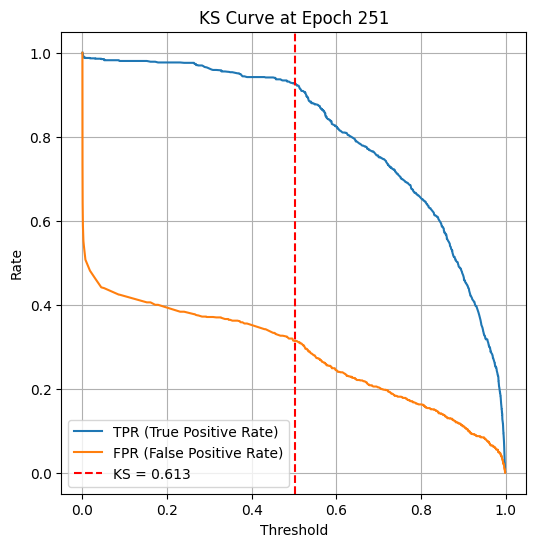

Epoch 250 — Train Loss: 0.2431 | Train Acc: 0.8907 | Val KS: 0.6132 | Val Acc: 0.8115 | Val Prec: 0.7623 | Val Recall: 0.9269 | Val F1: 0.8366
Epoch 260 — Train Loss: 0.2601 | Train Acc: 0.8883 | Val KS: 0.6380 | Val Acc: 0.8180 | Val Prec: 0.7872 | Val Recall: 0.8912 | Val F1: 0.8360
Epoch 270 — Train Loss: 0.2513 | Train Acc: 0.8890 | Val KS: 0.6322 | Val Acc: 0.8073 | Val Prec: 0.7861 | Val Recall: 0.8653 | Val F1: 0.8238


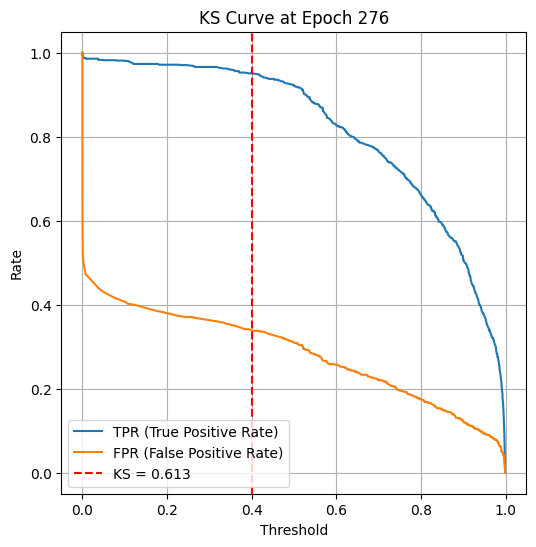

Epoch 280 — Train Loss: 0.2393 | Train Acc: 0.8952 | Val KS: 0.6237 | Val Acc: 0.8138 | Val Prec: 0.7632 | Val Recall: 0.9313 | Val F1: 0.8389
Epoch 290 — Train Loss: 0.2392 | Train Acc: 0.8980 | Val KS: 0.6446 | Val Acc: 0.8106 | Val Prec: 0.7925 | Val Recall: 0.8617 | Val F1: 0.8256


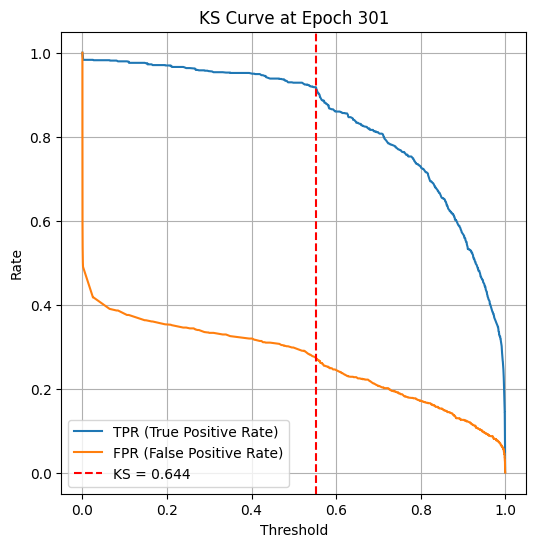

Epoch 300 — Train Loss: 0.2372 | Train Acc: 0.8942 | Val KS: 0.6440 | Val Acc: 0.8203 | Val Prec: 0.7723 | Val Recall: 0.9286 | Val F1: 0.8433
Epoch 310 — Train Loss: 0.2335 | Train Acc: 0.8997 | Val KS: 0.6479 | Val Acc: 0.8180 | Val Prec: 0.7895 | Val Recall: 0.8867 | Val F1: 0.8353
Epoch 320 — Train Loss: 0.2259 | Train Acc: 0.9017 | Val KS: 0.6548 | Val Acc: 0.8208 | Val Prec: 0.7905 | Val Recall: 0.8921 | Val F1: 0.8382


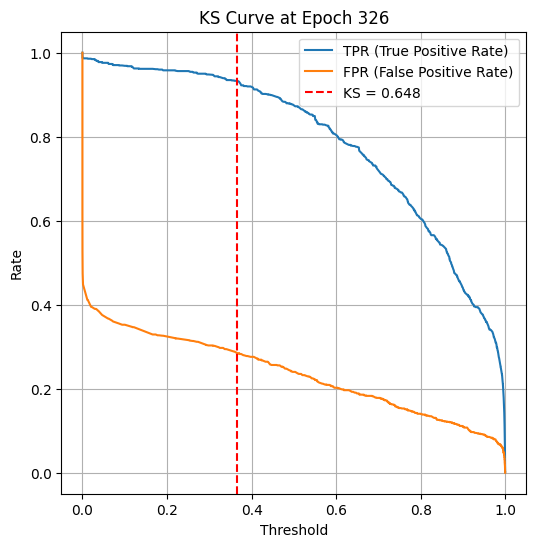

Epoch 330 — Train Loss: 0.2216 | Train Acc: 0.9030 | Val KS: 0.6437 | Val Acc: 0.8240 | Val Prec: 0.7836 | Val Recall: 0.9144 | Val F1: 0.8440
Epoch 340 — Train Loss: 0.2282 | Train Acc: 0.9003 | Val KS: 0.6419 | Val Acc: 0.8213 | Val Prec: 0.7831 | Val Recall: 0.9081 | Val F1: 0.8410


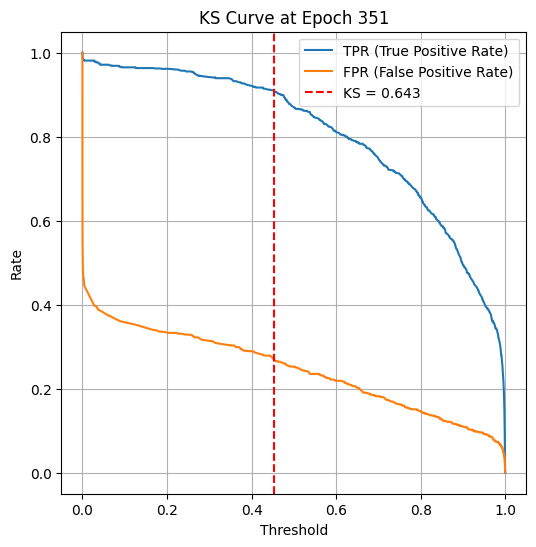

Epoch 350 — Train Loss: 0.2169 | Train Acc: 0.9028 | Val KS: 0.6426 | Val Acc: 0.8106 | Val Prec: 0.7887 | Val Recall: 0.8689 | Val F1: 0.8268
Epoch 360 — Train Loss: 0.2166 | Train Acc: 0.9041 | Val KS: 0.6219 | Val Acc: 0.8073 | Val Prec: 0.7771 | Val Recall: 0.8831 | Val F1: 0.8267
Epoch 370 — Train Loss: 0.2076 | Train Acc: 0.9059 | Val KS: 0.6432 | Val Acc: 0.8222 | Val Prec: 0.7791 | Val Recall: 0.9188 | Val F1: 0.8432


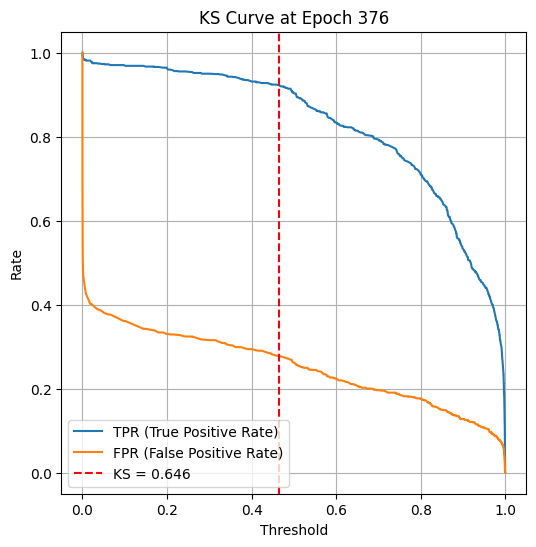

Epoch 380 — Train Loss: 0.2153 | Train Acc: 0.9084 | Val KS: 0.6413 | Val Acc: 0.8152 | Val Prec: 0.7913 | Val Recall: 0.8760 | Val F1: 0.8315
Epoch 390 — Train Loss: 0.2101 | Train Acc: 0.9062 | Val KS: 0.6591 | Val Acc: 0.8268 | Val Prec: 0.8036 | Val Recall: 0.8831 | Val F1: 0.8415


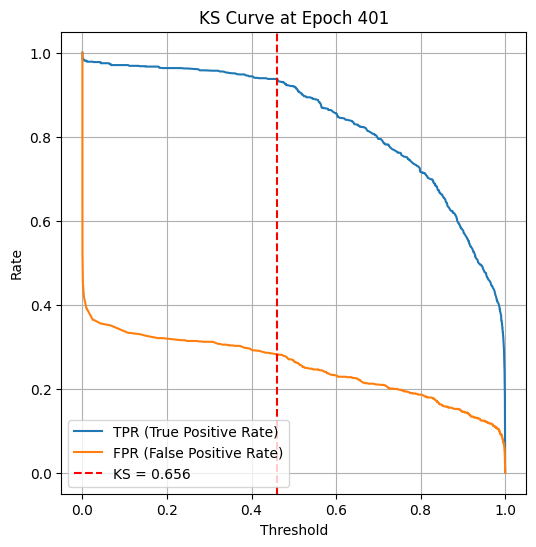

Epoch 400 — Train Loss: 0.2009 | Train Acc: 0.9079 | Val KS: 0.6559 | Val Acc: 0.8305 | Val Prec: 0.7899 | Val Recall: 0.9188 | Val F1: 0.8495
Epoch 410 — Train Loss: 0.2081 | Train Acc: 0.9093 | Val KS: 0.6659 | Val Acc: 0.8315 | Val Prec: 0.7961 | Val Recall: 0.9090 | Val F1: 0.8488
Epoch 420 — Train Loss: 0.2024 | Train Acc: 0.9129 | Val KS: 0.6436 | Val Acc: 0.8227 | Val Prec: 0.7814 | Val Recall: 0.9153 | Val F1: 0.8431


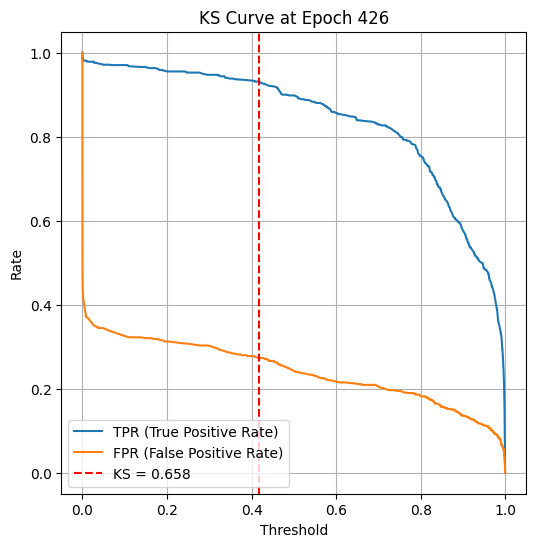

Epoch 430 — Train Loss: 0.2055 | Train Acc: 0.9078 | Val KS: 0.6642 | Val Acc: 0.8227 | Val Prec: 0.7973 | Val Recall: 0.8840 | Val F1: 0.8384
Epoch 440 — Train Loss: 0.2030 | Train Acc: 0.9087 | Val KS: 0.6667 | Val Acc: 0.8301 | Val Prec: 0.7952 | Val Recall: 0.9072 | Val F1: 0.8475


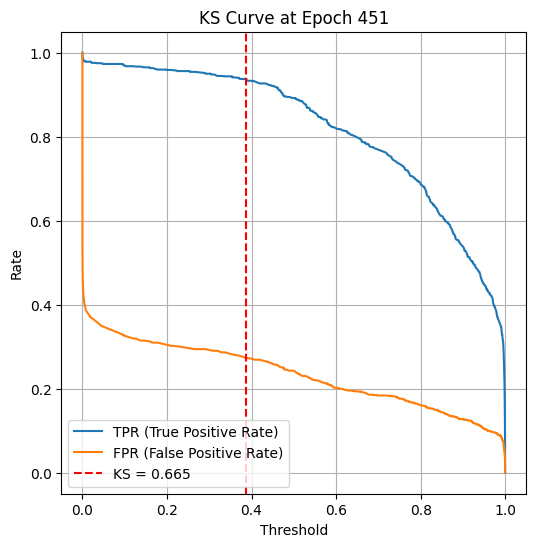

Epoch 450 — Train Loss: 0.1982 | Train Acc: 0.9140 | Val KS: 0.6646 | Val Acc: 0.8278 | Val Prec: 0.8000 | Val Recall: 0.8921 | Val F1: 0.8435
Epoch 460 — Train Loss: 0.2001 | Train Acc: 0.9107 | Val KS: 0.6694 | Val Acc: 0.8329 | Val Prec: 0.7938 | Val Recall: 0.9170 | Val F1: 0.8510
Epoch 470 — Train Loss: 0.1978 | Train Acc: 0.9155 | Val KS: 0.6668 | Val Acc: 0.8324 | Val Prec: 0.8055 | Val Recall: 0.8938 | Val F1: 0.8474


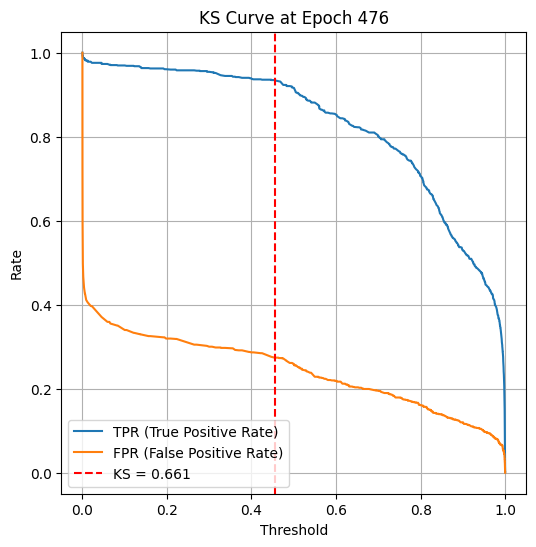

Epoch 480 — Train Loss: 0.1992 | Train Acc: 0.9109 | Val KS: 0.6683 | Val Acc: 0.8329 | Val Prec: 0.7970 | Val Recall: 0.9108 | Val F1: 0.8501
Epoch 490 — Train Loss: 0.1894 | Train Acc: 0.9188 | Val KS: 0.6636 | Val Acc: 0.8310 | Val Prec: 0.8021 | Val Recall: 0.8965 | Val F1: 0.8467


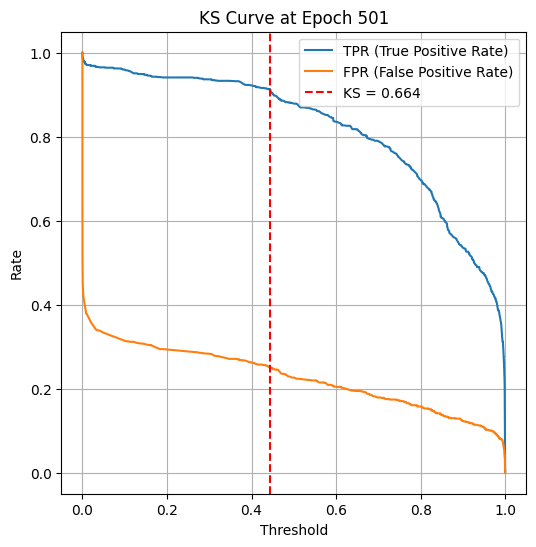

Epoch 500 — Train Loss: 0.1955 | Train Acc: 0.9164 | Val KS: 0.6637 | Val Acc: 0.8282 | Val Prec: 0.8080 | Val Recall: 0.8787 | Val F1: 0.8419
Epoch 510 — Train Loss: 0.1939 | Train Acc: 0.9157 | Val KS: 0.6609 | Val Acc: 0.8254 | Val Prec: 0.7997 | Val Recall: 0.8867 | Val F1: 0.8409
Epoch 520 — Train Loss: 0.1836 | Train Acc: 0.9178 | Val KS: 0.6621 | Val Acc: 0.8194 | Val Prec: 0.7966 | Val Recall: 0.8769 | Val F1: 0.8348


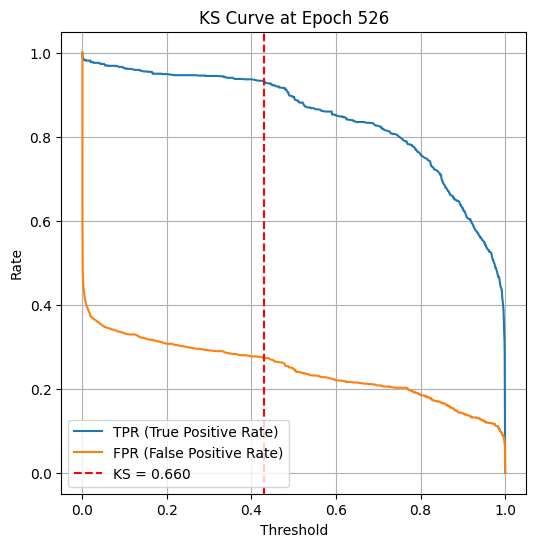

Epoch 530 — Train Loss: 0.1862 | Train Acc: 0.9194 | Val KS: 0.6658 | Val Acc: 0.8240 | Val Prec: 0.7968 | Val Recall: 0.8885 | Val F1: 0.8402
Epoch 540 — Train Loss: 0.1799 | Train Acc: 0.9209 | Val KS: 0.6559 | Val Acc: 0.8254 | Val Prec: 0.7945 | Val Recall: 0.8965 | Val F1: 0.8424


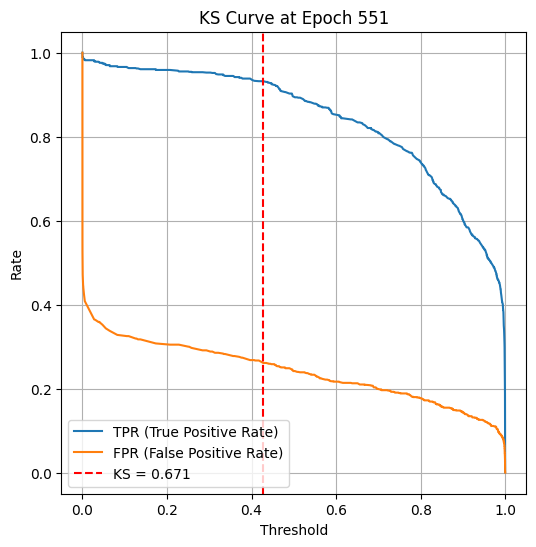

Epoch 550 — Train Loss: 0.1855 | Train Acc: 0.9200 | Val KS: 0.6708 | Val Acc: 0.8287 | Val Prec: 0.8003 | Val Recall: 0.8938 | Val F1: 0.8445
Epoch 560 — Train Loss: 0.1892 | Train Acc: 0.9203 | Val KS: 0.6656 | Val Acc: 0.8273 | Val Prec: 0.8077 | Val Recall: 0.8769 | Val F1: 0.8409
Epoch 570 — Train Loss: 0.1875 | Train Acc: 0.9169 | Val KS: 0.6642 | Val Acc: 0.8352 | Val Prec: 0.7910 | Val Recall: 0.9286 | Val F1: 0.8543


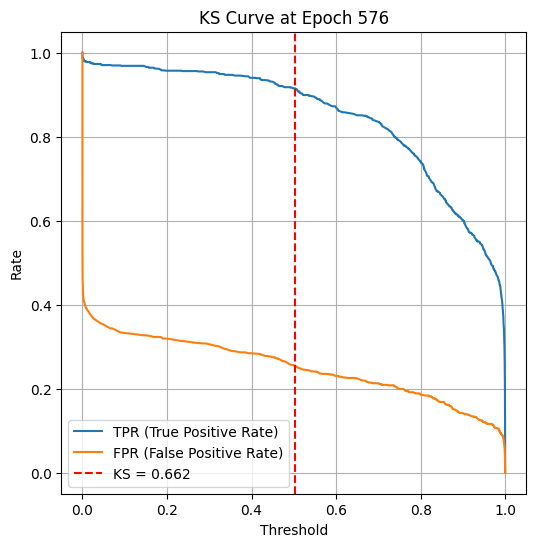

Epoch 580 — Train Loss: 0.1792 | Train Acc: 0.9222 | Val KS: 0.6702 | Val Acc: 0.8384 | Val Prec: 0.7944 | Val Recall: 0.9304 | Val F1: 0.8570
Epoch 590 — Train Loss: 0.1847 | Train Acc: 0.9226 | Val KS: 0.6748 | Val Acc: 0.8301 | Val Prec: 0.8008 | Val Recall: 0.8965 | Val F1: 0.8460


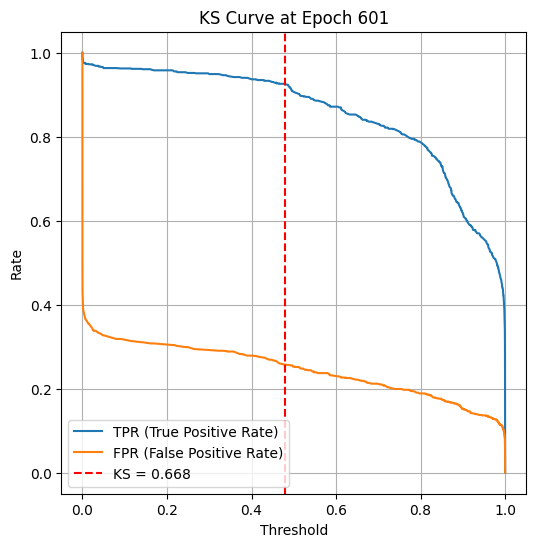

Epoch 600 — Train Loss: 0.1747 | Train Acc: 0.9188 | Val KS: 0.6685 | Val Acc: 0.8296 | Val Prec: 0.7955 | Val Recall: 0.9054 | Val F1: 0.8469
Epoch 610 — Train Loss: 0.1715 | Train Acc: 0.9232 | Val KS: 0.6728 | Val Acc: 0.8375 | Val Prec: 0.7932 | Val Recall: 0.9304 | Val F1: 0.8563
Epoch 620 — Train Loss: 0.1872 | Train Acc: 0.9191 | Val KS: 0.6668 | Val Acc: 0.8315 | Val Prec: 0.7961 | Val Recall: 0.9090 | Val F1: 0.8488


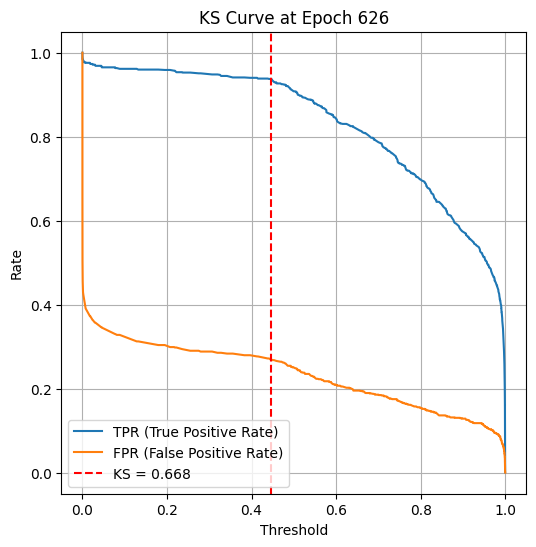

Epoch 630 — Train Loss: 0.1779 | Train Acc: 0.9215 | Val KS: 0.6611 | Val Acc: 0.8282 | Val Prec: 0.7997 | Val Recall: 0.8938 | Val F1: 0.8441
Epoch 640 — Train Loss: 0.1821 | Train Acc: 0.9201 | Val KS: 0.6683 | Val Acc: 0.8333 | Val Prec: 0.7981 | Val Recall: 0.9099 | Val F1: 0.8504


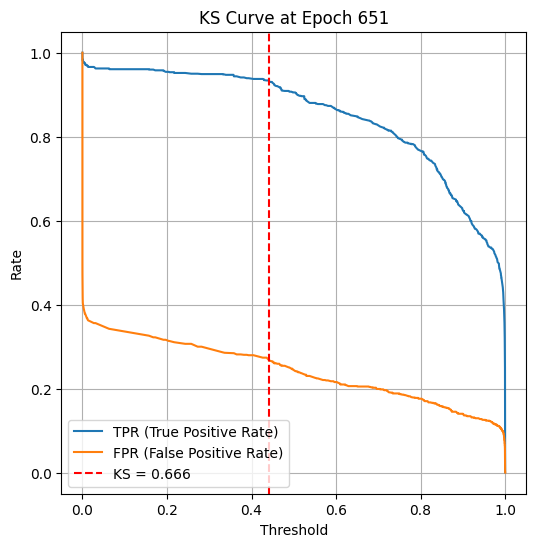

Epoch 650 — Train Loss: 0.1751 | Train Acc: 0.9205 | Val KS: 0.6659 | Val Acc: 0.8343 | Val Prec: 0.8017 | Val Recall: 0.9054 | Val F1: 0.8504
Epoch 660 — Train Loss: 0.1886 | Train Acc: 0.9201 | Val KS: 0.6496 | Val Acc: 0.8273 | Val Prec: 0.7784 | Val Recall: 0.9340 | Val F1: 0.8491
Epoch 670 — Train Loss: 0.1709 | Train Acc: 0.9240 | Val KS: 0.6606 | Val Acc: 0.8324 | Val Prec: 0.7853 | Val Recall: 0.9331 | Val F1: 0.8528


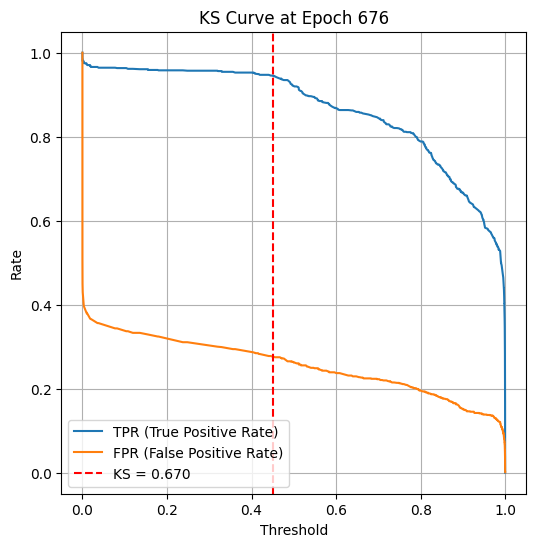

Epoch 680 — Train Loss: 0.1789 | Train Acc: 0.9263 | Val KS: 0.6675 | Val Acc: 0.8296 | Val Prec: 0.7950 | Val Recall: 0.9063 | Val F1: 0.8470
Epoch 690 — Train Loss: 0.1649 | Train Acc: 0.9301 | Val KS: 0.6699 | Val Acc: 0.8301 | Val Prec: 0.8003 | Val Recall: 0.8974 | Val F1: 0.8461


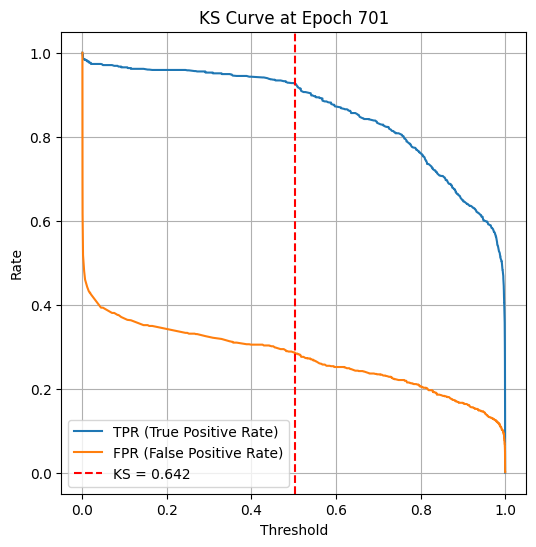

Epoch 700 — Train Loss: 0.1828 | Train Acc: 0.9201 | Val KS: 0.6422 | Val Acc: 0.8245 | Val Prec: 0.7783 | Val Recall: 0.9269 | Val F1: 0.8461
Epoch 710 — Train Loss: 0.1571 | Train Acc: 0.9322 | Val KS: 0.6657 | Val Acc: 0.8310 | Val Prec: 0.7896 | Val Recall: 0.9206 | Val F1: 0.8501
Epoch 720 — Train Loss: 0.1669 | Train Acc: 0.9249 | Val KS: 0.6426 | Val Acc: 0.8236 | Val Prec: 0.7722 | Val Recall: 0.9376 | Val F1: 0.8469


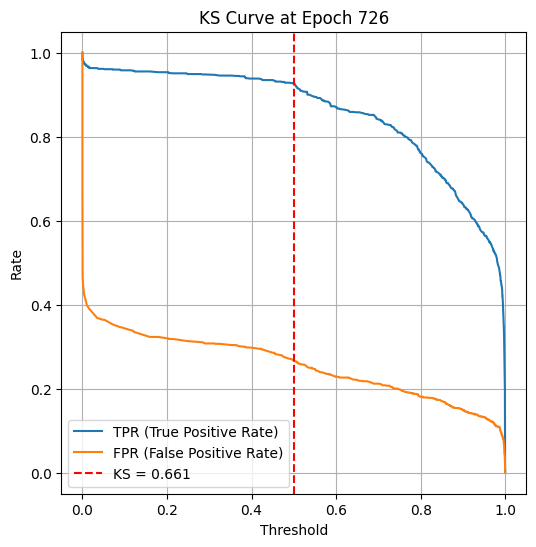

Epoch 730 — Train Loss: 0.1793 | Train Acc: 0.9256 | Val KS: 0.6643 | Val Acc: 0.8315 | Val Prec: 0.7956 | Val Recall: 0.9099 | Val F1: 0.8489
Epoch 740 — Train Loss: 0.1725 | Train Acc: 0.9236 | Val KS: 0.6612 | Val Acc: 0.8264 | Val Prec: 0.7929 | Val Recall: 0.9019 | Val F1: 0.8439


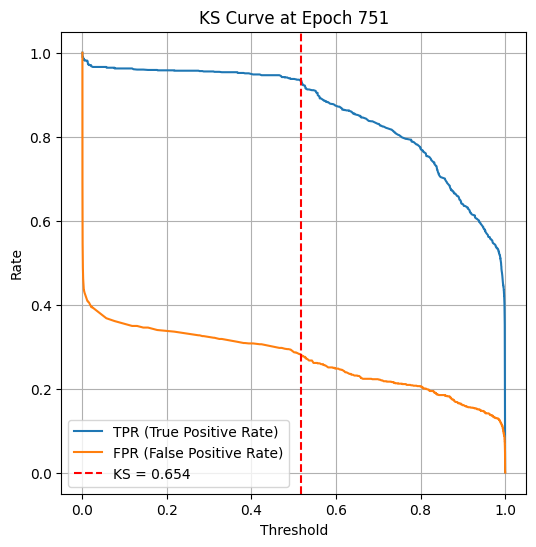

Epoch 750 — Train Loss: 0.1665 | Train Acc: 0.9290 | Val KS: 0.6543 | Val Acc: 0.8301 | Val Prec: 0.7803 | Val Recall: 0.9376 | Val F1: 0.8517
Epoch 760 — Train Loss: 0.1683 | Train Acc: 0.9270 | Val KS: 0.6737 | Val Acc: 0.8375 | Val Prec: 0.7918 | Val Recall: 0.9331 | Val F1: 0.8567
Epoch 770 — Train Loss: 0.1637 | Train Acc: 0.9291 | Val KS: 0.6700 | Val Acc: 0.8292 | Val Prec: 0.7986 | Val Recall: 0.8983 | Val F1: 0.8455


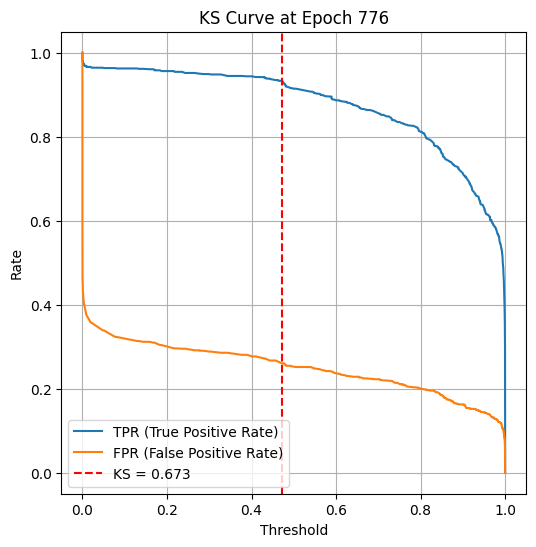

Epoch 780 — Train Loss: 0.1658 | Train Acc: 0.9271 | Val KS: 0.6782 | Val Acc: 0.8380 | Val Prec: 0.8002 | Val Recall: 0.9179 | Val F1: 0.8550
Epoch 790 — Train Loss: 0.1685 | Train Acc: 0.9274 | Val KS: 0.6718 | Val Acc: 0.8329 | Val Prec: 0.7952 | Val Recall: 0.9144 | Val F1: 0.8506


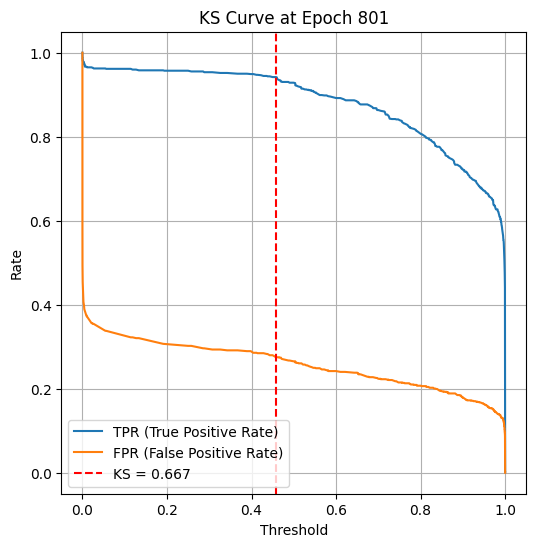

Epoch 800 — Train Loss: 0.1673 | Train Acc: 0.9266 | Val KS: 0.6671 | Val Acc: 0.8352 | Val Prec: 0.7915 | Val Recall: 0.9277 | Val F1: 0.8542
Epoch 810 — Train Loss: 0.1782 | Train Acc: 0.9228 | Val KS: 0.6737 | Val Acc: 0.8357 | Val Prec: 0.8008 | Val Recall: 0.9108 | Val F1: 0.8523
Epoch 820 — Train Loss: 0.1678 | Train Acc: 0.9263 | Val KS: 0.6766 | Val Acc: 0.8319 | Val Prec: 0.7981 | Val Recall: 0.9063 | Val F1: 0.8488


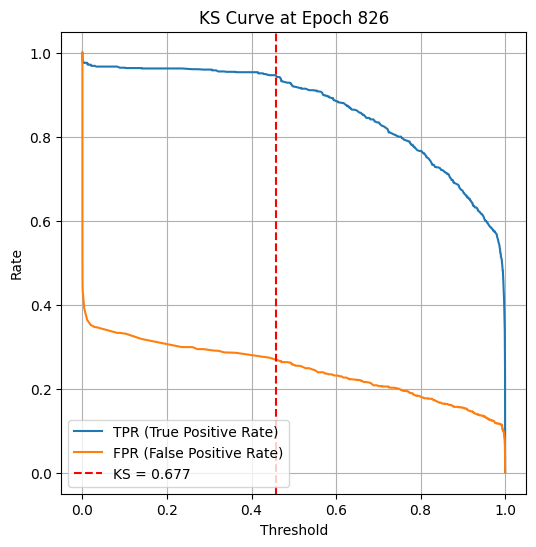

Epoch 830 — Train Loss: 0.1584 | Train Acc: 0.9297 | Val KS: 0.6759 | Val Acc: 0.8357 | Val Prec: 0.8120 | Val Recall: 0.8903 | Val F1: 0.8494
Epoch 840 — Train Loss: 0.1581 | Train Acc: 0.9297 | Val KS: 0.6658 | Val Acc: 0.8343 | Val Prec: 0.7851 | Val Recall: 0.9384 | Val F1: 0.8549


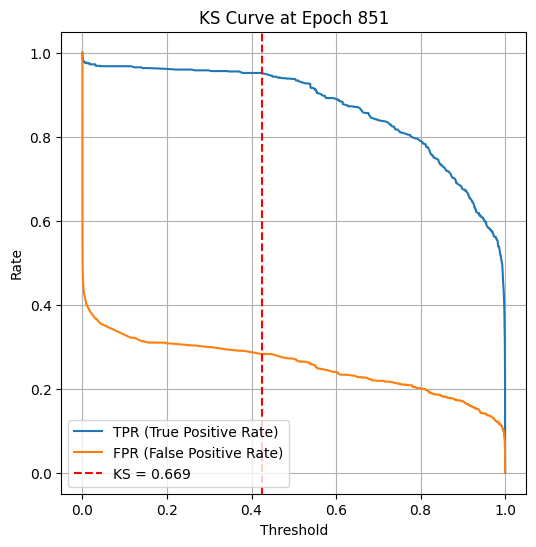

Epoch 850 — Train Loss: 0.1672 | Train Acc: 0.9273 | Val KS: 0.6692 | Val Acc: 0.8375 | Val Prec: 0.7896 | Val Recall: 0.9376 | Val F1: 0.8573
Epoch 860 — Train Loss: 0.1540 | Train Acc: 0.9335 | Val KS: 0.6874 | Val Acc: 0.8468 | Val Prec: 0.7976 | Val Recall: 0.9456 | Val F1: 0.8653
Epoch 870 — Train Loss: 0.1604 | Train Acc: 0.9316 | Val KS: 0.6708 | Val Acc: 0.8343 | Val Prec: 0.7980 | Val Recall: 0.9126 | Val F1: 0.8514


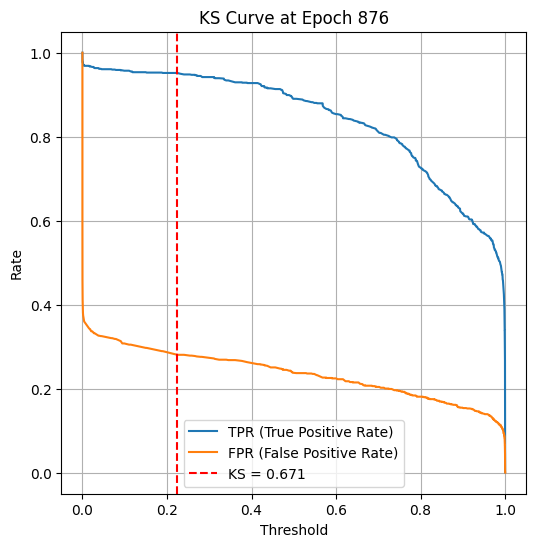

Epoch 880 — Train Loss: 0.1643 | Train Acc: 0.9270 | Val KS: 0.6844 | Val Acc: 0.8338 | Val Prec: 0.8054 | Val Recall: 0.8974 | Val F1: 0.8489
Epoch 890 — Train Loss: 0.1640 | Train Acc: 0.9274 | Val KS: 0.6572 | Val Acc: 0.8305 | Val Prec: 0.7812 | Val Recall: 0.9367 | Val F1: 0.8519


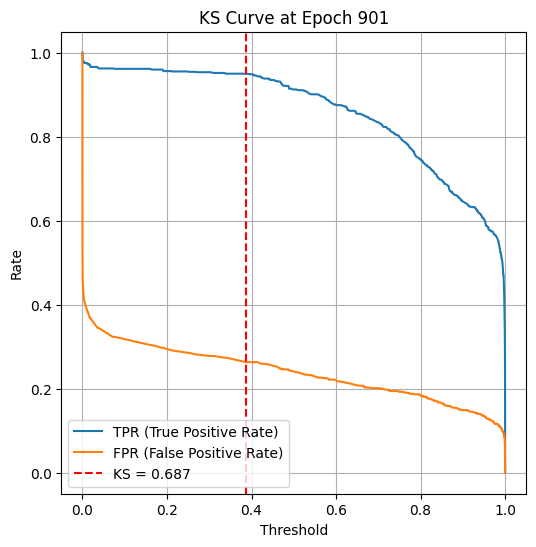

Epoch 900 — Train Loss: 0.1630 | Train Acc: 0.9296 | Val KS: 0.6867 | Val Acc: 0.8389 | Val Prec: 0.8042 | Val Recall: 0.9126 | Val F1: 0.8550
Epoch 910 — Train Loss: 0.1465 | Train Acc: 0.9375 | Val KS: 0.6704 | Val Acc: 0.8329 | Val Prec: 0.8027 | Val Recall: 0.9001 | Val F1: 0.8486
Epoch 920 — Train Loss: 0.1586 | Train Acc: 0.9291 | Val KS: 0.6811 | Val Acc: 0.8366 | Val Prec: 0.8040 | Val Recall: 0.9072 | Val F1: 0.8525


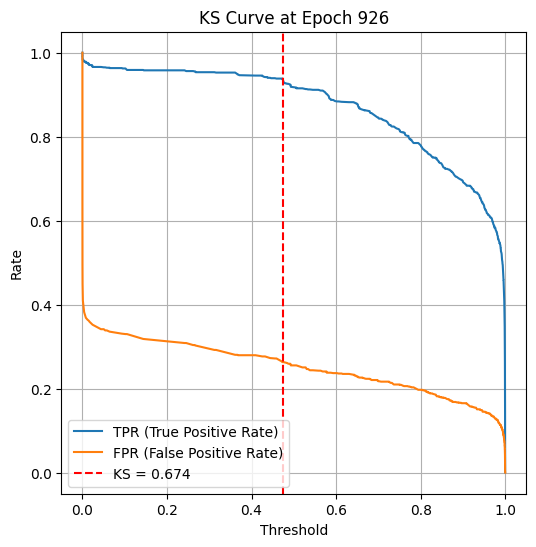

Epoch 930 — Train Loss: 0.1622 | Train Acc: 0.9288 | Val KS: 0.6829 | Val Acc: 0.8417 | Val Prec: 0.8076 | Val Recall: 0.9135 | Val F1: 0.8573
Epoch 940 — Train Loss: 0.1432 | Train Acc: 0.9375 | Val KS: 0.7052 | Val Acc: 0.8510 | Val Prec: 0.8195 | Val Recall: 0.9153 | Val F1: 0.8647


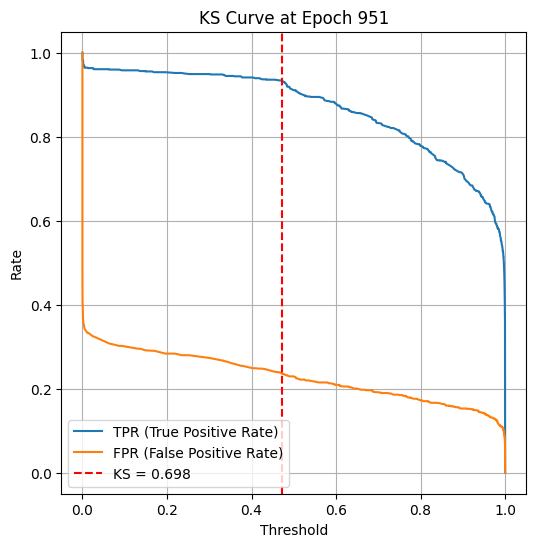

Epoch 950 — Train Loss: 0.1462 | Train Acc: 0.9344 | Val KS: 0.6978 | Val Acc: 0.8445 | Val Prec: 0.8129 | Val Recall: 0.9108 | Val F1: 0.8591
Epoch 960 — Train Loss: 0.1510 | Train Acc: 0.9336 | Val KS: 0.6847 | Val Acc: 0.8394 | Val Prec: 0.8133 | Val Recall: 0.8974 | Val F1: 0.8533
Epoch 970 — Train Loss: 0.1597 | Train Acc: 0.9288 | Val KS: 0.6964 | Val Acc: 0.8459 | Val Prec: 0.8109 | Val Recall: 0.9179 | Val F1: 0.8611


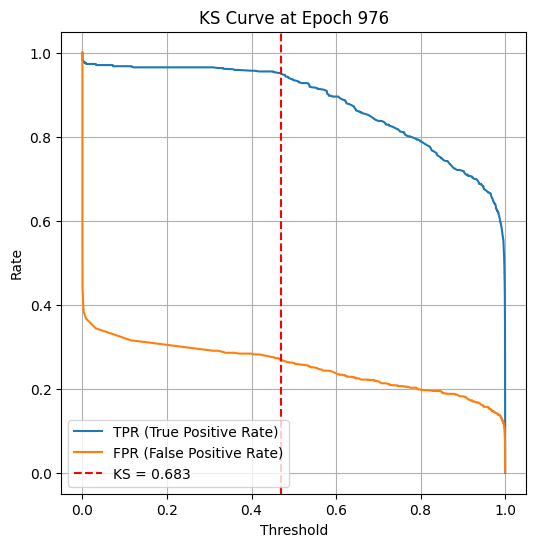

Epoch 980 — Train Loss: 0.1530 | Train Acc: 0.9342 | Val KS: 0.6913 | Val Acc: 0.8468 | Val Prec: 0.8083 | Val Recall: 0.9251 | Val F1: 0.8627
Epoch 990 — Train Loss: 0.1493 | Train Acc: 0.9359 | Val KS: 0.6928 | Val Acc: 0.8403 | Val Prec: 0.8115 | Val Recall: 0.9028 | Val F1: 0.8547
Epoch 999 — Train Loss: 0.1538 | Train Acc: 0.9328 | Val KS: 0.6696 | Val Acc: 0.8375 | Val Prec: 0.7905 | Val Recall: 0.9358 | Val F1: 0.8570


In [ ]:

# Model
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = STABTransformer(input_dim=X_train_tensor.shape[1], n_heads=2, n_layers=2, dropout=0.3).to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)
loss_fn = nn.BCELoss()


epochs=1000
for epoch in range(epochs):
    model.train()
    epoch_loss = 0

    all_preds = []
    all_targets = []

    for xb, yb in train_loader:
        xb, yb = xb.to(device), yb.to(device)

        pred = model(xb).squeeze()
        loss = loss_fn(pred, yb)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        epoch_loss += loss.item()

        preds_np = (pred > 0.5).detach().cpu().numpy()
        targets_np = yb.detach().cpu().numpy()

        all_preds.extend(preds_np)
        all_targets.extend(targets_np)

    # Training metrics
    acc = accuracy_score(all_targets, all_preds)
    prec = precision_score(all_targets, all_preds)
    rec = recall_score(all_targets, all_preds)
    f1 = f1_score(all_targets, all_preds)

    # Validation metrics
    ks_val, acc_val, prec_val, rec_val, f1_val = evaluate_validation(model, val_loader, device, epoch)

    if epoch % 10 == 0 or epoch == epochs - 1:
        print(f"Epoch {epoch:03d} — Train Loss: {epoch_loss/len(train_loader):.4f} | "
              f"Train Acc: {acc:.4f} | Val KS: {ks_val:.4f} | Val Acc: {acc_val:.4f} | "
              f"Val Prec: {prec_val:.4f} | Val Recall: {rec_val:.4f} | Val F1: {f1_val:.4f}")


In [ ]:

torch.save(model.state_dict(), 'stab_transformer_2head_2layer_0.1droput_1000epochs.pt')
files.download('stab_transformer_2head_2layer_0.1droput_1000epochs.pt')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

✅ Accuracy: 0.8357
✅ Precision: 0.7894
✅ Recall: 0.9331
✅ F1 Score: 0.8553


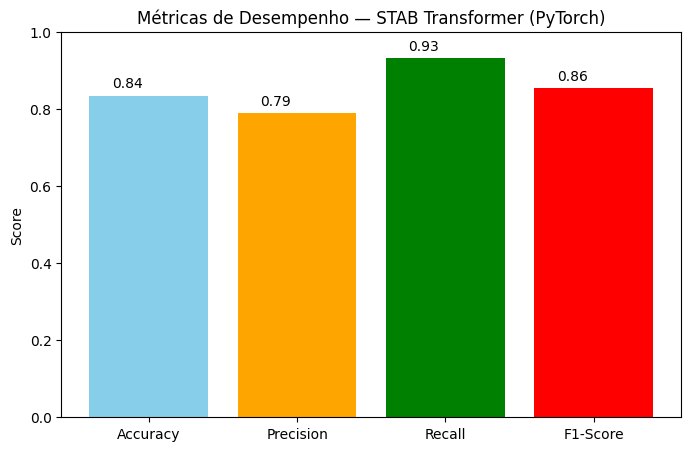

In [ ]:
model.eval()
X_test_tensor = torch.tensor(X_test_nn, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test_nn.values, dtype=torch.float32)  # <-- Aqui está o fix

with torch.no_grad():
    y_pred_prob = model(X_test_tensor.to(device)).cpu().squeeze().numpy()
    y_pred = (y_pred_prob >= 0.5).astype(int)


# Save model weights
torch.save(model.state_dict(), 'stab_transformer_4head_2layer_0.1droput.pt')
files.download('stab_transformer_4head_2layer_0.1droput.pt')


acc = accuracy_score(y_test_nn, y_pred)
prec = precision_score(y_test_nn, y_pred)
rec = recall_score(y_test_nn, y_pred)
f1 = f1_score(y_test_nn, y_pred)

print(f"✅ Accuracy: {acc:.4f}")
print(f"✅ Precision: {prec:.4f}")
print(f"✅ Recall: {rec:.4f}")
print(f"✅ F1 Score: {f1:.4f}")

metrics_names = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
metrics_values = [acc, prec, rec, f1]

plt.figure(figsize=(8, 5))
bars = plt.bar(metrics_names, metrics_values, color=['skyblue', 'orange', 'green', 'red'])
plt.ylim(0, 1)
plt.title('Métricas de Desempenho — STAB Transformer (PyTorch)')
plt.ylabel('Score')
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + 0.15, yval + 0.02, f'{yval:.2f}')
plt.show()



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

✅ Accuracy: 0.4986
✅ Precision: 0.5154
✅ Recall: 0.6102
✅ F1 Score: 0.5588


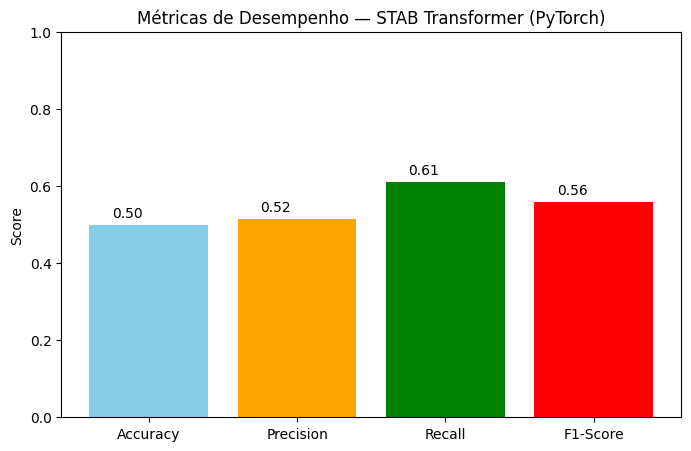

In [ ]:
model.eval()
X_test_tensor = torch.tensor(X_val_nn, dtype=torch.float32)
y_test_tensor = torch.tensor(y_val_nn.values, dtype=torch.float32)  # <-- Aqui está o fix

with torch.no_grad():
    y_pred_prob = model(X_test_tensor.to(device)).cpu().squeeze().numpy()
    y_pred = (y_pred_prob >= 0.5).astype(int)


# Save model weights
torch.save(model.state_dict(), 'stab_transformer_4head_2layer_0.1droput.pt')
files.download('stab_transformer_4head_2layer_0.1droput.pt')


acc = accuracy_score(y_test_nn, y_pred)
prec = precision_score(y_test_nn, y_pred)
rec = recall_score(y_test_nn, y_pred)
f1 = f1_score(y_test_nn, y_pred)

print(f"✅ Accuracy: {acc:.4f}")
print(f"✅ Precision: {prec:.4f}")
print(f"✅ Recall: {rec:.4f}")
print(f"✅ F1 Score: {f1:.4f}")

metrics_names = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
metrics_values = [acc, prec, rec, f1]

plt.figure(figsize=(8, 5))
bars = plt.bar(metrics_names, metrics_values, color=['skyblue', 'orange', 'green', 'red'])
plt.ylim(0, 1)
plt.title('Métricas de Desempenho — STAB Transformer (PyTorch)')
plt.ylabel('Score')
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + 0.15, yval + 0.02, f'{yval:.2f}')
plt.show()



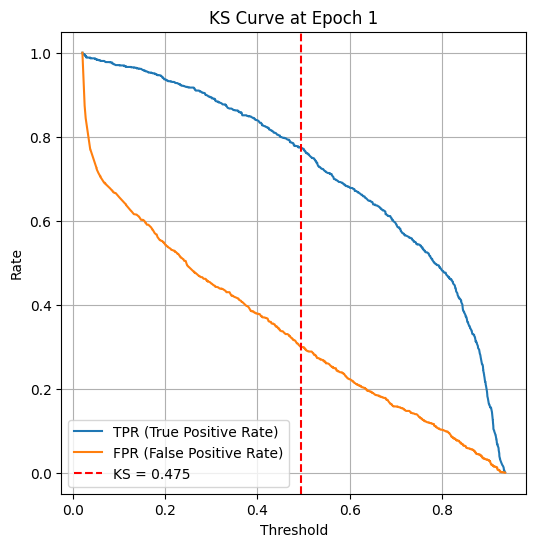

Epoch 000 — Train Loss: 0.5077 | Train Acc: 0.7614 | Val KS: 0.4752 | Val Acc: 0.7372 | Val Prec: 0.7366 | Val Recall: 0.7707 | Val F1: 0.7533
Epoch 010 — Train Loss: 0.4804 | Train Acc: 0.7721 | Val KS: 0.5136 | Val Acc: 0.7558 | Val Prec: 0.7465 | Val Recall: 0.8037 | Val F1: 0.7741
Epoch 020 — Train Loss: 0.4643 | Train Acc: 0.7821 | Val KS: 0.5245 | Val Acc: 0.7656 | Val Prec: 0.7319 | Val Recall: 0.8671 | Val F1: 0.7938


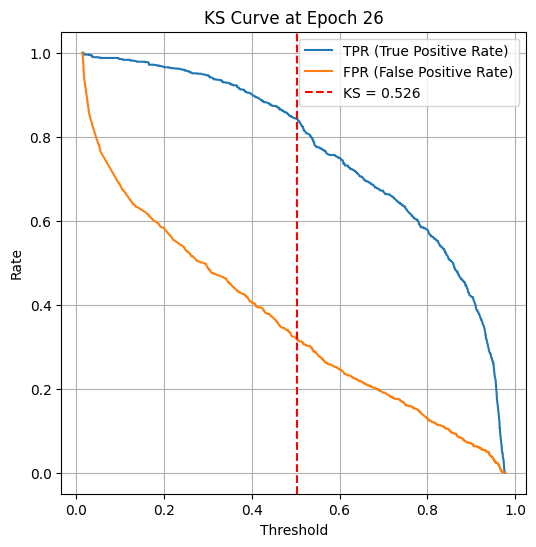

Epoch 030 — Train Loss: 0.4553 | Train Acc: 0.7866 | Val KS: 0.5280 | Val Acc: 0.7665 | Val Prec: 0.7460 | Val Recall: 0.8359 | Val F1: 0.7884
Epoch 040 — Train Loss: 0.4316 | Train Acc: 0.7929 | Val KS: 0.5406 | Val Acc: 0.7702 | Val Prec: 0.7285 | Val Recall: 0.8903 | Val F1: 0.8013


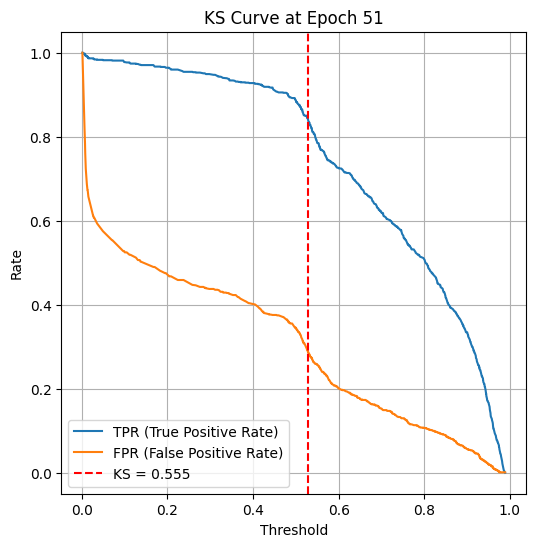

Epoch 050 — Train Loss: 0.4070 | Train Acc: 0.8076 | Val KS: 0.5546 | Val Acc: 0.7753 | Val Prec: 0.7365 | Val Recall: 0.8849 | Val F1: 0.8039
Epoch 060 — Train Loss: 0.3830 | Train Acc: 0.8213 | Val KS: 0.5639 | Val Acc: 0.7827 | Val Prec: 0.7424 | Val Recall: 0.8921 | Val F1: 0.8104
Epoch 070 — Train Loss: 0.3574 | Train Acc: 0.8301 | Val KS: 0.5782 | Val Acc: 0.7874 | Val Prec: 0.7373 | Val Recall: 0.9188 | Val F1: 0.8181


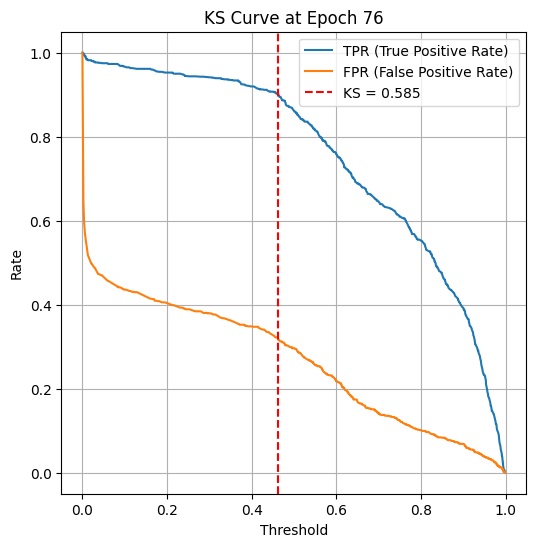

Epoch 080 — Train Loss: 0.3404 | Train Acc: 0.8435 | Val KS: 0.5846 | Val Acc: 0.7934 | Val Prec: 0.7507 | Val Recall: 0.9028 | Val F1: 0.8198
Epoch 090 — Train Loss: 0.3257 | Train Acc: 0.8456 | Val KS: 0.5893 | Val Acc: 0.7985 | Val Prec: 0.7531 | Val Recall: 0.9117 | Val F1: 0.8249


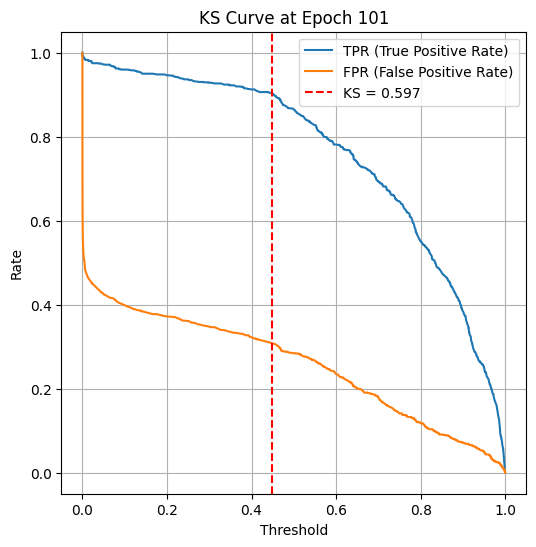

Epoch 100 — Train Loss: 0.3033 | Train Acc: 0.8603 | Val KS: 0.5967 | Val Acc: 0.7934 | Val Prec: 0.7674 | Val Recall: 0.8653 | Val F1: 0.8134
Epoch 110 — Train Loss: 0.3046 | Train Acc: 0.8596 | Val KS: 0.5953 | Val Acc: 0.7981 | Val Prec: 0.7606 | Val Recall: 0.8930 | Val F1: 0.8215
Epoch 120 — Train Loss: 0.2905 | Train Acc: 0.8703 | Val KS: 0.6064 | Val Acc: 0.7967 | Val Prec: 0.7670 | Val Recall: 0.8751 | Val F1: 0.8175


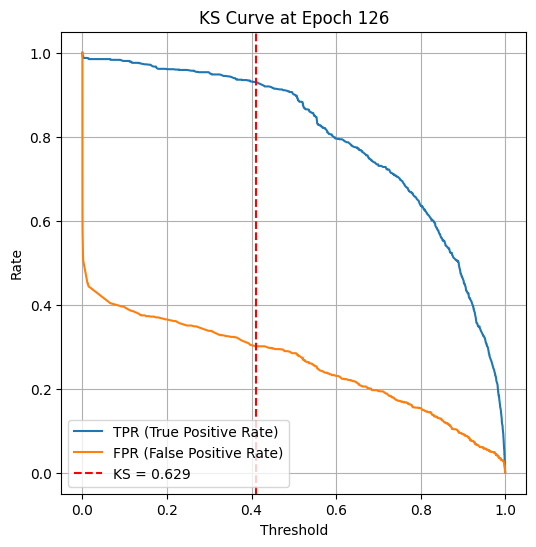

Epoch 130 — Train Loss: 0.2759 | Train Acc: 0.8726 | Val KS: 0.6124 | Val Acc: 0.8078 | Val Prec: 0.7701 | Val Recall: 0.8992 | Val F1: 0.8296
Epoch 140 — Train Loss: 0.2700 | Train Acc: 0.8756 | Val KS: 0.6186 | Val Acc: 0.8129 | Val Prec: 0.7647 | Val Recall: 0.9251 | Val F1: 0.8373


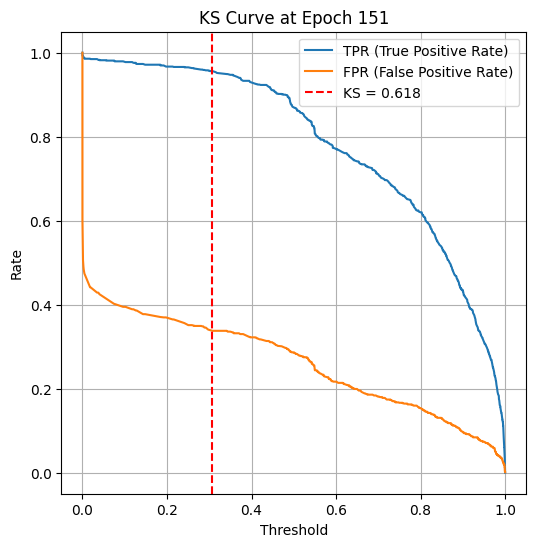

Epoch 150 — Train Loss: 0.2605 | Train Acc: 0.8813 | Val KS: 0.6184 | Val Acc: 0.7948 | Val Prec: 0.7671 | Val Recall: 0.8698 | Val F1: 0.8152
Epoch 160 — Train Loss: 0.2606 | Train Acc: 0.8794 | Val KS: 0.6276 | Val Acc: 0.8045 | Val Prec: 0.7756 | Val Recall: 0.8787 | Val F1: 0.8239
Epoch 170 — Train Loss: 0.2512 | Train Acc: 0.8853 | Val KS: 0.6343 | Val Acc: 0.8110 | Val Prec: 0.7793 | Val Recall: 0.8885 | Val F1: 0.8303


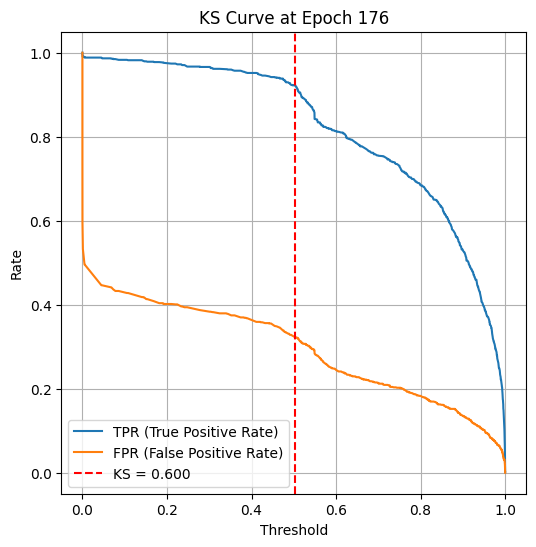

Epoch 180 — Train Loss: 0.2474 | Train Acc: 0.8844 | Val KS: 0.6314 | Val Acc: 0.8083 | Val Prec: 0.7770 | Val Recall: 0.8858 | Val F1: 0.8278
Epoch 190 — Train Loss: 0.2344 | Train Acc: 0.8909 | Val KS: 0.6258 | Val Acc: 0.8166 | Val Prec: 0.7733 | Val Recall: 0.9161 | Val F1: 0.8387


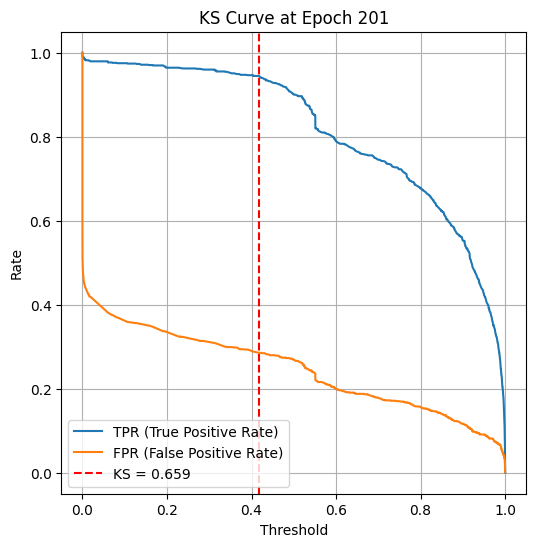

Epoch 200 — Train Loss: 0.2341 | Train Acc: 0.8915 | Val KS: 0.6591 | Val Acc: 0.8189 | Val Prec: 0.7840 | Val Recall: 0.9001 | Val F1: 0.8380
Epoch 210 — Train Loss: 0.2343 | Train Acc: 0.8928 | Val KS: 0.6433 | Val Acc: 0.8152 | Val Prec: 0.7813 | Val Recall: 0.8956 | Val F1: 0.8346
Epoch 220 — Train Loss: 0.2274 | Train Acc: 0.8959 | Val KS: 0.6385 | Val Acc: 0.8175 | Val Prec: 0.7817 | Val Recall: 0.9010 | Val F1: 0.8371


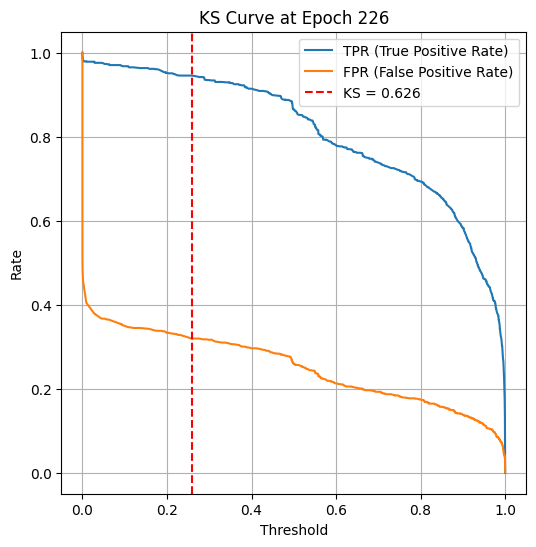

Epoch 230 — Train Loss: 0.2199 | Train Acc: 0.8985 | Val KS: 0.6393 | Val Acc: 0.8110 | Val Prec: 0.7802 | Val Recall: 0.8867 | Val F1: 0.8301
Epoch 240 — Train Loss: 0.2242 | Train Acc: 0.8965 | Val KS: 0.6395 | Val Acc: 0.8240 | Val Prec: 0.7728 | Val Recall: 0.9376 | Val F1: 0.8472


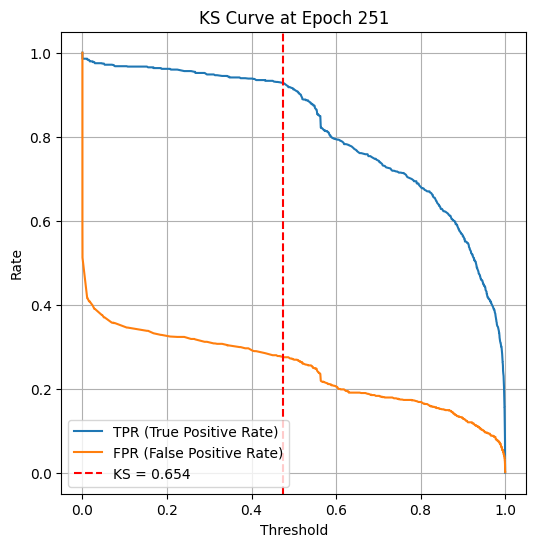

Epoch 250 — Train Loss: 0.2142 | Train Acc: 0.9011 | Val KS: 0.6537 | Val Acc: 0.8254 | Val Prec: 0.7863 | Val Recall: 0.9126 | Val F1: 0.8448
Epoch 260 — Train Loss: 0.2073 | Train Acc: 0.9061 | Val KS: 0.6381 | Val Acc: 0.8194 | Val Prec: 0.7731 | Val Recall: 0.9242 | Val F1: 0.8419
Epoch 270 — Train Loss: 0.2141 | Train Acc: 0.9068 | Val KS: 0.6619 | Val Acc: 0.8315 | Val Prec: 0.7841 | Val Recall: 0.9331 | Val F1: 0.8521


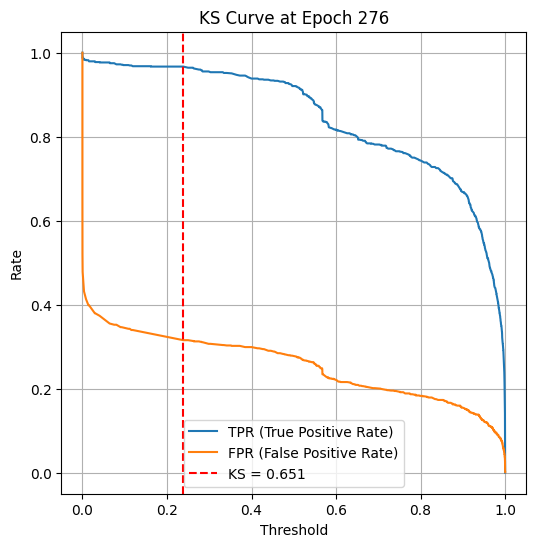

Epoch 280 — Train Loss: 0.2062 | Train Acc: 0.9031 | Val KS: 0.6637 | Val Acc: 0.8343 | Val Prec: 0.7834 | Val Recall: 0.9420 | Val F1: 0.8554
Epoch 290 — Train Loss: 0.2114 | Train Acc: 0.9027 | Val KS: 0.6514 | Val Acc: 0.8250 | Val Prec: 0.7780 | Val Recall: 0.9286 | Val F1: 0.8467


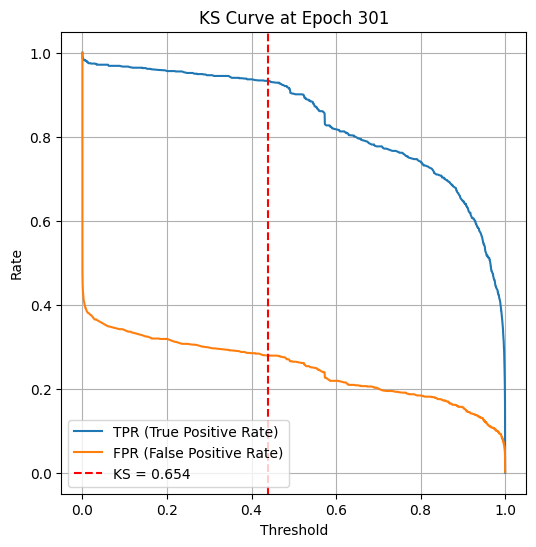

Epoch 300 — Train Loss: 0.2042 | Train Acc: 0.9051 | Val KS: 0.6543 | Val Acc: 0.8222 | Val Prec: 0.7874 | Val Recall: 0.9019 | Val F1: 0.8407
Epoch 310 — Train Loss: 0.2079 | Train Acc: 0.9042 | Val KS: 0.6386 | Val Acc: 0.8134 | Val Prec: 0.7802 | Val Recall: 0.8930 | Val F1: 0.8328
Epoch 320 — Train Loss: 0.2125 | Train Acc: 0.9024 | Val KS: 0.6535 | Val Acc: 0.8240 | Val Prec: 0.7823 | Val Recall: 0.9170 | Val F1: 0.8444


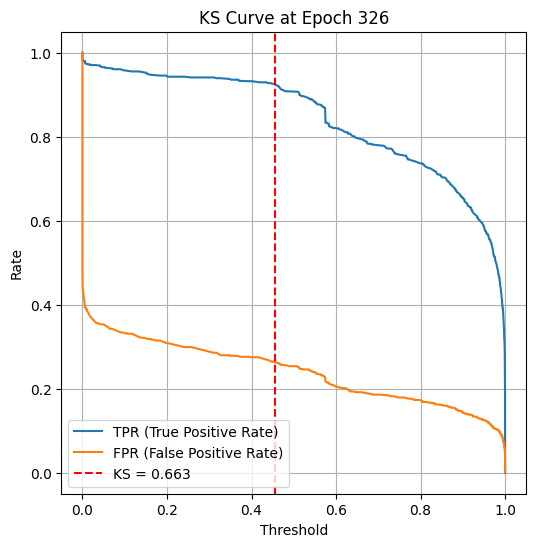

Epoch 330 — Train Loss: 0.1936 | Train Acc: 0.9121 | Val KS: 0.6561 | Val Acc: 0.8227 | Val Prec: 0.7827 | Val Recall: 0.9126 | Val F1: 0.8427
Epoch 340 — Train Loss: 0.2010 | Train Acc: 0.9095 | Val KS: 0.6573 | Val Acc: 0.8301 | Val Prec: 0.7836 | Val Recall: 0.9304 | Val F1: 0.8507


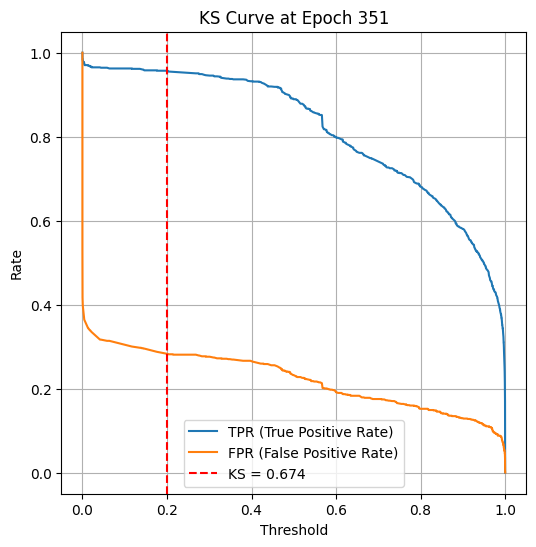

Epoch 350 — Train Loss: 0.1779 | Train Acc: 0.9158 | Val KS: 0.6735 | Val Acc: 0.8310 | Val Prec: 0.8060 | Val Recall: 0.8894 | Val F1: 0.8456
Epoch 360 — Train Loss: 0.1852 | Train Acc: 0.9132 | Val KS: 0.6664 | Val Acc: 0.8352 | Val Prec: 0.7871 | Val Recall: 0.9367 | Val F1: 0.8554
Epoch 370 — Train Loss: 0.1825 | Train Acc: 0.9186 | Val KS: 0.6602 | Val Acc: 0.8292 | Val Prec: 0.7885 | Val Recall: 0.9179 | Val F1: 0.8483


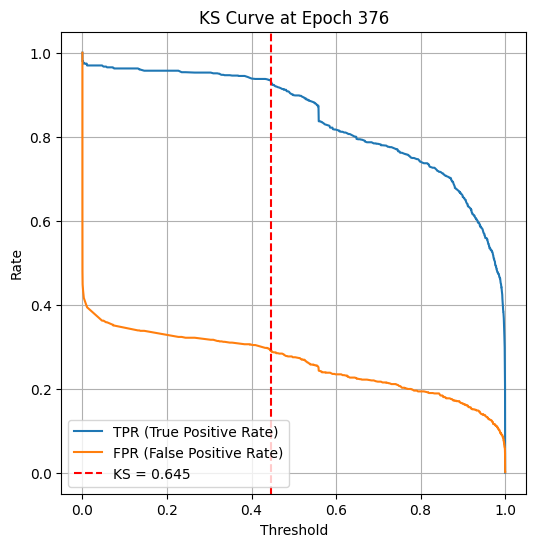

Epoch 380 — Train Loss: 0.1916 | Train Acc: 0.9121 | Val KS: 0.6548 | Val Acc: 0.8250 | Val Prec: 0.7862 | Val Recall: 0.9117 | Val F1: 0.8443
Epoch 390 — Train Loss: 0.1877 | Train Acc: 0.9106 | Val KS: 0.6658 | Val Acc: 0.8315 | Val Prec: 0.7854 | Val Recall: 0.9304 | Val F1: 0.8518


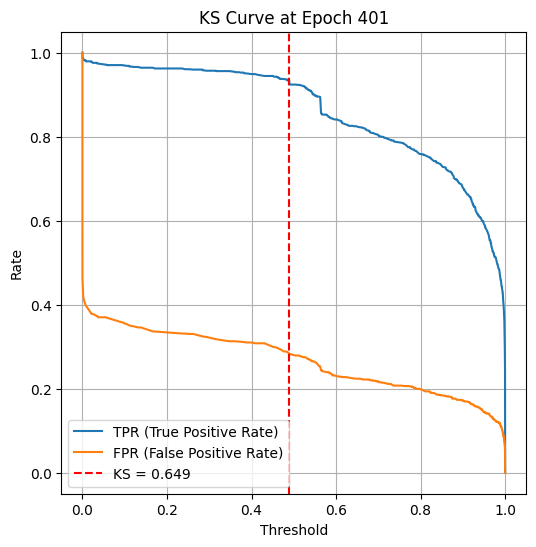

Epoch 400 — Train Loss: 0.1807 | Train Acc: 0.9127 | Val KS: 0.6495 | Val Acc: 0.8259 | Val Prec: 0.7813 | Val Recall: 0.9242 | Val F1: 0.8468
Epoch 410 — Train Loss: 0.1746 | Train Acc: 0.9180 | Val KS: 0.6701 | Val Acc: 0.8301 | Val Prec: 0.7956 | Val Recall: 0.9063 | Val F1: 0.8474
Epoch 420 — Train Loss: 0.1777 | Train Acc: 0.9160 | Val KS: 0.6680 | Val Acc: 0.8301 | Val Prec: 0.7942 | Val Recall: 0.9090 | Val F1: 0.8478


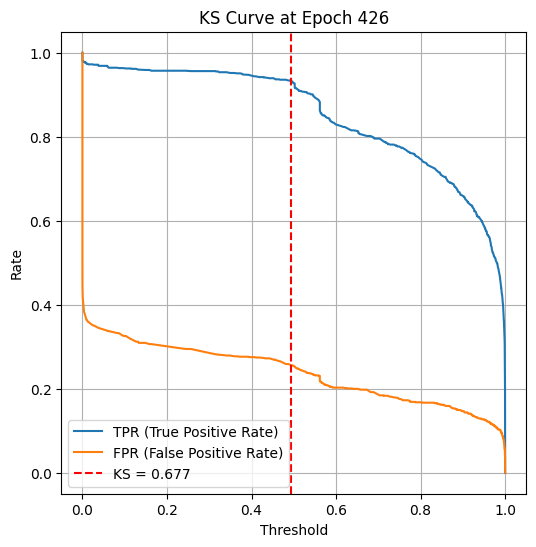

Epoch 430 — Train Loss: 0.1732 | Train Acc: 0.9211 | Val KS: 0.6860 | Val Acc: 0.8417 | Val Prec: 0.8000 | Val Recall: 0.9277 | Val F1: 0.8591
Epoch 440 — Train Loss: 0.1704 | Train Acc: 0.9200 | Val KS: 0.6528 | Val Acc: 0.8292 | Val Prec: 0.7808 | Val Recall: 0.9340 | Val F1: 0.8505


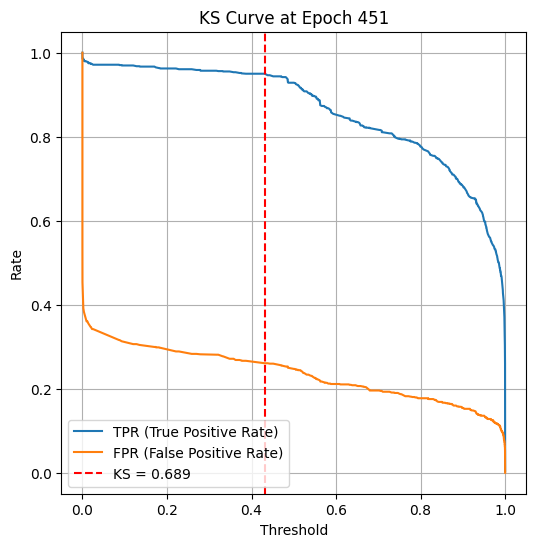

Epoch 450 — Train Loss: 0.1751 | Train Acc: 0.9201 | Val KS: 0.6887 | Val Acc: 0.8440 | Val Prec: 0.8026 | Val Recall: 0.9286 | Val F1: 0.8610
Epoch 460 — Train Loss: 0.1757 | Train Acc: 0.9186 | Val KS: 0.6589 | Val Acc: 0.8329 | Val Prec: 0.7812 | Val Recall: 0.9429 | Val F1: 0.8545
Epoch 470 — Train Loss: 0.1712 | Train Acc: 0.9242 | Val KS: 0.6841 | Val Acc: 0.8389 | Val Prec: 0.8076 | Val Recall: 0.9063 | Val F1: 0.8541


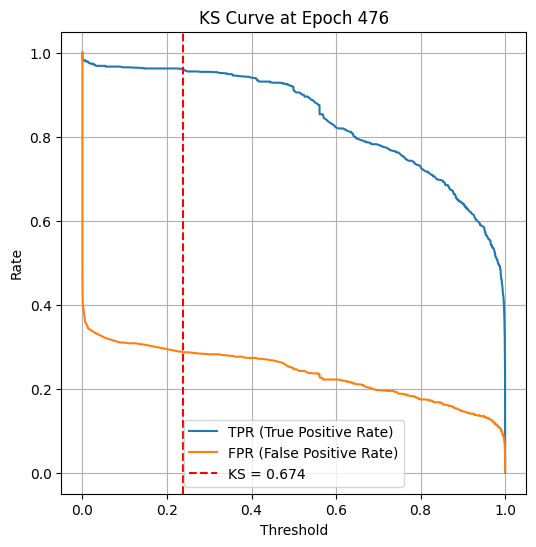

Epoch 480 — Train Loss: 0.1749 | Train Acc: 0.9197 | Val KS: 0.6652 | Val Acc: 0.8315 | Val Prec: 0.7880 | Val Recall: 0.9251 | Val F1: 0.8510
Epoch 490 — Train Loss: 0.1701 | Train Acc: 0.9206 | Val KS: 0.6777 | Val Acc: 0.8305 | Val Prec: 0.7967 | Val Recall: 0.9054 | Val F1: 0.8476


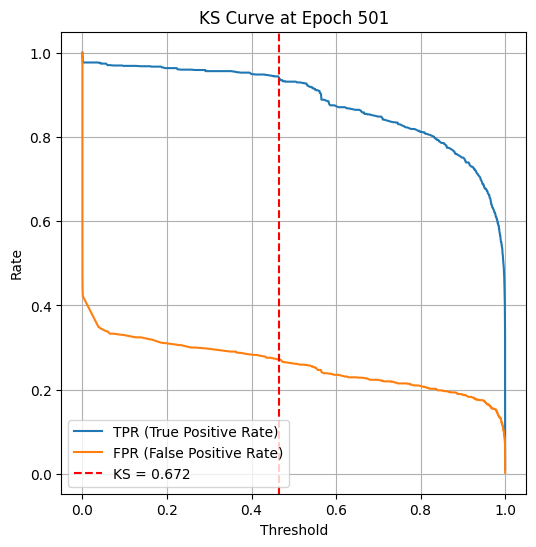

Epoch 500 — Train Loss: 0.1676 | Train Acc: 0.9222 | Val KS: 0.6719 | Val Acc: 0.8389 | Val Prec: 0.7945 | Val Recall: 0.9313 | Val F1: 0.8575
Epoch 510 — Train Loss: 0.1672 | Train Acc: 0.9232 | Val KS: 0.6885 | Val Acc: 0.8440 | Val Prec: 0.8045 | Val Recall: 0.9251 | Val F1: 0.8606
Epoch 520 — Train Loss: 0.1750 | Train Acc: 0.9229 | Val KS: 0.6993 | Val Acc: 0.8445 | Val Prec: 0.8109 | Val Recall: 0.9144 | Val F1: 0.8595


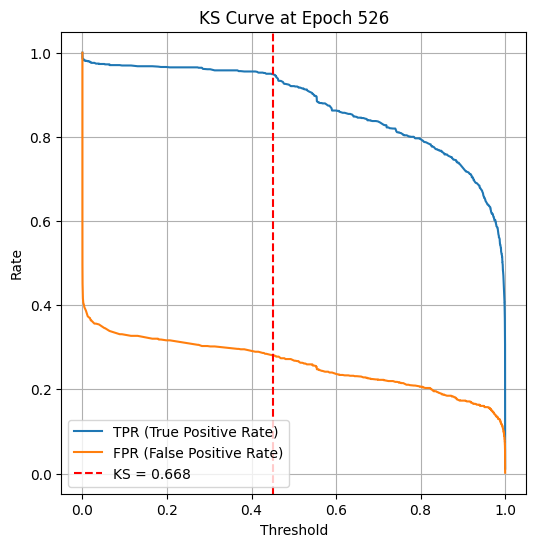

Epoch 530 — Train Loss: 0.1591 | Train Acc: 0.9245 | Val KS: 0.6829 | Val Acc: 0.8426 | Val Prec: 0.7998 | Val Recall: 0.9304 | Val F1: 0.8602
Epoch 540 — Train Loss: 0.1624 | Train Acc: 0.9259 | Val KS: 0.6797 | Val Acc: 0.8422 | Val Prec: 0.7974 | Val Recall: 0.9340 | Val F1: 0.8603


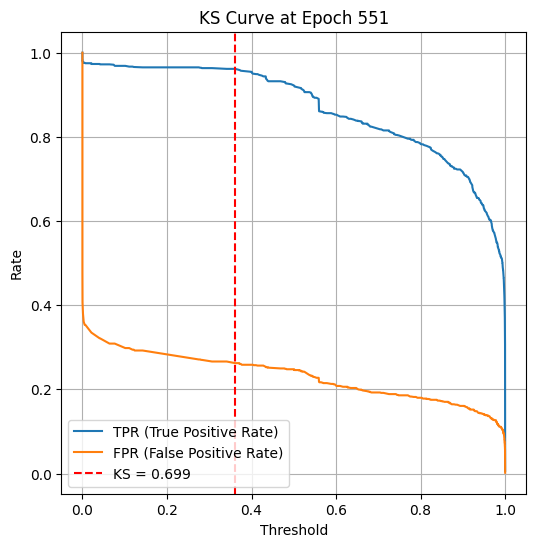

Epoch 550 — Train Loss: 0.1549 | Train Acc: 0.9253 | Val KS: 0.6993 | Val Acc: 0.8412 | Val Prec: 0.8022 | Val Recall: 0.9224 | Val F1: 0.8581
Epoch 560 — Train Loss: 0.1553 | Train Acc: 0.9282 | Val KS: 0.6866 | Val Acc: 0.8343 | Val Prec: 0.8041 | Val Recall: 0.9010 | Val F1: 0.8498
Epoch 570 — Train Loss: 0.1596 | Train Acc: 0.9271 | Val KS: 0.6754 | Val Acc: 0.8282 | Val Prec: 0.7913 | Val Recall: 0.9099 | Val F1: 0.8465


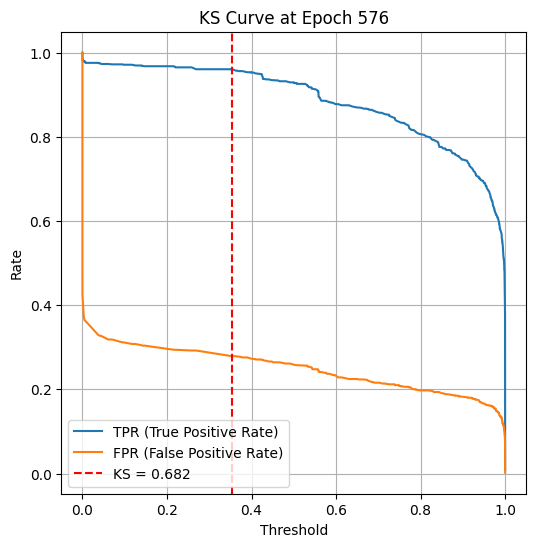

Epoch 580 — Train Loss: 0.1581 | Train Acc: 0.9265 | Val KS: 0.6923 | Val Acc: 0.8445 | Val Prec: 0.8056 | Val Recall: 0.9242 | Val F1: 0.8608
Epoch 590 — Train Loss: 0.1587 | Train Acc: 0.9274 | Val KS: 0.6772 | Val Acc: 0.8361 | Val Prec: 0.7986 | Val Recall: 0.9161 | Val F1: 0.8533


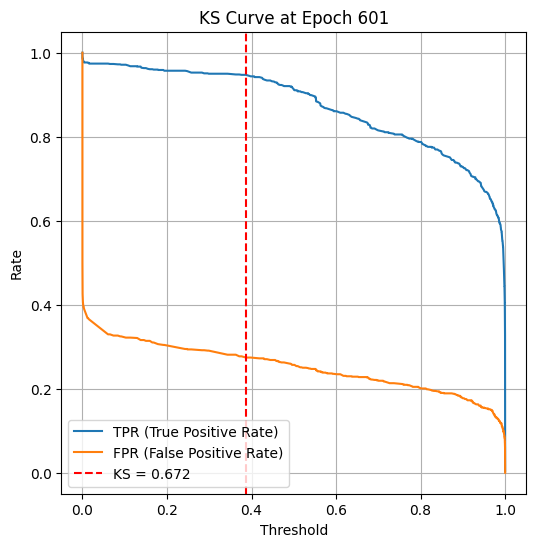

Epoch 600 — Train Loss: 0.1607 | Train Acc: 0.9279 | Val KS: 0.6724 | Val Acc: 0.8305 | Val Prec: 0.7935 | Val Recall: 0.9117 | Val F1: 0.8485
Epoch 610 — Train Loss: 0.1491 | Train Acc: 0.9322 | Val KS: 0.6896 | Val Acc: 0.8408 | Val Prec: 0.8039 | Val Recall: 0.9179 | Val F1: 0.8571
Epoch 620 — Train Loss: 0.1451 | Train Acc: 0.9333 | Val KS: 0.6946 | Val Acc: 0.8431 | Val Prec: 0.8085 | Val Recall: 0.9153 | Val F1: 0.8586


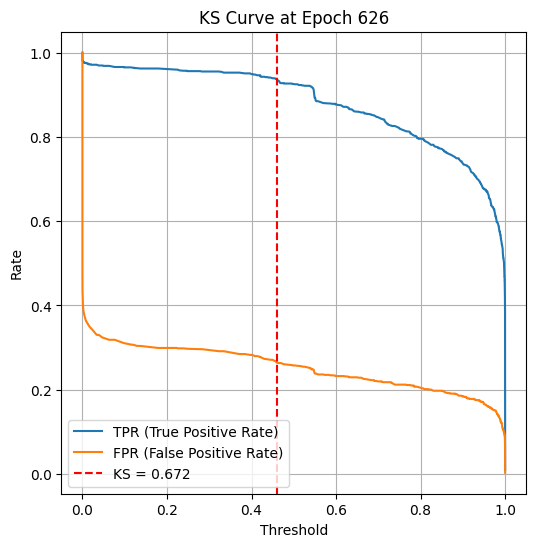

Epoch 630 — Train Loss: 0.1501 | Train Acc: 0.9338 | Val KS: 0.6882 | Val Acc: 0.8426 | Val Prec: 0.8022 | Val Recall: 0.9260 | Val F1: 0.8596
Epoch 640 — Train Loss: 0.1536 | Train Acc: 0.9290 | Val KS: 0.6812 | Val Acc: 0.8417 | Val Prec: 0.7995 | Val Recall: 0.9286 | Val F1: 0.8593


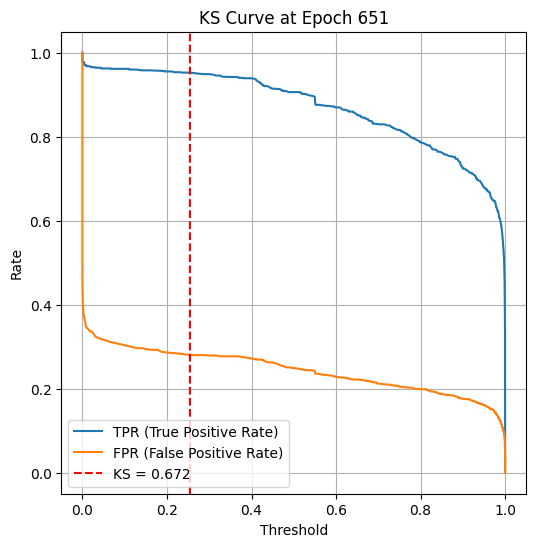

Epoch 650 — Train Loss: 0.1599 | Train Acc: 0.9294 | Val KS: 0.6720 | Val Acc: 0.8319 | Val Prec: 0.7981 | Val Recall: 0.9063 | Val F1: 0.8488
Epoch 660 — Train Loss: 0.1493 | Train Acc: 0.9333 | Val KS: 0.6789 | Val Acc: 0.8384 | Val Prec: 0.8003 | Val Recall: 0.9188 | Val F1: 0.8555
Epoch 670 — Train Loss: 0.1513 | Train Acc: 0.9339 | Val KS: 0.6627 | Val Acc: 0.8343 | Val Prec: 0.7872 | Val Recall: 0.9340 | Val F1: 0.8543


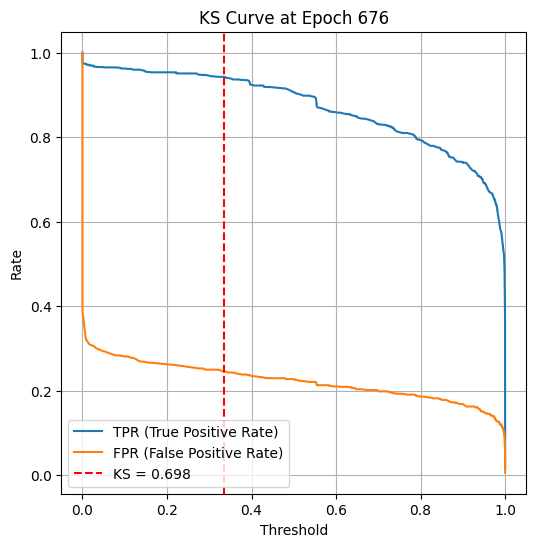

Epoch 680 — Train Loss: 0.1448 | Train Acc: 0.9324 | Val KS: 0.6730 | Val Acc: 0.8384 | Val Prec: 0.7921 | Val Recall: 0.9349 | Val F1: 0.8576
Epoch 690 — Train Loss: 0.1396 | Train Acc: 0.9379 | Val KS: 0.6952 | Val Acc: 0.8417 | Val Prec: 0.8155 | Val Recall: 0.8992 | Val F1: 0.8553


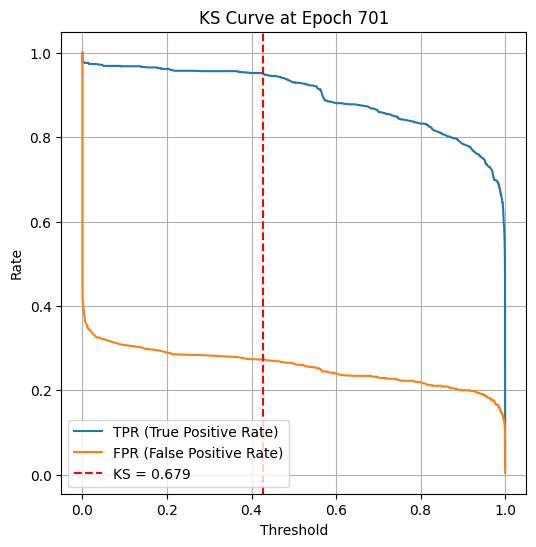

Epoch 700 — Train Loss: 0.1525 | Train Acc: 0.9352 | Val KS: 0.6788 | Val Acc: 0.8375 | Val Prec: 0.7936 | Val Recall: 0.9295 | Val F1: 0.8562
Epoch 710 — Train Loss: 0.1449 | Train Acc: 0.9345 | Val KS: 0.6911 | Val Acc: 0.8412 | Val Prec: 0.8060 | Val Recall: 0.9153 | Val F1: 0.8571
Epoch 720 — Train Loss: 0.1444 | Train Acc: 0.9347 | Val KS: 0.6865 | Val Acc: 0.8403 | Val Prec: 0.8000 | Val Recall: 0.9242 | Val F1: 0.8576


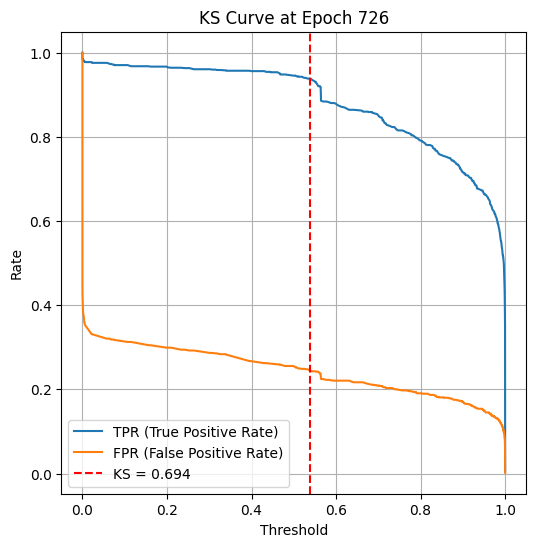

Epoch 730 — Train Loss: 0.1373 | Train Acc: 0.9376 | Val KS: 0.6960 | Val Acc: 0.8459 | Val Prec: 0.8061 | Val Recall: 0.9269 | Val F1: 0.8622
Epoch 740 — Train Loss: 0.1405 | Train Acc: 0.9367 | Val KS: 0.6735 | Val Acc: 0.8370 | Val Prec: 0.7921 | Val Recall: 0.9313 | Val F1: 0.8561


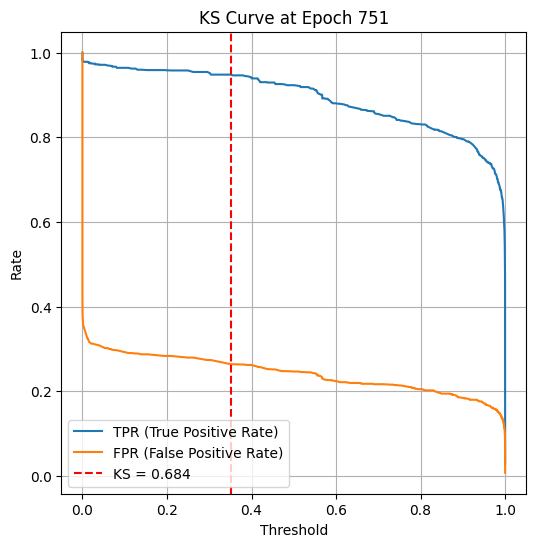

Epoch 750 — Train Loss: 0.1384 | Train Acc: 0.9396 | Val KS: 0.6840 | Val Acc: 0.8417 | Val Prec: 0.8023 | Val Recall: 0.9233 | Val F1: 0.8586
Epoch 760 — Train Loss: 0.1397 | Train Acc: 0.9375 | Val KS: 0.6850 | Val Acc: 0.8375 | Val Prec: 0.8062 | Val Recall: 0.9054 | Val F1: 0.8529
Epoch 770 — Train Loss: 0.1341 | Train Acc: 0.9407 | Val KS: 0.6748 | Val Acc: 0.8384 | Val Prec: 0.7908 | Val Recall: 0.9376 | Val F1: 0.8580


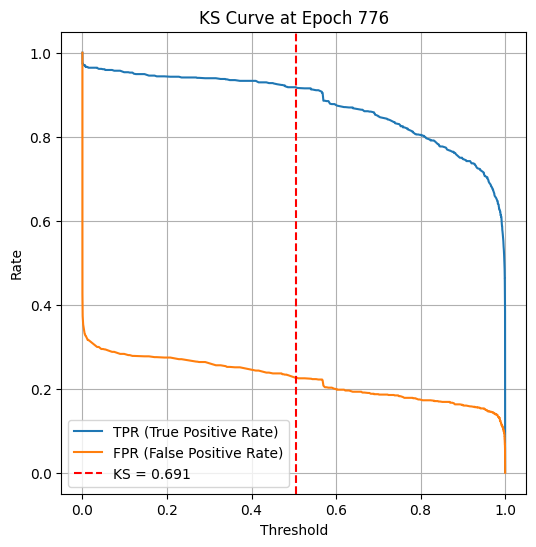

Epoch 780 — Train Loss: 0.1296 | Train Acc: 0.9426 | Val KS: 0.6941 | Val Acc: 0.8496 | Val Prec: 0.8101 | Val Recall: 0.9286 | Val F1: 0.8653
Epoch 790 — Train Loss: 0.1304 | Train Acc: 0.9423 | Val KS: 0.6854 | Val Acc: 0.8440 | Val Prec: 0.8008 | Val Recall: 0.9322 | Val F1: 0.8615


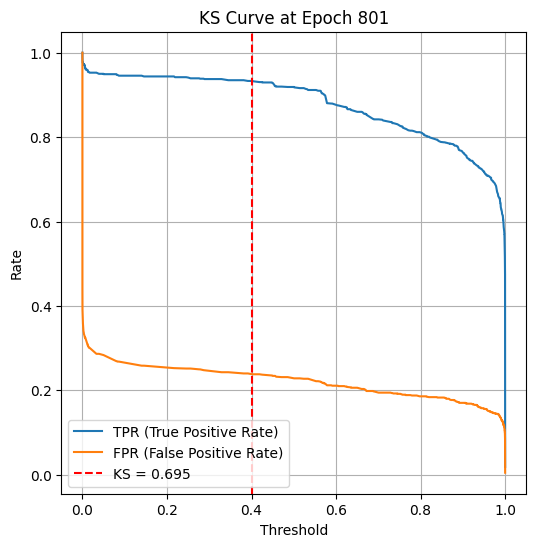

Epoch 800 — Train Loss: 0.1289 | Train Acc: 0.9437 | Val KS: 0.6950 | Val Acc: 0.8482 | Val Prec: 0.8136 | Val Recall: 0.9188 | Val F1: 0.8630
Epoch 810 — Train Loss: 0.1319 | Train Acc: 0.9401 | Val KS: 0.6918 | Val Acc: 0.8463 | Val Prec: 0.8076 | Val Recall: 0.9251 | Val F1: 0.8624
Epoch 820 — Train Loss: 0.1275 | Train Acc: 0.9395 | Val KS: 0.6827 | Val Acc: 0.8398 | Val Prec: 0.8046 | Val Recall: 0.9144 | Val F1: 0.8559


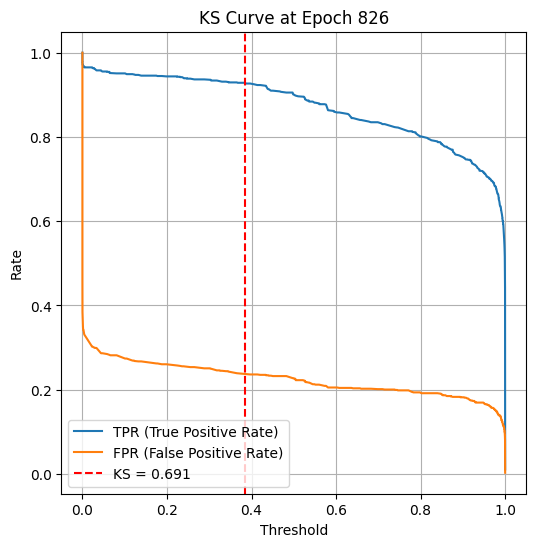

Epoch 830 — Train Loss: 0.1277 | Train Acc: 0.9448 | Val KS: 0.6830 | Val Acc: 0.8449 | Val Prec: 0.8006 | Val Recall: 0.9349 | Val F1: 0.8626
Epoch 840 — Train Loss: 0.1230 | Train Acc: 0.9446 | Val KS: 0.6837 | Val Acc: 0.8431 | Val Prec: 0.8014 | Val Recall: 0.9286 | Val F1: 0.8603


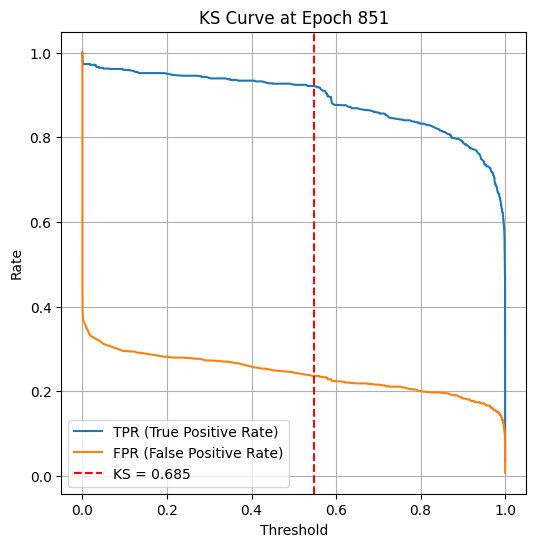

Epoch 850 — Train Loss: 0.1274 | Train Acc: 0.9449 | Val KS: 0.6853 | Val Acc: 0.8435 | Val Prec: 0.8043 | Val Recall: 0.9242 | Val F1: 0.8601
Epoch 860 — Train Loss: 0.1322 | Train Acc: 0.9406 | Val KS: 0.7034 | Val Acc: 0.8533 | Val Prec: 0.8123 | Val Recall: 0.9340 | Val F1: 0.8689
Epoch 870 — Train Loss: 0.1209 | Train Acc: 0.9452 | Val KS: 0.6883 | Val Acc: 0.8412 | Val Prec: 0.8055 | Val Recall: 0.9161 | Val F1: 0.8573


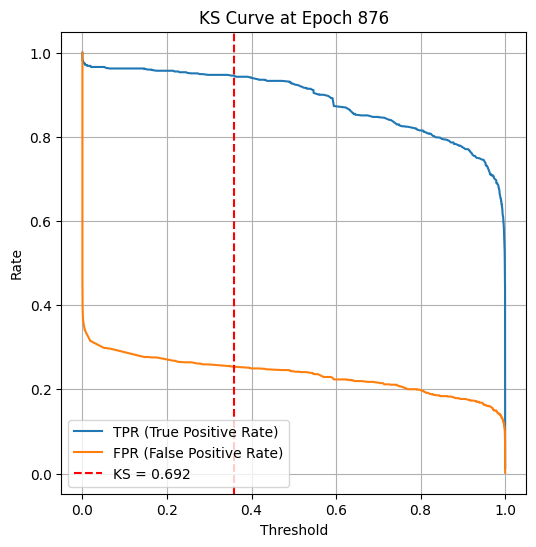

Epoch 880 — Train Loss: 0.1230 | Train Acc: 0.9448 | Val KS: 0.6924 | Val Acc: 0.8445 | Val Prec: 0.8085 | Val Recall: 0.9188 | Val F1: 0.8601
Epoch 890 — Train Loss: 0.1201 | Train Acc: 0.9438 | Val KS: 0.7037 | Val Acc: 0.8533 | Val Prec: 0.8094 | Val Recall: 0.9393 | Val F1: 0.8695


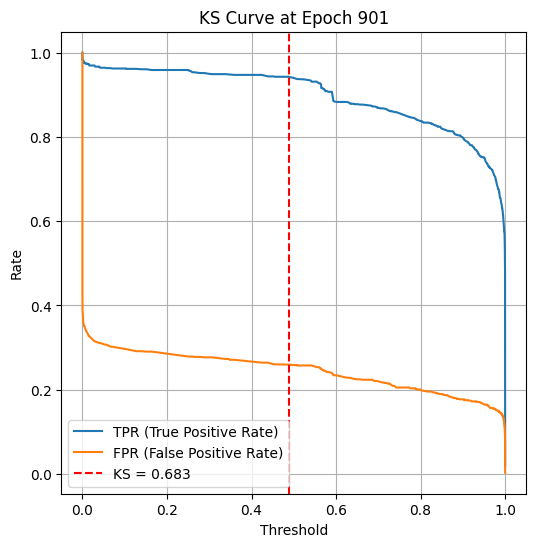

Epoch 900 — Train Loss: 0.1206 | Train Acc: 0.9460 | Val KS: 0.6835 | Val Acc: 0.8445 | Val Prec: 0.7977 | Val Recall: 0.9393 | Val F1: 0.8628
Epoch 910 — Train Loss: 0.1235 | Train Acc: 0.9420 | Val KS: 0.6840 | Val Acc: 0.8431 | Val Prec: 0.8042 | Val Recall: 0.9233 | Val F1: 0.8596
Epoch 920 — Train Loss: 0.1177 | Train Acc: 0.9449 | Val KS: 0.6885 | Val Acc: 0.8482 | Val Prec: 0.7967 | Val Recall: 0.9509 | Val F1: 0.8670


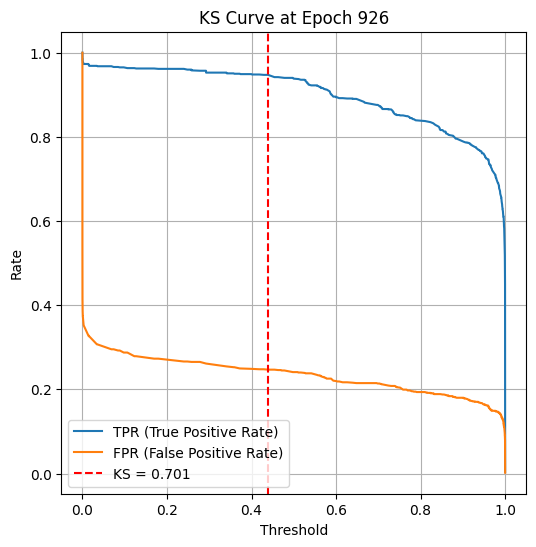

Epoch 930 — Train Loss: 0.1285 | Train Acc: 0.9427 | Val KS: 0.6760 | Val Acc: 0.8370 | Val Prec: 0.8036 | Val Recall: 0.9090 | Val F1: 0.8531
Epoch 940 — Train Loss: 0.1147 | Train Acc: 0.9489 | Val KS: 0.6853 | Val Acc: 0.8431 | Val Prec: 0.8009 | Val Recall: 0.9295 | Val F1: 0.8604


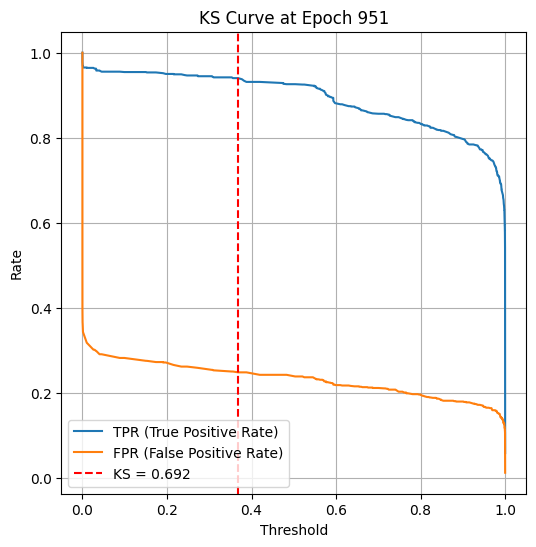

Epoch 950 — Train Loss: 0.1153 | Train Acc: 0.9485 | Val KS: 0.6924 | Val Acc: 0.8468 | Val Prec: 0.8078 | Val Recall: 0.9260 | Val F1: 0.8628
Epoch 960 — Train Loss: 0.1202 | Train Acc: 0.9499 | Val KS: 0.7086 | Val Acc: 0.8482 | Val Prec: 0.8141 | Val Recall: 0.9179 | Val F1: 0.8629
Epoch 970 — Train Loss: 0.1264 | Train Acc: 0.9444 | Val KS: 0.6956 | Val Acc: 0.8459 | Val Prec: 0.8143 | Val Recall: 0.9117 | Val F1: 0.8603


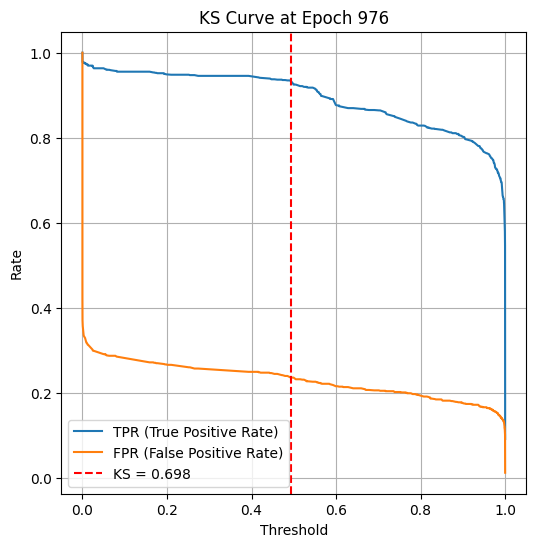

Epoch 980 — Train Loss: 0.1151 | Train Acc: 0.9499 | Val KS: 0.7062 | Val Acc: 0.8538 | Val Prec: 0.8086 | Val Recall: 0.9420 | Val F1: 0.8702
Epoch 990 — Train Loss: 0.1202 | Train Acc: 0.9494 | Val KS: 0.6884 | Val Acc: 0.8445 | Val Prec: 0.7959 | Val Recall: 0.9429 | Val F1: 0.8632
Epoch 999 — Train Loss: 0.1194 | Train Acc: 0.9468 | Val KS: 0.6902 | Val Acc: 0.8426 | Val Prec: 0.8069 | Val Recall: 0.9170 | Val F1: 0.8585


In [ ]:

# Model
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = STABTransformer(input_dim=X_train_tensor.shape[1], n_heads=16, n_layers=1, dropout=0.3).to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)
loss_fn = nn.BCELoss()


epochs=1000
for epoch in range(epochs):
    model.train()
    epoch_loss = 0

    all_preds = []
    all_targets = []

    for xb, yb in train_loader:
        xb, yb = xb.to(device), yb.to(device)

        pred = model(xb).squeeze()
        loss = loss_fn(pred, yb)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        epoch_loss += loss.item()

        preds_np = (pred > 0.5).detach().cpu().numpy()
        targets_np = yb.detach().cpu().numpy()

        all_preds.extend(preds_np)
        all_targets.extend(targets_np)

    # Training metrics
    acc = accuracy_score(all_targets, all_preds)
    prec = precision_score(all_targets, all_preds)
    rec = recall_score(all_targets, all_preds)
    f1 = f1_score(all_targets, all_preds)

    # Validation metrics
    ks_val, acc_val, prec_val, rec_val, f1_val = evaluate_validation(model, val_loader, device, epoch)

    if epoch % 10 == 0 or epoch == epochs - 1:
        print(f"Epoch {epoch:03d} — Train Loss: {epoch_loss/len(train_loader):.4f} | "
              f"Train Acc: {acc:.4f} | Val KS: {ks_val:.4f} | Val Acc: {acc_val:.4f} | "
              f"Val Prec: {prec_val:.4f} | Val Recall: {rec_val:.4f} | Val F1: {f1_val:.4f}")


In [ ]:

torch.save(model.state_dict(), 'stab_transformer_16head_1layer_0.1droput_1000epochs.pt')
files.download('stab_transformer_16head_1layer_0.1droput_1000epochs.pt')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

✅ Accuracy: 0.8445
✅ Precision: 0.8090
✅ Recall: 0.9179
✅ F1 Score: 0.8600


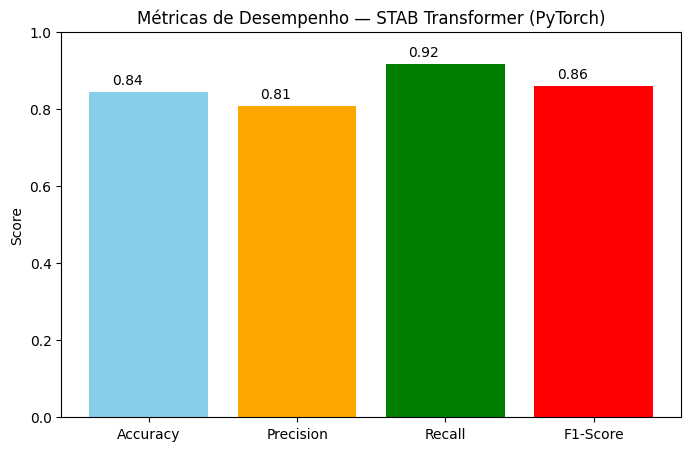

In [ ]:
model.eval()
X_test_tensor = torch.tensor(X_test_nn, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test_nn.values, dtype=torch.float32)  # <-- Aqui está o fix

with torch.no_grad():
    y_pred_prob = model(X_test_tensor.to(device)).cpu().squeeze().numpy()
    y_pred = (y_pred_prob >= 0.5).astype(int)

acc = accuracy_score(y_test_nn, y_pred)
prec = precision_score(y_test_nn, y_pred)
rec = recall_score(y_test_nn, y_pred)
f1 = f1_score(y_test_nn, y_pred)

print(f"✅ Accuracy: {acc:.4f}")
print(f"✅ Precision: {prec:.4f}")
print(f"✅ Recall: {rec:.4f}")
print(f"✅ F1 Score: {f1:.4f}")

metrics_names = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
metrics_values = [acc, prec, rec, f1]

plt.figure(figsize=(8, 5))
bars = plt.bar(metrics_names, metrics_values, color=['skyblue', 'orange', 'green', 'red'])
plt.ylim(0, 1)
plt.title('Métricas de Desempenho — STAB Transformer (PyTorch)')
plt.ylabel('Score')
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + 0.15, yval + 0.02, f'{yval:.2f}')
plt.show()



✅ Accuracy: 0.4986
✅ Precision: 0.5154
✅ Recall: 0.6102
✅ F1 Score: 0.5588


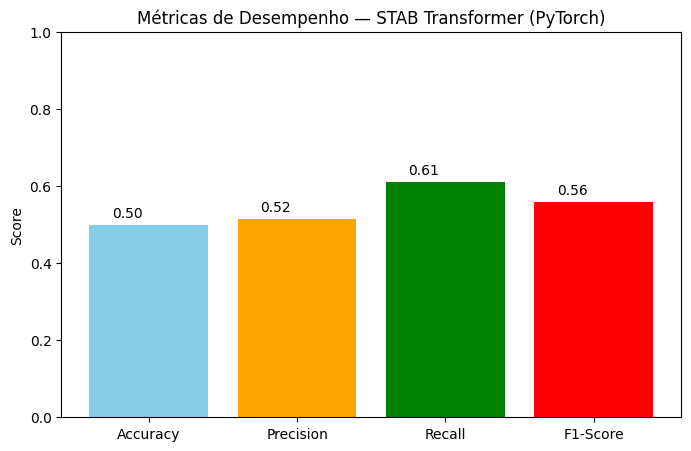

In [ ]:
model.eval()
X_test_tensor = torch.tensor(X_val_nn, dtype=torch.float32)
y_test_tensor = torch.tensor(y_val_nn.values, dtype=torch.float32)  # <-- Aqui está o fix

with torch.no_grad():
    y_pred_prob = model(X_test_tensor.to(device)).cpu().squeeze().numpy()
    y_pred = (y_pred_prob >= 0.5).astype(int)

acc = accuracy_score(y_test_nn, y_pred)
prec = precision_score(y_test_nn, y_pred)
rec = recall_score(y_test_nn, y_pred)
f1 = f1_score(y_test_nn, y_pred)

print(f"✅ Accuracy: {acc:.4f}")
print(f"✅ Precision: {prec:.4f}")
print(f"✅ Recall: {rec:.4f}")
print(f"✅ F1 Score: {f1:.4f}")

metrics_names = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
metrics_values = [acc, prec, rec, f1]

plt.figure(figsize=(8, 5))
bars = plt.bar(metrics_names, metrics_values, color=['skyblue', 'orange', 'green', 'red'])
plt.ylim(0, 1)
plt.title('Métricas de Desempenho — STAB Transformer (PyTorch)')
plt.ylabel('Score')
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + 0.15, yval + 0.02, f'{yval:.2f}')
plt.show()



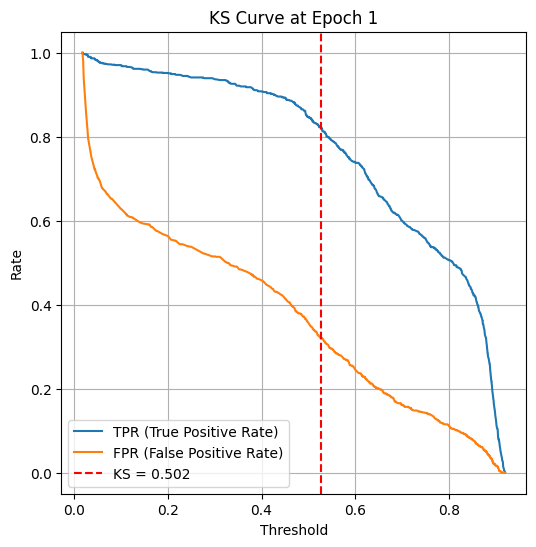

Epoch 000 — Train Loss: 0.5156 | Train Acc: 0.7498 | Val KS: 0.5021 | Val Acc: 0.7498 | Val Prec: 0.7208 | Val Recall: 0.8475 | Val F1: 0.7790
Epoch 010 — Train Loss: 0.4788 | Train Acc: 0.7751 | Val KS: 0.5154 | Val Acc: 0.7572 | Val Prec: 0.7521 | Val Recall: 0.7957 | Val F1: 0.7733
Epoch 020 — Train Loss: 0.4698 | Train Acc: 0.7779 | Val KS: 0.5155 | Val Acc: 0.7558 | Val Prec: 0.7393 | Val Recall: 0.8198 | Val F1: 0.7775


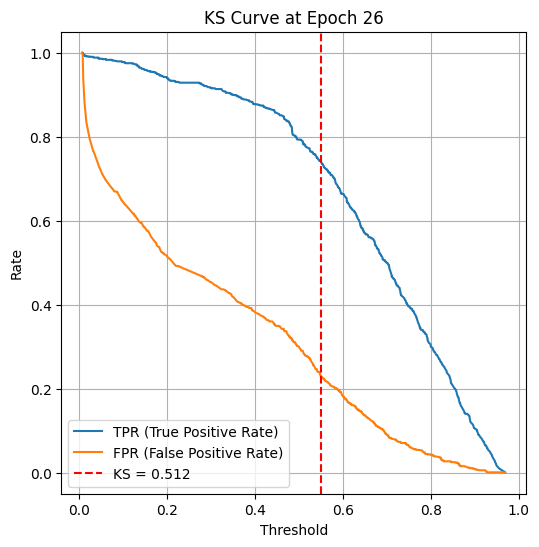

Epoch 030 — Train Loss: 0.4594 | Train Acc: 0.7810 | Val KS: 0.5144 | Val Acc: 0.7502 | Val Prec: 0.7334 | Val Recall: 0.8171 | Val F1: 0.7730
Epoch 040 — Train Loss: 0.4476 | Train Acc: 0.7869 | Val KS: 0.5341 | Val Acc: 0.7530 | Val Prec: 0.7637 | Val Recall: 0.7609 | Val F1: 0.7623


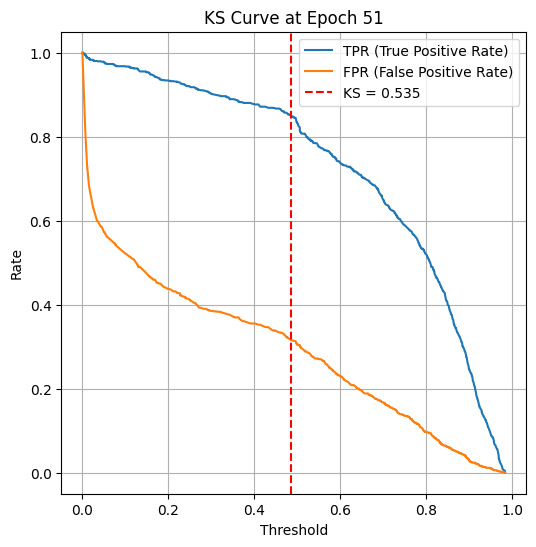

Epoch 050 — Train Loss: 0.4243 | Train Acc: 0.8010 | Val KS: 0.5345 | Val Acc: 0.7669 | Val Prec: 0.7478 | Val Recall: 0.8332 | Val F1: 0.7882
Epoch 060 — Train Loss: 0.4034 | Train Acc: 0.8114 | Val KS: 0.5475 | Val Acc: 0.7744 | Val Prec: 0.7309 | Val Recall: 0.8965 | Val F1: 0.8053
Epoch 070 — Train Loss: 0.3785 | Train Acc: 0.8194 | Val KS: 0.5657 | Val Acc: 0.7846 | Val Prec: 0.7428 | Val Recall: 0.8965 | Val F1: 0.8124


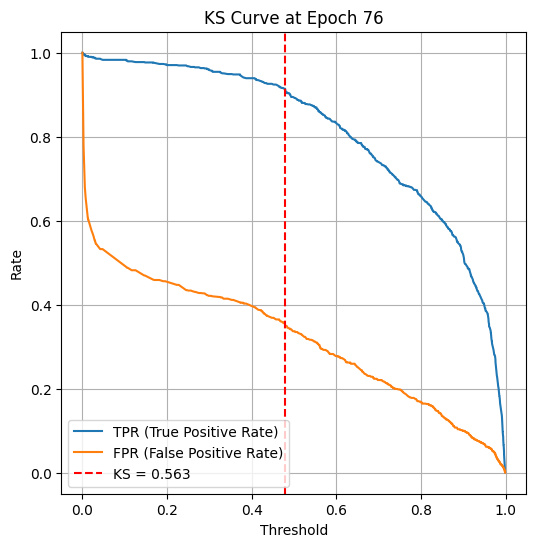

Epoch 080 — Train Loss: 0.3643 | Train Acc: 0.8327 | Val KS: 0.5619 | Val Acc: 0.7813 | Val Prec: 0.7386 | Val Recall: 0.8974 | Val F1: 0.8103
Epoch 090 — Train Loss: 0.3462 | Train Acc: 0.8401 | Val KS: 0.5833 | Val Acc: 0.7948 | Val Prec: 0.7610 | Val Recall: 0.8831 | Val F1: 0.8175


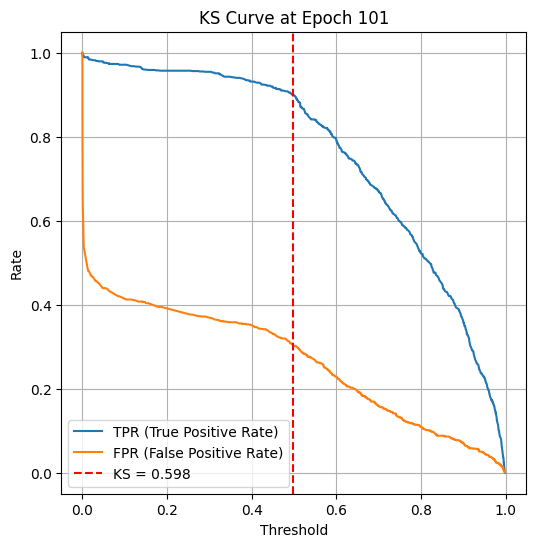

Epoch 100 — Train Loss: 0.3309 | Train Acc: 0.8462 | Val KS: 0.5981 | Val Acc: 0.8022 | Val Prec: 0.7635 | Val Recall: 0.8983 | Val F1: 0.8254
Epoch 110 — Train Loss: 0.3225 | Train Acc: 0.8538 | Val KS: 0.5956 | Val Acc: 0.8032 | Val Prec: 0.7463 | Val Recall: 0.9420 | Val F1: 0.8328
Epoch 120 — Train Loss: 0.3114 | Train Acc: 0.8589 | Val KS: 0.5974 | Val Acc: 0.7994 | Val Prec: 0.7539 | Val Recall: 0.9126 | Val F1: 0.8257


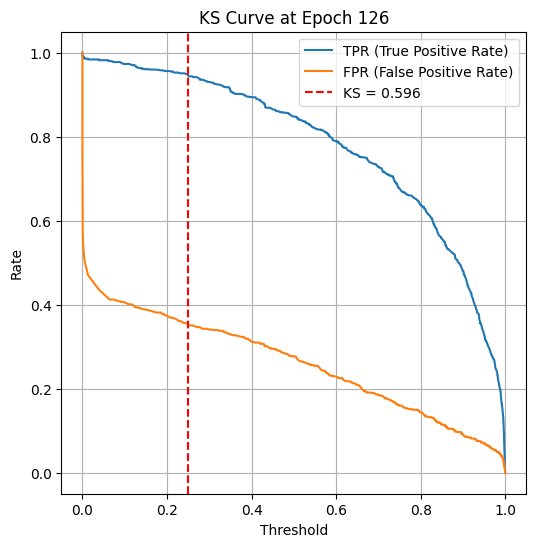

Epoch 130 — Train Loss: 0.3073 | Train Acc: 0.8646 | Val KS: 0.5964 | Val Acc: 0.7925 | Val Prec: 0.7637 | Val Recall: 0.8707 | Val F1: 0.8137
Epoch 140 — Train Loss: 0.2875 | Train Acc: 0.8669 | Val KS: 0.6004 | Val Acc: 0.7906 | Val Prec: 0.7557 | Val Recall: 0.8831 | Val F1: 0.8145


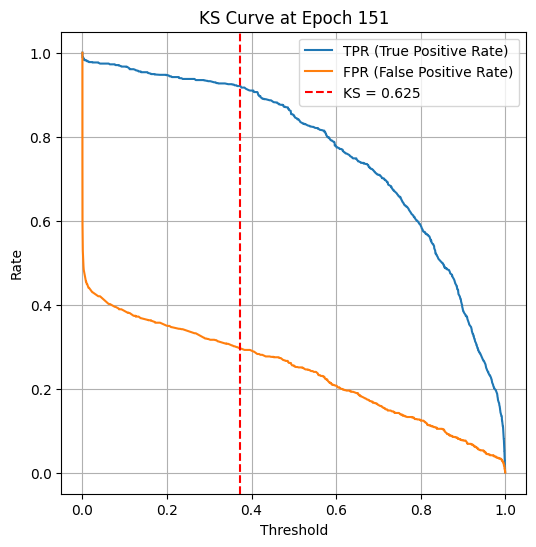

Epoch 150 — Train Loss: 0.2889 | Train Acc: 0.8665 | Val KS: 0.6254 | Val Acc: 0.7999 | Val Prec: 0.7837 | Val Recall: 0.8501 | Val F1: 0.8156
Epoch 160 — Train Loss: 0.2870 | Train Acc: 0.8723 | Val KS: 0.6305 | Val Acc: 0.8083 | Val Prec: 0.7792 | Val Recall: 0.8814 | Val F1: 0.8271
Epoch 170 — Train Loss: 0.2753 | Train Acc: 0.8740 | Val KS: 0.6199 | Val Acc: 0.8013 | Val Prec: 0.7757 | Val Recall: 0.8698 | Val F1: 0.8200


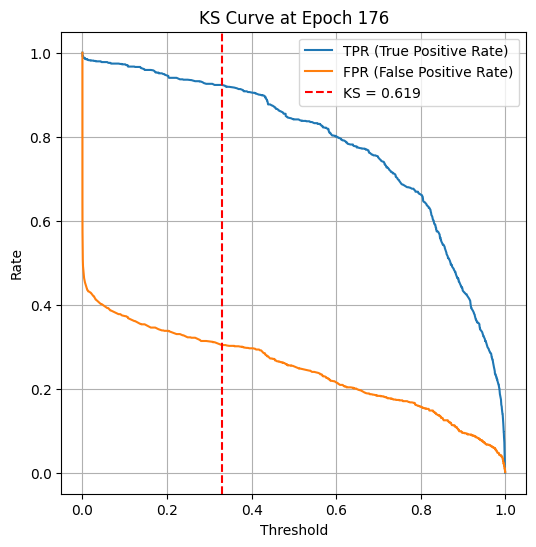

Epoch 180 — Train Loss: 0.2804 | Train Acc: 0.8720 | Val KS: 0.6163 | Val Acc: 0.8110 | Val Prec: 0.7572 | Val Recall: 0.9376 | Val F1: 0.8378
Epoch 190 — Train Loss: 0.2658 | Train Acc: 0.8841 | Val KS: 0.6349 | Val Acc: 0.8185 | Val Prec: 0.7664 | Val Recall: 0.9367 | Val F1: 0.8430


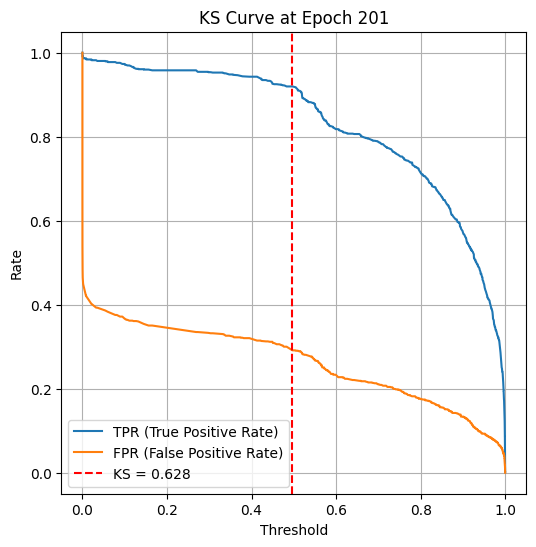

Epoch 200 — Train Loss: 0.2648 | Train Acc: 0.8805 | Val KS: 0.6283 | Val Acc: 0.8180 | Val Prec: 0.7739 | Val Recall: 0.9188 | Val F1: 0.8401
Epoch 210 — Train Loss: 0.2606 | Train Acc: 0.8818 | Val KS: 0.6325 | Val Acc: 0.8078 | Val Prec: 0.7948 | Val Recall: 0.8501 | Val F1: 0.8216
Epoch 220 — Train Loss: 0.2621 | Train Acc: 0.8852 | Val KS: 0.6323 | Val Acc: 0.8059 | Val Prec: 0.7860 | Val Recall: 0.8617 | Val F1: 0.8221


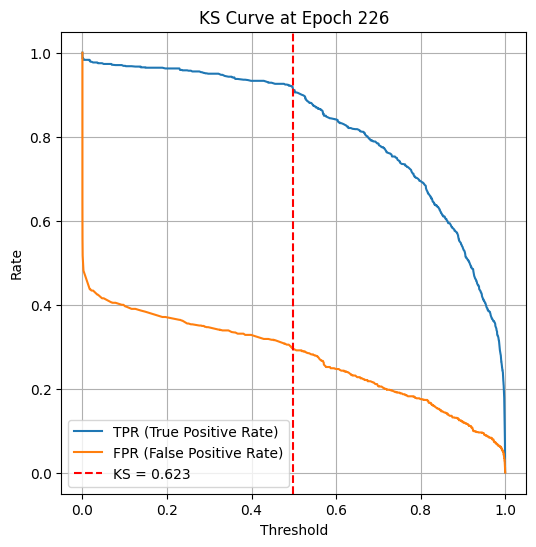

Epoch 230 — Train Loss: 0.2564 | Train Acc: 0.8832 | Val KS: 0.6268 | Val Acc: 0.8087 | Val Prec: 0.7838 | Val Recall: 0.8733 | Val F1: 0.8262
Epoch 240 — Train Loss: 0.2629 | Train Acc: 0.8796 | Val KS: 0.6108 | Val Acc: 0.8041 | Val Prec: 0.7758 | Val Recall: 0.8769 | Val F1: 0.8233


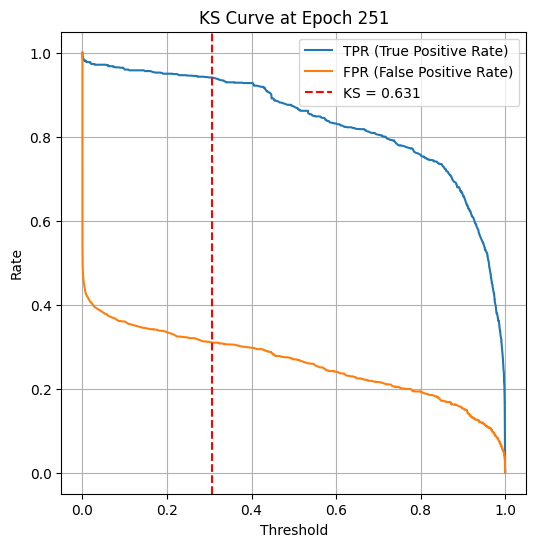

Epoch 250 — Train Loss: 0.2651 | Train Acc: 0.8812 | Val KS: 0.6313 | Val Acc: 0.8036 | Val Prec: 0.7779 | Val Recall: 0.8715 | Val F1: 0.8220
Epoch 260 — Train Loss: 0.2619 | Train Acc: 0.8850 | Val KS: 0.6169 | Val Acc: 0.8069 | Val Prec: 0.7739 | Val Recall: 0.8885 | Val F1: 0.8272
Epoch 270 — Train Loss: 0.2607 | Train Acc: 0.8856 | Val KS: 0.6211 | Val Acc: 0.8129 | Val Prec: 0.7707 | Val Recall: 0.9117 | Val F1: 0.8353


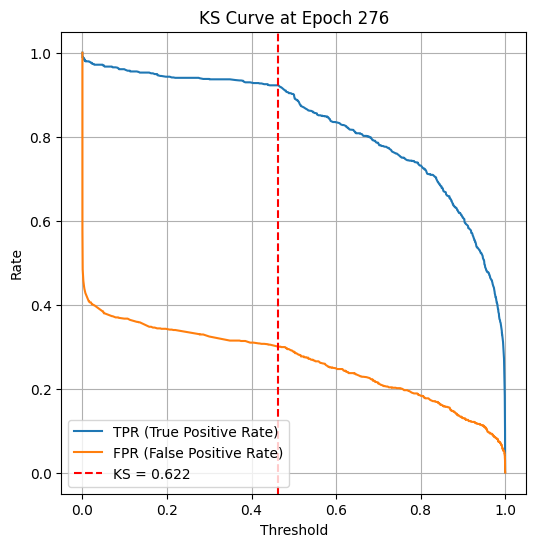

Epoch 280 — Train Loss: 0.2611 | Train Acc: 0.8866 | Val KS: 0.6219 | Val Acc: 0.7994 | Val Prec: 0.7888 | Val Recall: 0.8394 | Val F1: 0.8133
Epoch 290 — Train Loss: 0.2548 | Train Acc: 0.8858 | Val KS: 0.6166 | Val Acc: 0.8022 | Val Prec: 0.7725 | Val Recall: 0.8787 | Val F1: 0.8222


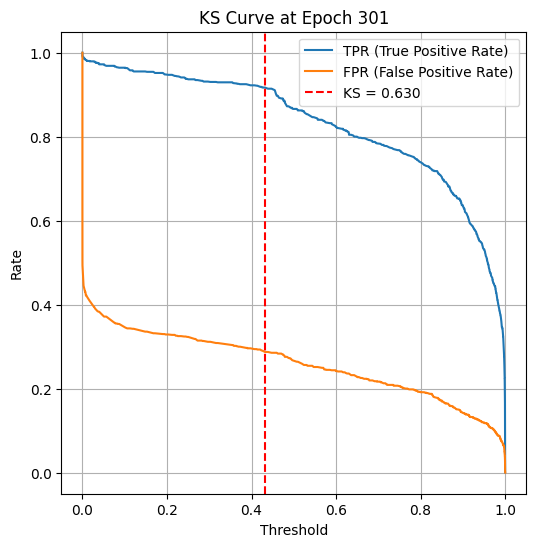

Epoch 300 — Train Loss: 0.2544 | Train Acc: 0.8825 | Val KS: 0.6295 | Val Acc: 0.8027 | Val Prec: 0.7793 | Val Recall: 0.8662 | Val F1: 0.8204


In [ ]:

# Model
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = STABTransformer(input_dim=X_train_tensor.shape[1], n_heads=32, n_layers=1, dropout=0.3).to(device)
optimizer = torch.optim.RMSprop(model.parameters(), lr=1e-3)
loss_fn = nn.BCELoss()


epochs=2000
for epoch in range(epochs):
    model.train()
    epoch_loss = 0

    all_preds = []
    all_targets = []

    for xb, yb in train_loader:
        xb, yb = xb.to(device), yb.to(device)

        pred = model(xb).squeeze()
        loss = loss_fn(pred, yb)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        epoch_loss += loss.item()

        preds_np = (pred > 0.5).detach().cpu().numpy()
        targets_np = yb.detach().cpu().numpy()

        all_preds.extend(preds_np)
        all_targets.extend(targets_np)

    # Training metrics
    acc = accuracy_score(all_targets, all_preds)
    prec = precision_score(all_targets, all_preds)
    rec = recall_score(all_targets, all_preds)
    f1 = f1_score(all_targets, all_preds)

    # Validation metrics
    ks_val, acc_val, prec_val, rec_val, f1_val = evaluate_validation(model, val_loader, device, epoch)

    if epoch % 10 == 0 or epoch == epochs - 1:
        print(f"Epoch {epoch:03d} — Train Loss: {epoch_loss/len(train_loader):.4f} | "
              f"Train Acc: {acc:.4f} | Val KS: {ks_val:.4f} | Val Acc: {acc_val:.4f} | "
              f"Val Prec: {prec_val:.4f} | Val Recall: {rec_val:.4f} | Val F1: {f1_val:.4f}")


In [ ]:
model.eval()
X_test_tensor = torch.tensor(X_test_nn, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test_nn.values, dtype=torch.float32)  # <-- Aqui está o fix

with torch.no_grad():
    y_pred_prob = model(X_test_tensor.to(device)).cpu().squeeze().numpy()
    y_pred = (y_pred_prob >= 0.5).astype(int)

acc = accuracy_score(y_test_nn, y_pred)
prec = precision_score(y_test_nn, y_pred)
rec = recall_score(y_test_nn, y_pred)
f1 = f1_score(y_test_nn, y_pred)

print(f"✅ Accuracy: {acc:.4f}")
print(f"✅ Precision: {prec:.4f}")
print(f"✅ Recall: {rec:.4f}")
print(f"✅ F1 Score: {f1:.4f}")

metrics_names = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
metrics_values = [acc, prec, rec, f1]

plt.figure(figsize=(8, 5))
bars = plt.bar(metrics_names, metrics_values, color=['skyblue', 'orange', 'green', 'red'])
plt.ylim(0, 1)
plt.title('Métricas de Desempenho — STAB Transformer (PyTorch)')
plt.ylabel('Score')
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + 0.15, yval + 0.02, f'{yval:.2f}')
plt.show()



In [ ]:

torch.save(model.state_dict(), 'stab_transformer_16head_1layer_0.1droput_1000epochs.pt')
files.download('stab_transformer_16head_1layer_0.1droput_1000epochs.pt')


In [ ]:

# Model
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = STABTransformer(input_dim=X_train_tensor.shape[1], n_heads=4, n_layers=5, dropout=0.3).to(device)
optimizer = torch.optim.RMSprop(model.parameters(), lr=1e-3)
loss_fn = nn.BCELoss()


epochs=2000
for epoch in range(epochs):
    model.train()
    epoch_loss = 0

    all_preds = []
    all_targets = []

    for xb, yb in train_loader:
        xb, yb = xb.to(device), yb.to(device)

        pred = model(xb).squeeze()
        loss = loss_fn(pred, yb)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        epoch_loss += loss.item()

        preds_np = (pred > 0.5).detach().cpu().numpy()
        targets_np = yb.detach().cpu().numpy()

        all_preds.extend(preds_np)
        all_targets.extend(targets_np)

    # Training metrics
    acc = accuracy_score(all_targets, all_preds)
    prec = precision_score(all_targets, all_preds)
    rec = recall_score(all_targets, all_preds)
    f1 = f1_score(all_targets, all_preds)

    # Validation metrics
    ks_val, acc_val, prec_val, rec_val, f1_val = evaluate_validation(model, val_loader, device, epoch)

    if epoch % 10 == 0 or epoch == epochs - 1:
        print(f"Epoch {epoch:03d} — Train Loss: {epoch_loss/len(train_loader):.4f} | "
              f"Train Acc: {acc:.4f} | Val KS: {ks_val:.4f} | Val Acc: {acc_val:.4f} | "
              f"Val Prec: {prec_val:.4f} | Val Recall: {rec_val:.4f} | Val F1: {f1_val:.4f}")


In [ ]:
model.eval()
X_test_tensor = torch.tensor(X_test_nn, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test_nn.values, dtype=torch.float32)  # <-- Aqui está o fix

with torch.no_grad():
    y_pred_prob = model(X_test_tensor.to(device)).cpu().squeeze().numpy()
    y_pred = (y_pred_prob >= 0.5).astype(int)

acc = accuracy_score(y_test_nn, y_pred)
prec = precision_score(y_test_nn, y_pred)
rec = recall_score(y_test_nn, y_pred)
f1 = f1_score(y_test_nn, y_pred)

print(f"✅ Accuracy: {acc:.4f}")
print(f"✅ Precision: {prec:.4f}")
print(f"✅ Recall: {rec:.4f}")
print(f"✅ F1 Score: {f1:.4f}")

metrics_names = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
metrics_values = [acc, prec, rec, f1]

plt.figure(figsize=(8, 5))
bars = plt.bar(metrics_names, metrics_values, color=['skyblue', 'orange', 'green', 'red'])
plt.ylim(0, 1)
plt.title('Métricas de Desempenho — STAB Transformer (PyTorch)')
plt.ylabel('Score')
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + 0.15, yval + 0.02, f'{yval:.2f}')
plt.show()



In [ ]:

torch.save(model.state_dict(), 'stab_transformer_16head_1layer_0.1droput_1000epochs.pt')
files.download('stab_transformer_16head_1layer_0.1droput_1000epochs.pt')


# 🌲 5. Modelagem com Árvores (Pessoa 3)

In [ ]:
print(y_trees.value_counts())

Churn
1    5607
0    5163
Name: count, dtype: int64


In [ ]:
from sklearn.metrics import classification_report, mean_squared_error, mean_absolute_error, roc_auc_score, f1_score, roc_curve
from scipy.stats import ks_2samp
import numpy as np

def avaliar_modelo(model, X, y):
    y_pred = model.predict(X)
    y_pred_prob = None

    # Check if the model has predict_proba method (for probability-based metrics like ROC AUC and KS)
    if hasattr(model, "predict_proba"):
        y_pred_prob = model.predict_proba(X)[:, 1]

    print("📊 Classification Report:")
    # Handle cases where target names might not be available or are different
    try:
        print(classification_report(y, y_pred, target_names=["Não Churn", "Churn"]))
    except ValueError:
        print(classification_report(y, y_pred))


    # Calculate additional metrics
    mse = mean_squared_error(y, y_pred)
    mae = mean_absolute_error(y, y_pred)
    print(f"MSE: {mse:.4f}")
    print(f"MAE: {mae:.4f}")

    if y_pred_prob is not None:
        roc_auc = roc_auc_score(y, y_pred_prob)
        print(f"ROC AUC: {roc_auc:.4f}")

        # Calculate KS statistic
        try:
            ks_statistic = ks_2samp(y_pred_prob[y==0], y_pred_prob[y==1]).statistic
            print(f"KS: {ks_statistic:.4f}")
        except ValueError:
            print("KS Statistic could not be calculated (perhaps only one class present).")

    f1 = f1_score(y, y_pred)
    print(f"F1 Score: {f1:.4f}")

In [ ]:
!pip install optuna

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 395.9/395.9 kB 18.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 247.0/247.0 kB 13.7 MB/s eta 0:00:00


[I 2025-08-09 20:56:37,701] A new study created in memory with name: no-name-2a88751f-f7e2-479f-91c1-0fc191b41edd


Realizando otimização de hiperparâmetros para Random Forest com Optuna...
Starting Trial 0
  Fold 1 KS: 0.6437
  Fold 2 KS: 0.6707
  Fold 3 KS: 0.6553
  Fold 4 KS: 0.6230


[I 2025-08-09 20:56:56,211] Trial 0 finished with value: 0.6483174485020887 and parameters: {'n_estimators': 331, 'max_depth': 26, 'min_samples_split': 4, 'min_samples_leaf': 4, 'criterion': 'gini'}. Best is trial 0 with value: 0.6483174485020887.


  Fold 5 KS: 0.6488
Trial 0 finished with mean KS: 0.6483
Starting Trial 1
  Fold 1 KS: 0.5996
  Fold 2 KS: 0.6238
  Fold 3 KS: 0.6132
  Fold 4 KS: 0.5698


[I 2025-08-09 20:57:00,740] Trial 1 finished with value: 0.6017782514988292 and parameters: {'n_estimators': 127, 'max_depth': 11, 'min_samples_split': 17, 'min_samples_leaf': 7, 'criterion': 'entropy'}. Best is trial 0 with value: 0.6483174485020887.


  Fold 5 KS: 0.6025
Trial 1 finished with mean KS: 0.6018
Starting Trial 2
  Fold 1 KS: 0.5604
  Fold 2 KS: 0.5583
  Fold 3 KS: 0.5431
  Fold 4 KS: 0.5152


[I 2025-08-09 20:57:02,622] Trial 2 finished with value: 0.5436356570095182 and parameters: {'n_estimators': 77, 'max_depth': 4, 'min_samples_split': 18, 'min_samples_leaf': 7, 'criterion': 'gini'}. Best is trial 0 with value: 0.6483174485020887.


  Fold 5 KS: 0.5411
Trial 2 finished with mean KS: 0.5436
Starting Trial 3
  Fold 1 KS: 0.6218
  Fold 2 KS: 0.6562
  Fold 3 KS: 0.6473
  Fold 4 KS: 0.6042


[I 2025-08-09 20:57:10,208] Trial 3 finished with value: 0.6313912595832789 and parameters: {'n_estimators': 183, 'max_depth': 19, 'min_samples_split': 6, 'min_samples_leaf': 5, 'criterion': 'gini'}. Best is trial 0 with value: 0.6483174485020887.


  Fold 5 KS: 0.6275
Trial 3 finished with mean KS: 0.6314
Starting Trial 4
  Fold 1 KS: 0.5613
  Fold 2 KS: 0.5685
  Fold 3 KS: 0.5545
  Fold 4 KS: 0.5216


[I 2025-08-09 20:57:12,974] Trial 4 finished with value: 0.5501000989022351 and parameters: {'n_estimators': 113, 'max_depth': 5, 'min_samples_split': 13, 'min_samples_leaf': 10, 'criterion': 'gini'}. Best is trial 0 with value: 0.6483174485020887.


  Fold 5 KS: 0.5445
Trial 4 finished with mean KS: 0.5501
Starting Trial 5
  Fold 1 KS: 0.5865
  Fold 2 KS: 0.6026
  Fold 3 KS: 0.5856
  Fold 4 KS: 0.5471


[I 2025-08-09 20:57:26,189] Trial 5 finished with value: 0.5801116912125901 and parameters: {'n_estimators': 393, 'max_depth': 8, 'min_samples_split': 17, 'min_samples_leaf': 9, 'criterion': 'entropy'}. Best is trial 0 with value: 0.6483174485020887.


  Fold 5 KS: 0.5788
Trial 5 finished with mean KS: 0.5801
Starting Trial 6
  Fold 1 KS: 0.5851
  Fold 2 KS: 0.5988
  Fold 3 KS: 0.5712
  Fold 4 KS: 0.5337


[I 2025-08-09 20:57:31,300] Trial 6 finished with value: 0.5710635485893039 and parameters: {'n_estimators': 172, 'max_depth': 7, 'min_samples_split': 2, 'min_samples_leaf': 6, 'criterion': 'entropy'}. Best is trial 0 with value: 0.6483174485020887.


  Fold 5 KS: 0.5665
Trial 6 finished with mean KS: 0.5711
Starting Trial 7
  Fold 1 KS: 0.5532
  Fold 2 KS: 0.5513
  Fold 3 KS: 0.5351
  Fold 4 KS: 0.5027


[I 2025-08-09 20:57:41,651] Trial 7 finished with value: 0.5352833469890452 and parameters: {'n_estimators': 432, 'max_depth': 3, 'min_samples_split': 15, 'min_samples_leaf': 1, 'criterion': 'entropy'}. Best is trial 0 with value: 0.6483174485020887.


  Fold 5 KS: 0.5342
Trial 7 finished with mean KS: 0.5353
Starting Trial 8
  Fold 1 KS: 0.5583
  Fold 2 KS: 0.5490
  Fold 3 KS: 0.5365
  Fold 4 KS: 0.5014


[I 2025-08-09 20:57:46,896] Trial 8 finished with value: 0.5354654988975422 and parameters: {'n_estimators': 216, 'max_depth': 3, 'min_samples_split': 19, 'min_samples_leaf': 5, 'criterion': 'gini'}. Best is trial 0 with value: 0.6483174485020887.


  Fold 5 KS: 0.5321
Trial 8 finished with mean KS: 0.5355
Starting Trial 9
  Fold 1 KS: 0.5527
  Fold 2 KS: 0.5545
  Fold 3 KS: 0.5380
  Fold 4 KS: 0.5063


[I 2025-08-09 20:57:55,121] Trial 9 finished with value: 0.5368218087679824 and parameters: {'n_estimators': 336, 'max_depth': 3, 'min_samples_split': 13, 'min_samples_leaf': 6, 'criterion': 'entropy'}. Best is trial 0 with value: 0.6483174485020887.


  Fold 5 KS: 0.5326
Trial 9 finished with mean KS: 0.5368
Starting Trial 10
  Fold 1 KS: 0.7024
  Fold 2 KS: 0.7175
  Fold 3 KS: 0.7169
  Fold 4 KS: 0.6847


[I 2025-08-09 20:58:17,897] Trial 10 finished with value: 0.7050925257520443 and parameters: {'n_estimators': 499, 'max_depth': 29, 'min_samples_split': 8, 'min_samples_leaf': 1, 'criterion': 'gini'}. Best is trial 10 with value: 0.7050925257520443.


  Fold 5 KS: 0.7040
Trial 10 finished with mean KS: 0.7051
Starting Trial 11
  Fold 1 KS: 0.7000
  Fold 2 KS: 0.7135
  Fold 3 KS: 0.7171
  Fold 4 KS: 0.6826


[I 2025-08-09 20:58:44,929] Trial 11 finished with value: 0.7027570470209726 and parameters: {'n_estimators': 500, 'max_depth': 23, 'min_samples_split': 8, 'min_samples_leaf': 1, 'criterion': 'gini'}. Best is trial 10 with value: 0.7050925257520443.


  Fold 5 KS: 0.7006
Trial 11 finished with mean KS: 0.7028
Starting Trial 12
  Fold 1 KS: 0.6874
  Fold 2 KS: 0.7077
  Fold 3 KS: 0.7032
  Fold 4 KS: 0.6740


[I 2025-08-09 20:59:05,231] Trial 12 finished with value: 0.6920110950186792 and parameters: {'n_estimators': 487, 'max_depth': 30, 'min_samples_split': 9, 'min_samples_leaf': 1, 'criterion': 'gini'}. Best is trial 10 with value: 0.7050925257520443.


  Fold 5 KS: 0.6877
Trial 12 finished with mean KS: 0.6920
Starting Trial 13
  Fold 1 KS: 0.6568
  Fold 2 KS: 0.6846
  Fold 3 KS: 0.6726
  Fold 4 KS: 0.6440


[I 2025-08-09 20:59:24,562] Trial 13 finished with value: 0.6647454018781114 and parameters: {'n_estimators': 494, 'max_depth': 16, 'min_samples_split': 8, 'min_samples_leaf': 3, 'criterion': 'gini'}. Best is trial 10 with value: 0.7050925257520443.


  Fold 5 KS: 0.6657
Trial 13 finished with mean KS: 0.6647
Starting Trial 14
  Fold 1 KS: 0.6678
  Fold 2 KS: 0.6948
  Fold 3 KS: 0.6828
  Fold 4 KS: 0.6533


[I 2025-08-09 20:59:41,085] Trial 14 finished with value: 0.6734340243468037 and parameters: {'n_estimators': 420, 'max_depth': 18, 'min_samples_split': 9, 'min_samples_leaf': 2, 'criterion': 'gini'}. Best is trial 10 with value: 0.7050925257520443.


  Fold 5 KS: 0.6685
Trial 14 finished with mean KS: 0.6734
Starting Trial 15
  Fold 1 KS: 0.6745
  Fold 2 KS: 0.6925
  Fold 3 KS: 0.6893
  Fold 4 KS: 0.6595


[I 2025-08-09 20:59:52,081] Trial 15 finished with value: 0.6771656994464411 and parameters: {'n_estimators': 274, 'max_depth': 13, 'min_samples_split': 6, 'min_samples_leaf': 2, 'criterion': 'gini'}. Best is trial 10 with value: 0.7050925257520443.


  Fold 5 KS: 0.6699
Trial 15 finished with mean KS: 0.6772
Starting Trial 16
  Fold 1 KS: 0.6452
  Fold 2 KS: 0.6773
  Fold 3 KS: 0.6599
  Fold 4 KS: 0.6291


[I 2025-08-09 21:00:16,009] Trial 16 finished with value: 0.6522416808927568 and parameters: {'n_estimators': 449, 'max_depth': 23, 'min_samples_split': 10, 'min_samples_leaf': 3, 'criterion': 'gini'}. Best is trial 10 with value: 0.7050925257520443.


  Fold 5 KS: 0.6497
Trial 16 finished with mean KS: 0.6522
Starting Trial 17
  Fold 1 KS: 0.6444
  Fold 2 KS: 0.6645
  Fold 3 KS: 0.6533
  Fold 4 KS: 0.6212


[I 2025-08-09 21:00:29,443] Trial 17 finished with value: 0.6446772353201607 and parameters: {'n_estimators': 361, 'max_depth': 12, 'min_samples_split': 12, 'min_samples_leaf': 1, 'criterion': 'gini'}. Best is trial 10 with value: 0.7050925257520443.


  Fold 5 KS: 0.6401
Trial 17 finished with mean KS: 0.6447
Starting Trial 18
  Fold 1 KS: 0.6701
  Fold 2 KS: 0.6956
  Fold 3 KS: 0.6800
  Fold 4 KS: 0.6589


[I 2025-08-09 21:00:40,744] Trial 18 finished with value: 0.6759236558021379 and parameters: {'n_estimators': 274, 'max_depth': 22, 'min_samples_split': 6, 'min_samples_leaf': 3, 'criterion': 'gini'}. Best is trial 10 with value: 0.7050925257520443.


  Fold 5 KS: 0.6750
Trial 18 finished with mean KS: 0.6759
Starting Trial 19
  Fold 1 KS: 0.7144
  Fold 2 KS: 0.7278
  Fold 3 KS: 0.7235
  Fold 4 KS: 0.7070


[I 2025-08-09 21:01:00,964] Trial 19 finished with value: 0.7166872913636786 and parameters: {'n_estimators': 495, 'max_depth': 29, 'min_samples_split': 2, 'min_samples_leaf': 2, 'criterion': 'gini'}. Best is trial 19 with value: 0.7166872913636786.


  Fold 5 KS: 0.7107
Trial 19 finished with mean KS: 0.7167
Starting Trial 20
  Fold 1 KS: 0.6445
  Fold 2 KS: 0.6711
  Fold 3 KS: 0.6589
  Fold 4 KS: 0.6219


[I 2025-08-09 21:01:17,254] Trial 20 finished with value: 0.6487240634132195 and parameters: {'n_estimators': 387, 'max_depth': 29, 'min_samples_split': 2, 'min_samples_leaf': 4, 'criterion': 'gini'}. Best is trial 19 with value: 0.7166872913636786.


  Fold 5 KS: 0.6472
Trial 20 finished with mean KS: 0.6487
Starting Trial 21
  Fold 1 KS: 0.7067
  Fold 2 KS: 0.7242
  Fold 3 KS: 0.7170
  Fold 4 KS: 0.6971


[I 2025-08-09 21:01:35,887] Trial 21 finished with value: 0.7089964403527829 and parameters: {'n_estimators': 471, 'max_depth': 15, 'min_samples_split': 4, 'min_samples_leaf': 2, 'criterion': 'gini'}. Best is trial 19 with value: 0.7166872913636786.


  Fold 5 KS: 0.7000
Trial 21 finished with mean KS: 0.7090
Starting Trial 22
  Fold 1 KS: 0.7046
  Fold 2 KS: 0.7229
  Fold 3 KS: 0.7158
  Fold 4 KS: 0.6969


[I 2025-08-09 21:01:54,386] Trial 22 finished with value: 0.7079330839636637 and parameters: {'n_estimators': 458, 'max_depth': 15, 'min_samples_split': 4, 'min_samples_leaf': 2, 'criterion': 'gini'}. Best is trial 19 with value: 0.7166872913636786.


  Fold 5 KS: 0.6995
Trial 22 finished with mean KS: 0.7079
Starting Trial 23
  Fold 1 KS: 0.7057
  Fold 2 KS: 0.7229
  Fold 3 KS: 0.7157
  Fold 4 KS: 0.6968


[I 2025-08-09 21:02:13,407] Trial 23 finished with value: 0.7083404359327439 and parameters: {'n_estimators': 456, 'max_depth': 15, 'min_samples_split': 4, 'min_samples_leaf': 2, 'criterion': 'gini'}. Best is trial 19 with value: 0.7166872913636786.


  Fold 5 KS: 0.7006
Trial 23 finished with mean KS: 0.7083
Starting Trial 24
  Fold 1 KS: 0.6107
  Fold 2 KS: 0.6400
  Fold 3 KS: 0.6189
  Fold 4 KS: 0.5891


[I 2025-08-09 21:02:27,560] Trial 24 finished with value: 0.6145007362132784 and parameters: {'n_estimators': 409, 'max_depth': 10, 'min_samples_split': 4, 'min_samples_leaf': 4, 'criterion': 'gini'}. Best is trial 19 with value: 0.7166872913636786.


  Fold 5 KS: 0.6138
Trial 24 finished with mean KS: 0.6145
Starting Trial 25
  Fold 1 KS: 0.5713
  Fold 2 KS: 0.5873
  Fold 3 KS: 0.5676
  Fold 4 KS: 0.5311


[I 2025-08-09 21:02:40,815] Trial 25 finished with value: 0.5643714429626955 and parameters: {'n_estimators': 455, 'max_depth': 6, 'min_samples_split': 2, 'min_samples_leaf': 2, 'criterion': 'gini'}. Best is trial 19 with value: 0.7166872913636786.


  Fold 5 KS: 0.5645
Trial 25 finished with mean KS: 0.5644
Starting Trial 26
  Fold 1 KS: 0.6055
  Fold 2 KS: 0.6348
  Fold 3 KS: 0.6063
  Fold 4 KS: 0.5679


[I 2025-08-09 21:02:54,675] Trial 26 finished with value: 0.6028564007492043 and parameters: {'n_estimators': 367, 'max_depth': 9, 'min_samples_split': 4, 'min_samples_leaf': 3, 'criterion': 'entropy'}. Best is trial 19 with value: 0.7166872913636786.


  Fold 5 KS: 0.5998
Trial 26 finished with mean KS: 0.6029
Starting Trial 27
  Fold 1 KS: 0.6855
  Fold 2 KS: 0.6948
  Fold 3 KS: 0.6912
  Fold 4 KS: 0.6677


[I 2025-08-09 21:03:07,522] Trial 27 finished with value: 0.6850655647013065 and parameters: {'n_estimators': 317, 'max_depth': 13, 'min_samples_split': 5, 'min_samples_leaf': 2, 'criterion': 'gini'}. Best is trial 19 with value: 0.7166872913636786.


  Fold 5 KS: 0.6860
Trial 27 finished with mean KS: 0.6851
Starting Trial 28
  Fold 1 KS: 0.6351
  Fold 2 KS: 0.6729
  Fold 3 KS: 0.6550
  Fold 4 KS: 0.6162


[I 2025-08-09 21:03:24,580] Trial 28 finished with value: 0.644230940118797 and parameters: {'n_estimators': 465, 'max_depth': 14, 'min_samples_split': 3, 'min_samples_leaf': 4, 'criterion': 'gini'}. Best is trial 19 with value: 0.7166872913636786.


  Fold 5 KS: 0.6419
Trial 28 finished with mean KS: 0.6442
Starting Trial 29
  Fold 1 KS: 0.6411
  Fold 2 KS: 0.6705
  Fold 3 KS: 0.6572
  Fold 4 KS: 0.6256


[I 2025-08-09 21:03:36,644] Trial 29 finished with value: 0.6477379309781783 and parameters: {'n_estimators': 312, 'max_depth': 19, 'min_samples_split': 5, 'min_samples_leaf': 4, 'criterion': 'gini'}. Best is trial 19 with value: 0.7166872913636786.


  Fold 5 KS: 0.6443
Trial 29 finished with mean KS: 0.6477
Starting Trial 30
  Fold 1 KS: 0.6689
  Fold 2 KS: 0.6903
  Fold 3 KS: 0.6753
  Fold 4 KS: 0.6477


[I 2025-08-09 21:03:54,621] Trial 30 finished with value: 0.6689453041620225 and parameters: {'n_estimators': 430, 'max_depth': 17, 'min_samples_split': 7, 'min_samples_leaf': 3, 'criterion': 'gini'}. Best is trial 19 with value: 0.7166872913636786.


  Fold 5 KS: 0.6626
Trial 30 finished with mean KS: 0.6689
Starting Trial 31
  Fold 1 KS: 0.7067
  Fold 2 KS: 0.7233
  Fold 3 KS: 0.7147
  Fold 4 KS: 0.6983


[I 2025-08-09 21:04:13,560] Trial 31 finished with value: 0.7087664566297999 and parameters: {'n_estimators': 468, 'max_depth': 15, 'min_samples_split': 4, 'min_samples_leaf': 2, 'criterion': 'gini'}. Best is trial 19 with value: 0.7166872913636786.


  Fold 5 KS: 0.7008
Trial 31 finished with mean KS: 0.7088
Starting Trial 32
  Fold 1 KS: 0.6468
  Fold 2 KS: 0.6812
  Fold 3 KS: 0.6674
  Fold 4 KS: 0.6291


[I 2025-08-09 21:04:31,150] Trial 32 finished with value: 0.6563721259857601 and parameters: {'n_estimators': 471, 'max_depth': 11, 'min_samples_split': 3, 'min_samples_leaf': 2, 'criterion': 'gini'}. Best is trial 19 with value: 0.7166872913636786.


  Fold 5 KS: 0.6574
Trial 32 finished with mean KS: 0.6564
Starting Trial 33
  Fold 1 KS: 0.6700
  Fold 2 KS: 0.6973
  Fold 3 KS: 0.6812
  Fold 4 KS: 0.6579


[I 2025-08-09 21:04:48,727] Trial 33 finished with value: 0.6744331033910923 and parameters: {'n_estimators': 436, 'max_depth': 21, 'min_samples_split': 3, 'min_samples_leaf': 3, 'criterion': 'gini'}. Best is trial 19 with value: 0.7166872913636786.


  Fold 5 KS: 0.6659
Trial 33 finished with mean KS: 0.6744
Starting Trial 34
  Fold 1 KS: 0.6045
  Fold 2 KS: 0.6313
  Fold 3 KS: 0.6126
  Fold 4 KS: 0.5745


[I 2025-08-09 21:05:02,980] Trial 34 finished with value: 0.6054566209563887 and parameters: {'n_estimators': 394, 'max_depth': 25, 'min_samples_split': 5, 'min_samples_leaf': 8, 'criterion': 'gini'}. Best is trial 19 with value: 0.7166872913636786.


  Fold 5 KS: 0.6044
Trial 34 finished with mean KS: 0.6055
Starting Trial 35
  Fold 1 KS: 0.6176
  Fold 2 KS: 0.6442
  Fold 3 KS: 0.6291
  Fold 4 KS: 0.5911


[I 2025-08-09 21:05:19,929] Trial 35 finished with value: 0.6199750730127741 and parameters: {'n_estimators': 473, 'max_depth': 11, 'min_samples_split': 6, 'min_samples_leaf': 5, 'criterion': 'gini'}. Best is trial 19 with value: 0.7166872913636786.


  Fold 5 KS: 0.6179
Trial 35 finished with mean KS: 0.6200
Starting Trial 36
  Fold 1 KS: 0.5969
  Fold 2 KS: 0.6182
  Fold 3 KS: 0.5908
  Fold 4 KS: 0.5519


[I 2025-08-09 21:05:34,223] Trial 36 finished with value: 0.5889837184680552 and parameters: {'n_estimators': 412, 'max_depth': 8, 'min_samples_split': 3, 'min_samples_leaf': 2, 'criterion': 'entropy'}. Best is trial 19 with value: 0.7166872913636786.


  Fold 5 KS: 0.5872
Trial 36 finished with mean KS: 0.5890
Starting Trial 37
  Fold 1 KS: 0.8145
  Fold 2 KS: 0.8222
  Fold 3 KS: 0.8175
  Fold 4 KS: 0.8203


[I 2025-08-09 21:05:44,965] Trial 37 finished with value: 0.8134773120126637 and parameters: {'n_estimators': 229, 'max_depth': 20, 'min_samples_split': 2, 'min_samples_leaf': 1, 'criterion': 'gini'}. Best is trial 37 with value: 0.8134773120126637.


  Fold 5 KS: 0.7929
Trial 37 finished with mean KS: 0.8135
Starting Trial 38
  Fold 1 KS: 0.8085
  Fold 2 KS: 0.8158
  Fold 3 KS: 0.8152
  Fold 4 KS: 0.8123


[I 2025-08-09 21:05:56,868] Trial 38 finished with value: 0.8097497839160717 and parameters: {'n_estimators': 229, 'max_depth': 20, 'min_samples_split': 2, 'min_samples_leaf': 1, 'criterion': 'entropy'}. Best is trial 37 with value: 0.8134773120126637.


  Fold 5 KS: 0.7968
Trial 38 finished with mean KS: 0.8097
Starting Trial 39
  Fold 1 KS: 0.8190
  Fold 2 KS: 0.8246
  Fold 3 KS: 0.8195
  Fold 4 KS: 0.8129


[I 2025-08-09 21:06:09,451] Trial 39 finished with value: 0.8136439376090907 and parameters: {'n_estimators': 232, 'max_depth': 26, 'min_samples_split': 2, 'min_samples_leaf': 1, 'criterion': 'entropy'}. Best is trial 39 with value: 0.8136439376090907.


  Fold 5 KS: 0.7921
Trial 39 finished with mean KS: 0.8136
Starting Trial 40
  Fold 1 KS: 0.8144
  Fold 2 KS: 0.8231
  Fold 3 KS: 0.8182
  Fold 4 KS: 0.8148


[I 2025-08-09 21:06:21,434] Trial 40 finished with value: 0.8125347357345755 and parameters: {'n_estimators': 228, 'max_depth': 26, 'min_samples_split': 2, 'min_samples_leaf': 1, 'criterion': 'entropy'}. Best is trial 39 with value: 0.8136439376090907.


  Fold 5 KS: 0.7921
Trial 40 finished with mean KS: 0.8125
Starting Trial 41
  Fold 1 KS: 0.8181
  Fold 2 KS: 0.8269
  Fold 3 KS: 0.8194
  Fold 4 KS: 0.8136


[I 2025-08-09 21:06:33,467] Trial 41 finished with value: 0.8140260991498408 and parameters: {'n_estimators': 231, 'max_depth': 26, 'min_samples_split': 2, 'min_samples_leaf': 1, 'criterion': 'entropy'}. Best is trial 41 with value: 0.8140260991498408.


  Fold 5 KS: 0.7921
Trial 41 finished with mean KS: 0.8140
Starting Trial 42
  Fold 1 KS: 0.8057
  Fold 2 KS: 0.8144
  Fold 3 KS: 0.8116
  Fold 4 KS: 0.8111


[I 2025-08-09 21:06:45,007] Trial 42 finished with value: 0.8081648285697897 and parameters: {'n_estimators': 224, 'max_depth': 20, 'min_samples_split': 2, 'min_samples_leaf': 1, 'criterion': 'entropy'}. Best is trial 41 with value: 0.8140260991498408.


  Fold 5 KS: 0.7981
Trial 42 finished with mean KS: 0.8082
Starting Trial 43
  Fold 1 KS: 0.8148
  Fold 2 KS: 0.8232
  Fold 3 KS: 0.8153
  Fold 4 KS: 0.8222


[I 2025-08-09 21:06:56,017] Trial 43 finished with value: 0.8130826150760729 and parameters: {'n_estimators': 212, 'max_depth': 25, 'min_samples_split': 2, 'min_samples_leaf': 1, 'criterion': 'entropy'}. Best is trial 41 with value: 0.8140260991498408.


  Fold 5 KS: 0.7900
Trial 43 finished with mean KS: 0.8131
Starting Trial 44
  Fold 1 KS: 0.7841
  Fold 2 KS: 0.7843
  Fold 3 KS: 0.7825
  Fold 4 KS: 0.7765


[I 2025-08-09 21:07:04,356] Trial 44 finished with value: 0.7791941256072634 and parameters: {'n_estimators': 170, 'max_depth': 26, 'min_samples_split': 3, 'min_samples_leaf': 1, 'criterion': 'entropy'}. Best is trial 41 with value: 0.8140260991498408.


  Fold 5 KS: 0.7686
Trial 44 finished with mean KS: 0.7792
Starting Trial 45
  Fold 1 KS: 0.6012
  Fold 2 KS: 0.6192
  Fold 3 KS: 0.6084
  Fold 4 KS: 0.5696


[I 2025-08-09 21:07:12,844] Trial 45 finished with value: 0.5994929053332809 and parameters: {'n_estimators': 195, 'max_depth': 25, 'min_samples_split': 16, 'min_samples_leaf': 10, 'criterion': 'entropy'}. Best is trial 41 with value: 0.8140260991498408.


  Fold 5 KS: 0.5990
Trial 45 finished with mean KS: 0.5995
Starting Trial 46
  Fold 1 KS: 0.8130
  Fold 2 KS: 0.8271
  Fold 3 KS: 0.8211
  Fold 4 KS: 0.8197


[I 2025-08-09 21:07:26,026] Trial 46 finished with value: 0.8142061985984368 and parameters: {'n_estimators': 255, 'max_depth': 27, 'min_samples_split': 2, 'min_samples_leaf': 1, 'criterion': 'entropy'}. Best is trial 46 with value: 0.8142061985984368.


  Fold 5 KS: 0.7902
Trial 46 finished with mean KS: 0.8142
Starting Trial 47
  Fold 1 KS: 0.5617
  Fold 2 KS: 0.5527
  Fold 3 KS: 0.5424
  Fold 4 KS: 0.5122


[I 2025-08-09 21:07:29,606] Trial 47 finished with value: 0.5414982983730695 and parameters: {'n_estimators': 139, 'max_depth': 4, 'min_samples_split': 14, 'min_samples_leaf': 1, 'criterion': 'entropy'}. Best is trial 46 with value: 0.8142061985984368.


  Fold 5 KS: 0.5384
Trial 47 finished with mean KS: 0.5415
Starting Trial 48
  Fold 1 KS: 0.6076
  Fold 2 KS: 0.6433
  Fold 3 KS: 0.6228
  Fold 4 KS: 0.5846


[I 2025-08-09 21:07:40,162] Trial 48 finished with value: 0.6142709039899719 and parameters: {'n_estimators': 255, 'max_depth': 24, 'min_samples_split': 5, 'min_samples_leaf': 7, 'criterion': 'entropy'}. Best is trial 46 with value: 0.8142061985984368.


  Fold 5 KS: 0.6130
Trial 48 finished with mean KS: 0.6143
Starting Trial 49
  Fold 1 KS: 0.7230
  Fold 2 KS: 0.7261
  Fold 3 KS: 0.7297
  Fold 4 KS: 0.7069


[I 2025-08-09 21:07:52,204] Trial 49 finished with value: 0.717622860781735 and parameters: {'n_estimators': 249, 'max_depth': 27, 'min_samples_split': 7, 'min_samples_leaf': 1, 'criterion': 'entropy'}. Best is trial 46 with value: 0.8142061985984368.


  Fold 5 KS: 0.7026
Trial 49 finished with mean KS: 0.7176
Otimização de hiperparâmetros para Random Forest concluída.
Melhores hiperparâmetros para Random Forest: {'n_estimators': 255, 'max_depth': 27, 'min_samples_split': 2, 'min_samples_leaf': 1, 'criterion': 'entropy'}
Melhor KS score (CV) para Random Forest: 0.8142

Avaliação do melhor modelo Random Forest no conjunto de teste:


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


📊 Classification Report:
              precision    recall  f1-score   support

   Não Churn       0.98      0.80      0.88      1033
       Churn       0.84      0.98      0.91      1121

    accuracy                           0.90      2154
   macro avg       0.91      0.89      0.90      2154
weighted avg       0.91      0.90      0.90      2154

MSE: 0.1021
MAE: 0.1021
ROC AUC: 0.9733
KS: 0.8653
F1 Score: 0.9094

Matriz de Confusão (Teste):


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


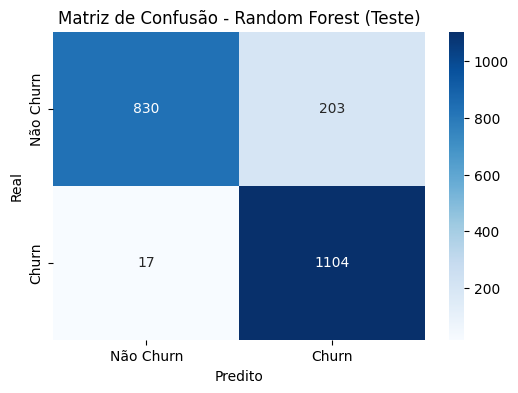

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.metrics import make_scorer
from scipy.stats import ks_2samp
import optuna
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Define a scorer for KS statistic (Optuna maximizes the objective function)
def ks_scorer_optuna(y_true, y_pred_prob):
    y_true = np.asarray(y_true)  # garante numpy
    y_pred_prob = np.asarray(y_pred_prob)

    if y_pred_prob.ndim == 2 and y_pred_prob.shape[1] == 2:
        y_pred_prob = y_pred_prob[:, 1]

    unique_classes, counts = np.unique(y_true, return_counts=True)
    print(f"  Fold y_true unique classes: {unique_classes}, counts: {counts}")

    if len(unique_classes) < 2:
        return -1.0

    if np.sum(y_true == unique_classes[0]) < 2 or np.sum(y_true == unique_classes[1]) < 2:
        return -1.0

    ks_statistic = ks_2samp(y_pred_prob[y_true == 0], y_pred_prob[y_true == 1]).statistic
    print(f"  Calculated KS: {ks_statistic:.4f}")
    return ks_statistic


# Objective function for Optuna - Random Forest
def objective_rf(trial):
    print(f"Starting Trial {trial.number}")

    # Hiperparâmetros sugeridos pelo Optuna
    n_estimators = trial.suggest_int('n_estimators', 50, 500)
    max_depth = trial.suggest_int('max_depth', 3, 30, log=True)
    min_samples_split = trial.suggest_int('min_samples_split', 2, 20)
    min_samples_leaf = trial.suggest_int('min_samples_leaf', 1, 10)
    criterion = trial.suggest_categorical('criterion', ['gini', 'entropy'])

    model = RandomForestClassifier(
        n_estimators=n_estimators,
        max_depth=max_depth,
        min_samples_split=min_samples_split,
        min_samples_leaf=min_samples_leaf,
        criterion=criterion,
        random_state=42,
        n_jobs=-1
    )

    skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    ks_scores = []

    for fold, (train_idx, val_idx) in enumerate(skf.split(X_trainval_trees, y_trainval_trees), 1):
        X_tr, X_val = X_trainval_trees[train_idx], X_trainval_trees[val_idx]
        y_tr, y_val = y_trainval_trees[train_idx], y_trainval_trees[val_idx]

        model.fit(X_tr, y_tr)
        y_pred_prob = model.predict_proba(X_val)[:, 1]  # prob da classe positiva

        # KS calculation
        ks_value = ks_2samp(y_pred_prob[y_val == 0], y_pred_prob[y_val == 1]).statistic
        ks_scores.append(ks_value)

        print(f"  Fold {fold} KS: {ks_value:.4f}")

    mean_ks = np.mean(ks_scores)
    print(f"Trial {trial.number} finished with mean KS: {mean_ks:.4f}")
    return mean_ks

print("Realizando otimização de hiperparâmetros para Random Forest com Optuna...")

# Combine training and validation data for Optuna
X_trainval_trees = np.vstack((X_train_trees, X_val_trees))
y_trainval_trees = np.concatenate((y_train_trees, y_val_trees))


study_rf = optuna.create_study(direction='maximize') # We want to maximize the KS score
study_rf.optimize(objective_rf, n_trials=50) # Run 50 trials (adjust as needed)

print("Otimização de hiperparâmetros para Random Forest concluída.")
print(f"Melhores hiperparâmetros para Random Forest: {study_rf.best_params}")
print(f"Melhor KS score (CV) para Random Forest: {study_rf.best_value:.4f}")

# Train the best model on the full training+validation data
best_rf_model = RandomForestClassifier(**study_rf.best_params, random_state=42, n_jobs=-1)
best_rf_model.fit(X_trainval_trees, y_trainval_trees)

# Evaluate the best model on the test set
print("\nAvaliação do melhor modelo Random Forest no conjunto de teste:")
avaliar_modelo(best_rf_model, X_test_trees, y_test_trees)

# Visualizar a matriz de confusão para o conjunto de teste
print("\nMatriz de Confusão (Teste):")
cm_rf_test = confusion_matrix(y_test_trees, best_rf_model.predict(X_test_trees))
plt.figure(figsize=(6, 4))
sns.heatmap(cm_rf_test, annot=True, fmt='d', cmap='Blues', xticklabels=['Não Churn', 'Churn'], yticklabels=['Não Churn', 'Churn'])
plt.xlabel('Predito')
plt.ylabel('Real')
plt.title('Matriz de Confusão - Random Forest (Teste)')
plt.show()

[I 2025-08-09 21:14:26,075] A new study created in memory with name: no-name-96a274b3-efce-4bfa-a422-6d2b83d05499


Realizando otimização de hiperparâmetros para Gradient Boosting com Optuna...
Starting Trial 0
  Fold 1 KS: 0.8475
  Fold 2 KS: 0.8545
  Fold 3 KS: 0.8346
  Fold 4 KS: 0.8470


[I 2025-08-09 21:15:43,796] Trial 0 finished with value: 0.840931430470946 and parameters: {'n_estimators': 359, 'learning_rate': 0.1743277015992649, 'max_depth': 9, 'min_samples_split': 11, 'min_samples_leaf': 3, 'subsample': 0.9560844995532203}. Best is trial 0 with value: 0.840931430470946.


  Fold 5 KS: 0.8210
Trial 0 finished with mean KS: 0.8409
Starting Trial 1
  Fold 1 KS: 0.7186
  Fold 2 KS: 0.7169
  Fold 3 KS: 0.7290
  Fold 4 KS: 0.7275


[I 2025-08-09 21:16:54,083] Trial 1 finished with value: 0.7187459477218263 and parameters: {'n_estimators': 376, 'learning_rate': 0.037933899167796103, 'max_depth': 8, 'min_samples_split': 5, 'min_samples_leaf': 10, 'subsample': 0.9537736166602687}. Best is trial 0 with value: 0.840931430470946.


  Fold 5 KS: 0.7017
Trial 1 finished with mean KS: 0.7187
Starting Trial 2
  Fold 1 KS: 0.6256
  Fold 2 KS: 0.6338
  Fold 3 KS: 0.6486
  Fold 4 KS: 0.6171


[I 2025-08-09 21:17:12,069] Trial 2 finished with value: 0.6328523699560293 and parameters: {'n_estimators': 86, 'learning_rate': 0.02567592705517425, 'max_depth': 8, 'min_samples_split': 2, 'min_samples_leaf': 10, 'subsample': 0.9962609718570944}. Best is trial 0 with value: 0.840931430470946.


  Fold 5 KS: 0.6391
Trial 2 finished with mean KS: 0.6329
Starting Trial 3
  Fold 1 KS: 0.5741
  Fold 2 KS: 0.5796
  Fold 3 KS: 0.5833
  Fold 4 KS: 0.5331


[I 2025-08-09 21:17:40,144] Trial 3 finished with value: 0.5655650031034287 and parameters: {'n_estimators': 378, 'learning_rate': 0.017435078101977485, 'max_depth': 3, 'min_samples_split': 6, 'min_samples_leaf': 7, 'subsample': 0.9175936253338222}. Best is trial 0 with value: 0.840931430470946.


  Fold 5 KS: 0.5577
Trial 3 finished with mean KS: 0.5656
Starting Trial 4
  Fold 1 KS: 0.5775
  Fold 2 KS: 0.5869
  Fold 3 KS: 0.5868
  Fold 4 KS: 0.5403


[I 2025-08-09 21:18:17,107] Trial 4 finished with value: 0.5717711091908727 and parameters: {'n_estimators': 440, 'learning_rate': 0.008574429163173485, 'max_depth': 4, 'min_samples_split': 16, 'min_samples_leaf': 3, 'subsample': 0.7473275308343462}. Best is trial 0 with value: 0.840931430470946.


  Fold 5 KS: 0.5672
Trial 4 finished with mean KS: 0.5718
Starting Trial 5
  Fold 1 KS: 0.6571
  Fold 2 KS: 0.6677
  Fold 3 KS: 0.6614
  Fold 4 KS: 0.6423


[I 2025-08-09 21:19:17,869] Trial 5 finished with value: 0.6555794586374291 and parameters: {'n_estimators': 328, 'learning_rate': 0.0061455725782195905, 'max_depth': 9, 'min_samples_split': 11, 'min_samples_leaf': 7, 'subsample': 0.6996314545524494}. Best is trial 0 with value: 0.840931430470946.


  Fold 5 KS: 0.6494
Trial 5 finished with mean KS: 0.6556
Starting Trial 6
  Fold 1 KS: 0.5528
  Fold 2 KS: 0.5544
  Fold 3 KS: 0.5506
  Fold 4 KS: 0.5158


[I 2025-08-09 21:19:24,555] Trial 6 finished with value: 0.5448477343785513 and parameters: {'n_estimators': 113, 'learning_rate': 0.016325494722560667, 'max_depth': 3, 'min_samples_split': 10, 'min_samples_leaf': 2, 'subsample': 0.6973574570360339}. Best is trial 0 with value: 0.840931430470946.


  Fold 5 KS: 0.5505
Trial 6 finished with mean KS: 0.5448
Starting Trial 7
  Fold 1 KS: 0.6116
  Fold 2 KS: 0.6316
  Fold 3 KS: 0.6271
  Fold 4 KS: 0.6008


[I 2025-08-09 21:20:27,196] Trial 7 finished with value: 0.6166065684885038 and parameters: {'n_estimators': 327, 'learning_rate': 0.0016723725001694153, 'max_depth': 8, 'min_samples_split': 18, 'min_samples_leaf': 2, 'subsample': 0.8779084530149054}. Best is trial 0 with value: 0.840931430470946.


  Fold 5 KS: 0.6119
Trial 7 finished with mean KS: 0.6166
Starting Trial 8
  Fold 1 KS: 0.6515
  Fold 2 KS: 0.6690
  Fold 3 KS: 0.6753
  Fold 4 KS: 0.6531


[I 2025-08-09 21:20:42,678] Trial 8 finished with value: 0.6600278732952176 and parameters: {'n_estimators': 65, 'learning_rate': 0.01706896784428234, 'max_depth': 9, 'min_samples_split': 9, 'min_samples_leaf': 3, 'subsample': 0.91390422587525}. Best is trial 0 with value: 0.840931430470946.


  Fold 5 KS: 0.6512
Trial 8 finished with mean KS: 0.6600
Starting Trial 9
  Fold 1 KS: 0.5646
  Fold 2 KS: 0.5806
  Fold 3 KS: 0.5658
  Fold 4 KS: 0.5350


[I 2025-08-09 21:21:15,452] Trial 9 finished with value: 0.5603525365004652 and parameters: {'n_estimators': 295, 'learning_rate': 0.002164591098997349, 'max_depth': 5, 'min_samples_split': 9, 'min_samples_leaf': 5, 'subsample': 0.7875051363451728}. Best is trial 0 with value: 0.840931430470946.


  Fold 5 KS: 0.5557
Trial 9 finished with mean KS: 0.5604
Starting Trial 10
  Fold 1 KS: 0.8276
  Fold 2 KS: 0.8297
  Fold 3 KS: 0.8209
  Fold 4 KS: 0.8342


[I 2025-08-09 21:21:48,555] Trial 10 finished with value: 0.8240658059525172 and parameters: {'n_estimators': 202, 'learning_rate': 0.193692556751035, 'max_depth': 10, 'min_samples_split': 14, 'min_samples_leaf': 1, 'subsample': 0.6055193501086125}. Best is trial 0 with value: 0.840931430470946.


  Fold 5 KS: 0.8080
Trial 10 finished with mean KS: 0.8241
Starting Trial 11
  Fold 1 KS: 0.8267
  Fold 2 KS: 0.8171
  Fold 3 KS: 0.8312
  Fold 4 KS: 0.8228


[I 2025-08-09 21:22:22,067] Trial 11 finished with value: 0.8202863844072589 and parameters: {'n_estimators': 197, 'learning_rate': 0.19214006964840827, 'max_depth': 10, 'min_samples_split': 14, 'min_samples_leaf': 1, 'subsample': 0.607235709281149}. Best is trial 0 with value: 0.840931430470946.


  Fold 5 KS: 0.8037
Trial 11 finished with mean KS: 0.8203
Starting Trial 12
  Fold 1 KS: 0.8270
  Fold 2 KS: 0.8340
  Fold 3 KS: 0.8203
  Fold 4 KS: 0.8200


[I 2025-08-09 21:23:02,639] Trial 12 finished with value: 0.8206744856972252 and parameters: {'n_estimators': 190, 'learning_rate': 0.16779623208044306, 'max_depth': 10, 'min_samples_split': 13, 'min_samples_leaf': 4, 'subsample': 0.8448727437329459}. Best is trial 0 with value: 0.840931430470946.


  Fold 5 KS: 0.8021
Trial 12 finished with mean KS: 0.8207
Starting Trial 13
  Fold 1 KS: 0.6653
  Fold 2 KS: 0.6639
  Fold 3 KS: 0.6723
  Fold 4 KS: 0.6706


[I 2025-08-09 21:23:23,902] Trial 13 finished with value: 0.6677003778155441 and parameters: {'n_estimators': 203, 'learning_rate': 0.08082342847303126, 'max_depth': 6, 'min_samples_split': 20, 'min_samples_leaf': 1, 'subsample': 0.6019403410001188}. Best is trial 0 with value: 0.840931430470946.


  Fold 5 KS: 0.6664
Trial 13 finished with mean KS: 0.6677
Starting Trial 14
  Fold 1 KS: 0.7577
  Fold 2 KS: 0.7464
  Fold 3 KS: 0.7708
  Fold 4 KS: 0.7578


[I 2025-08-09 21:24:33,260] Trial 14 finished with value: 0.7557424680808669 and parameters: {'n_estimators': 473, 'learning_rate': 0.06804411311563316, 'max_depth': 7, 'min_samples_split': 14, 'min_samples_leaf': 5, 'subsample': 0.8253271221303415}. Best is trial 0 with value: 0.840931430470946.


  Fold 5 KS: 0.7460
Trial 14 finished with mean KS: 0.7557
Starting Trial 15
  Fold 1 KS: 0.8082
  Fold 2 KS: 0.8051
  Fold 3 KS: 0.8054
  Fold 4 KS: 0.8042


[I 2025-08-09 21:25:17,692] Trial 15 finished with value: 0.8014013419468593 and parameters: {'n_estimators': 228, 'learning_rate': 0.08885583275190402, 'max_depth': 10, 'min_samples_split': 12, 'min_samples_leaf': 3, 'subsample': 0.7108357087197503}. Best is trial 0 with value: 0.840931430470946.


  Fold 5 KS: 0.7841
Trial 15 finished with mean KS: 0.8014
Starting Trial 16
  Fold 1 KS: 0.7609
  Fold 2 KS: 0.7619
  Fold 3 KS: 0.7769
  Fold 4 KS: 0.7647


[I 2025-08-09 21:25:39,006] Trial 16 finished with value: 0.761404170902721 and parameters: {'n_estimators': 131, 'learning_rate': 0.12201912995585362, 'max_depth': 9, 'min_samples_split': 16, 'min_samples_leaf': 1, 'subsample': 0.6538766121143685}. Best is trial 0 with value: 0.840931430470946.


  Fold 5 KS: 0.7427
Trial 16 finished with mean KS: 0.7614
Starting Trial 17
  Fold 1 KS: 0.6994
  Fold 2 KS: 0.7060
  Fold 3 KS: 0.7146
  Fold 4 KS: 0.6995


[I 2025-08-09 21:26:16,319] Trial 17 finished with value: 0.7019754595894482 and parameters: {'n_estimators': 255, 'learning_rate': 0.050878408141814664, 'max_depth': 7, 'min_samples_split': 7, 'min_samples_leaf': 6, 'subsample': 0.7846026248349389}. Best is trial 0 with value: 0.840931430470946.


  Fold 5 KS: 0.6904
Trial 17 finished with mean KS: 0.7020
Starting Trial 18
  Fold 1 KS: 0.7512
  Fold 2 KS: 0.7651
  Fold 3 KS: 0.7730
  Fold 4 KS: 0.7676


[I 2025-08-09 21:27:42,288] Trial 18 finished with value: 0.7576369817539501 and parameters: {'n_estimators': 387, 'learning_rate': 0.03682395156031608, 'max_depth': 9, 'min_samples_split': 16, 'min_samples_leaf': 4, 'subsample': 0.9996829960495611}. Best is trial 0 with value: 0.840931430470946.


  Fold 5 KS: 0.7313
Trial 18 finished with mean KS: 0.7576
Starting Trial 19
  Fold 1 KS: 0.5788
  Fold 2 KS: 0.5983
  Fold 3 KS: 0.5808
  Fold 4 KS: 0.5460


[I 2025-08-09 21:28:00,463] Trial 19 finished with value: 0.5737116541168122 and parameters: {'n_estimators': 150, 'learning_rate': 0.00366799784324841, 'max_depth': 6, 'min_samples_split': 20, 'min_samples_leaf': 2, 'subsample': 0.7496026513029035}. Best is trial 0 with value: 0.840931430470946.


  Fold 5 KS: 0.5647
Trial 19 finished with mean KS: 0.5737
Otimização de hiperparâmetros para Gradient Boosting concluída.
Melhores hiperparâmetros para Gradient Boosting: {'n_estimators': 359, 'learning_rate': 0.1743277015992649, 'max_depth': 9, 'min_samples_split': 11, 'min_samples_leaf': 3, 'subsample': 0.9560844995532203}
Melhor KS score (CV) para Gradient Boosting: 0.8409

Avaliação do melhor modelo Gradient Boosting no conjunto de teste:
📊 Classification Report:
              precision    recall  f1-score   support

   Não Churn       0.98      0.82      0.89      1033
       Churn       0.85      0.99      0.92      1121

    accuracy                           0.91      2154
   macro avg       0.92      0.90      0.90      2154
weighted avg       0.92      0.91      0.90      2154

MSE: 0.0947
MAE: 0.0947
ROC AUC: 0.9601
KS: 0.8785
F1 Score: 0.9156

Matriz de Confusão (Teste):


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but GradientBoostingClassifier was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but GradientBoostingClassifier was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but GradientBoostingClassifier was fitted without feature names
  warnings.warn(


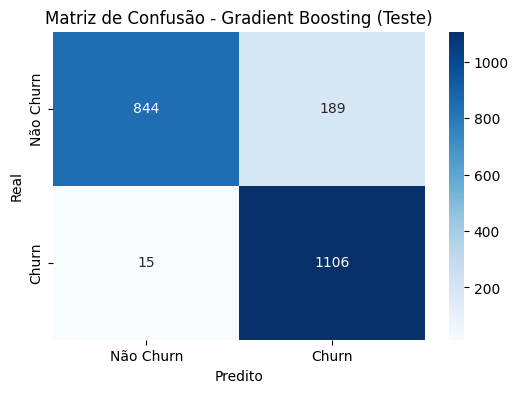

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import StratifiedKFold
from scipy.stats import ks_2samp
import optuna
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Objective function for Optuna - Gradient Boosting (KS calculado manualmente)
def objective_gb(trial):
    print(f"Starting Trial {trial.number}")

    # Hiperparâmetros sugeridos pelo Optuna
    n_estimators = trial.suggest_int('n_estimators', 50, 500)
    learning_rate = trial.suggest_float('learning_rate', 0.001, 0.2, log=True)
    max_depth = trial.suggest_int('max_depth', 3, 10)
    min_samples_split = trial.suggest_int('min_samples_split', 2, 20)
    min_samples_leaf = trial.suggest_int('min_samples_leaf', 1, 10)
    subsample = trial.suggest_float('subsample', 0.6, 1.0)

    model = GradientBoostingClassifier(
        n_estimators=n_estimators,
        learning_rate=learning_rate,
        max_depth=max_depth,
        min_samples_split=min_samples_split,
        min_samples_leaf=min_samples_leaf,
        subsample=subsample,
        random_state=42
    )

    skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    ks_scores = []

    for fold, (train_idx, val_idx) in enumerate(skf.split(X_trainval_trees, y_trainval_trees), 1):
        X_tr, X_val = X_trainval_trees[train_idx], X_trainval_trees[val_idx]
        y_tr, y_val = y_trainval_trees[train_idx], y_trainval_trees[val_idx]

        model.fit(X_tr, y_tr)
        y_pred_prob = model.predict_proba(X_val)[:, 1]  # Probabilidade da classe positiva

        ks_value = ks_2samp(y_pred_prob[y_val == 0], y_pred_prob[y_val == 1]).statistic
        ks_scores.append(ks_value)

        print(f"  Fold {fold} KS: {ks_value:.4f}")

    mean_ks = np.mean(ks_scores)
    print(f"Trial {trial.number} finished with mean KS: {mean_ks:.4f}")
    return mean_ks

print("Realizando otimização de hiperparâmetros para Gradient Boosting com Optuna...")

study_gb = optuna.create_study(direction='maximize')  # Maximize KS score
study_gb.optimize(objective_gb, n_trials=20)  # Run 50 trials (adjust as needed)

print("Otimização de hiperparâmetros para Gradient Boosting concluída.")
print(f"Melhores hiperparâmetros para Gradient Boosting: {study_gb.best_params}")
print(f"Melhor KS score (CV) para Gradient Boosting: {study_gb.best_value:.4f}")

# Treinar o melhor modelo no conjunto de treino+validação
best_gb_model = GradientBoostingClassifier(**study_gb.best_params, random_state=42)
best_gb_model.fit(X_trainval_trees, y_trainval_trees)

# Avaliar no conjunto de teste
print("\nAvaliação do melhor modelo Gradient Boosting no conjunto de teste:")
avaliar_modelo(best_gb_model, X_test_trees, y_test_trees)

# Matriz de confusão
print("\nMatriz de Confusão (Teste):")
cm_gb_test = confusion_matrix(y_test_trees, best_gb_model.predict(X_test_trees))
plt.figure(figsize=(6, 4))
sns.heatmap(cm_gb_test, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Não Churn', 'Churn'], yticklabels=['Não Churn', 'Churn'])
plt.xlabel('Predito')
plt.ylabel('Real')
plt.title('Matriz de Confusão - Gradient Boosting (Teste)')
plt.show()


[I 2025-08-09 21:32:27,516] A new study created in memory with name: no-name-cf61b781-afb9-43d9-a37f-f8ad893752e5


Realizando otimização de hiperparâmetros para XGBoost com Optuna...
Starting Trial 0
  Fold 1 KS: 0.5675
  Fold 2 KS: 0.5856
  Fold 3 KS: 0.5802
  Fold 4 KS: 0.5393


[I 2025-08-09 21:32:29,412] Trial 0 finished with value: 0.5676933024199446 and parameters: {'n_estimators': 153, 'max_depth': 6, 'learning_rate': 0.2547449015896853, 'subsample': 0.6842801314193581, 'colsample_bytree': 0.9960421904659312, 'min_child_weight': 8, 'gamma': 3.9067168850261895}. Best is trial 0 with value: 0.5676933024199446.


  Fold 5 KS: 0.5660
Trial 0 finished with mean KS: 0.5677
Starting Trial 1
  Fold 1 KS: 0.5794
  Fold 2 KS: 0.5889
  Fold 3 KS: 0.5810
  Fold 4 KS: 0.5380


[I 2025-08-09 21:32:34,758] Trial 1 finished with value: 0.5713015437594581 and parameters: {'n_estimators': 465, 'max_depth': 6, 'learning_rate': 0.01705614763781746, 'subsample': 0.8546059083635171, 'colsample_bytree': 0.889787145395255, 'min_child_weight': 5, 'gamma': 4.886700426617708}. Best is trial 1 with value: 0.5713015437594581.


  Fold 5 KS: 0.5693
Trial 1 finished with mean KS: 0.5713
Starting Trial 2
  Fold 1 KS: 0.5755
  Fold 2 KS: 0.5764
  Fold 3 KS: 0.5632
  Fold 4 KS: 0.5284


[I 2025-08-09 21:32:36,233] Trial 2 finished with value: 0.5626561516031771 and parameters: {'n_estimators': 478, 'max_depth': 7, 'learning_rate': 0.25982413309822533, 'subsample': 0.5582813810603289, 'colsample_bytree': 0.6897922426643095, 'min_child_weight': 8, 'gamma': 4.9308394056086255}. Best is trial 1 with value: 0.5713015437594581.


  Fold 5 KS: 0.5697
Trial 2 finished with mean KS: 0.5627
Starting Trial 3
  Fold 1 KS: 0.6035
  Fold 2 KS: 0.6198
  Fold 3 KS: 0.6333
  Fold 4 KS: 0.6033


[I 2025-08-09 21:32:37,361] Trial 3 finished with value: 0.6155723637632999 and parameters: {'n_estimators': 242, 'max_depth': 10, 'learning_rate': 0.1531742216716238, 'subsample': 0.6275213059890463, 'colsample_bytree': 0.9382092188054649, 'min_child_weight': 2, 'gamma': 2.7135340799927894}. Best is trial 3 with value: 0.6155723637632999.


  Fold 5 KS: 0.6179
Trial 3 finished with mean KS: 0.6156
Starting Trial 4
  Fold 1 KS: 0.6105
  Fold 2 KS: 0.6333
  Fold 3 KS: 0.6181
  Fold 4 KS: 0.6051


[I 2025-08-09 21:32:39,548] Trial 4 finished with value: 0.6158239842852993 and parameters: {'n_estimators': 362, 'max_depth': 6, 'learning_rate': 0.0767934974914051, 'subsample': 0.5336693738251349, 'colsample_bytree': 0.8438756946753365, 'min_child_weight': 4, 'gamma': 1.568309764512198}. Best is trial 4 with value: 0.6158239842852993.


  Fold 5 KS: 0.6120
Trial 4 finished with mean KS: 0.6158
Starting Trial 5
  Fold 1 KS: 0.5950
  Fold 2 KS: 0.6029
  Fold 3 KS: 0.5941
  Fold 4 KS: 0.5547


[I 2025-08-09 21:32:41,286] Trial 5 finished with value: 0.5865010163193467 and parameters: {'n_estimators': 403, 'max_depth': 7, 'learning_rate': 0.04172705840239092, 'subsample': 0.6543652793854037, 'colsample_bytree': 0.6589960083899249, 'min_child_weight': 1, 'gamma': 3.4688011031003647}. Best is trial 4 with value: 0.6158239842852993.


  Fold 5 KS: 0.5858
Trial 5 finished with mean KS: 0.5865
Starting Trial 6
  Fold 1 KS: 0.6133
  Fold 2 KS: 0.6201
  Fold 3 KS: 0.6256


[I 2025-08-09 21:32:42,061] Trial 6 finished with value: 0.6147735859280223 and parameters: {'n_estimators': 118, 'max_depth': 5, 'learning_rate': 0.226238856617536, 'subsample': 0.8029222771944954, 'colsample_bytree': 0.7561778139056905, 'min_child_weight': 3, 'gamma': 0.7559515280423018}. Best is trial 4 with value: 0.6158239842852993.


  Fold 4 KS: 0.6077
  Fold 5 KS: 0.6071
Trial 6 finished with mean KS: 0.6148
Starting Trial 7
  Fold 1 KS: 0.5935
  Fold 2 KS: 0.6045
  Fold 3 KS: 0.6062
  Fold 4 KS: 0.5647


[I 2025-08-09 21:32:43,469] Trial 7 finished with value: 0.5927808155767446 and parameters: {'n_estimators': 409, 'max_depth': 6, 'learning_rate': 0.1600025734996666, 'subsample': 0.7487058272184842, 'colsample_bytree': 0.7478432100161084, 'min_child_weight': 7, 'gamma': 2.191049720713562}. Best is trial 4 with value: 0.6158239842852993.


  Fold 5 KS: 0.5950
Trial 7 finished with mean KS: 0.5928
Starting Trial 8
  Fold 1 KS: 0.5780
  Fold 2 KS: 0.5905
  Fold 3 KS: 0.5970
  Fold 4 KS: 0.5451


[I 2025-08-09 21:32:47,113] Trial 8 finished with value: 0.5767159323774942 and parameters: {'n_estimators': 486, 'max_depth': 6, 'learning_rate': 0.0524098847991853, 'subsample': 0.9321635895459561, 'colsample_bytree': 0.6378437881993264, 'min_child_weight': 1, 'gamma': 4.480252286766538}. Best is trial 4 with value: 0.6158239842852993.


  Fold 5 KS: 0.5730
Trial 8 finished with mean KS: 0.5767
Starting Trial 9
  Fold 1 KS: 0.5912
  Fold 2 KS: 0.5898
  Fold 3 KS: 0.5930
  Fold 4 KS: 0.5575


[I 2025-08-09 21:32:48,515] Trial 9 finished with value: 0.5813747349965557 and parameters: {'n_estimators': 329, 'max_depth': 3, 'learning_rate': 0.08675997208271626, 'subsample': 0.7163949657843236, 'colsample_bytree': 0.711087215376994, 'min_child_weight': 2, 'gamma': 0.6092028038746683}. Best is trial 4 with value: 0.6158239842852993.


  Fold 5 KS: 0.5753
Trial 9 finished with mean KS: 0.5814
Starting Trial 10
  Fold 1 KS: 0.5953
  Fold 2 KS: 0.6024
  Fold 3 KS: 0.6050
  Fold 4 KS: 0.5693


[I 2025-08-09 21:32:50,789] Trial 10 finished with value: 0.5946378288716047 and parameters: {'n_estimators': 278, 'max_depth': 9, 'learning_rate': 0.023446793692516357, 'subsample': 0.5117906443954605, 'colsample_bytree': 0.5037030812586913, 'min_child_weight': 5, 'gamma': 1.6750569202880277}. Best is trial 4 with value: 0.6158239842852993.


  Fold 5 KS: 0.6012
Trial 10 finished with mean KS: 0.5946
Starting Trial 11
  Fold 1 KS: 0.5964
  Fold 2 KS: 0.6021
  Fold 3 KS: 0.6031
  Fold 4 KS: 0.5740


[I 2025-08-09 21:32:51,950] Trial 11 finished with value: 0.5963028133207341 and parameters: {'n_estimators': 223, 'max_depth': 10, 'learning_rate': 0.10315833995213895, 'subsample': 0.5971775013272526, 'colsample_bytree': 0.8739868865294309, 'min_child_weight': 4, 'gamma': 2.9989759130913107}. Best is trial 4 with value: 0.6158239842852993.


  Fold 5 KS: 0.6059
Trial 11 finished with mean KS: 0.5963
Starting Trial 12
  Fold 1 KS: 0.6311
  Fold 2 KS: 0.6550
  Fold 3 KS: 0.6522
  Fold 4 KS: 0.6211


[I 2025-08-09 21:32:53,557] Trial 12 finished with value: 0.6403377681677285 and parameters: {'n_estimators': 206, 'max_depth': 9, 'learning_rate': 0.09865114137437887, 'subsample': 0.5974075842374256, 'colsample_bytree': 0.8890603665709849, 'min_child_weight': 3, 'gamma': 1.5677091431715446}. Best is trial 12 with value: 0.6403377681677285.


  Fold 5 KS: 0.6423
Trial 12 finished with mean KS: 0.6403
Starting Trial 13
  Fold 1 KS: 0.5951
  Fold 2 KS: 0.6016
  Fold 3 KS: 0.6036
  Fold 4 KS: 0.5520


[I 2025-08-09 21:32:54,407] Trial 13 finished with value: 0.58875034403803 and parameters: {'n_estimators': 74, 'max_depth': 8, 'learning_rate': 0.07424602331107795, 'subsample': 0.5916578572272253, 'colsample_bytree': 0.8070933740006436, 'min_child_weight': 10, 'gamma': 1.4817566002696627}. Best is trial 12 with value: 0.6403377681677285.


  Fold 5 KS: 0.5915
Trial 13 finished with mean KS: 0.5888
Starting Trial 14
  Fold 1 KS: 0.5750
  Fold 2 KS: 0.5895
  Fold 3 KS: 0.5949
  Fold 4 KS: 0.5513


[I 2025-08-09 21:32:56,202] Trial 14 finished with value: 0.5778800035871757 and parameters: {'n_estimators': 325, 'max_depth': 4, 'learning_rate': 0.03558459604937381, 'subsample': 0.5084123928754588, 'colsample_bytree': 0.8294976824326925, 'min_child_weight': 4, 'gamma': 1.369727285971373}. Best is trial 12 with value: 0.6403377681677285.


  Fold 5 KS: 0.5787
Trial 14 finished with mean KS: 0.5779
Starting Trial 15
  Fold 1 KS: 0.6054
  Fold 2 KS: 0.6134
  Fold 3 KS: 0.6152
  Fold 4 KS: 0.5786


[I 2025-08-09 21:32:59,055] Trial 15 finished with value: 0.6035420570225665 and parameters: {'n_estimators': 194, 'max_depth': 8, 'learning_rate': 0.1281130680310758, 'subsample': 0.5690766006879897, 'colsample_bytree': 0.9522042108048883, 'min_child_weight': 6, 'gamma': 2.1409190793711588}. Best is trial 12 with value: 0.6403377681677285.


  Fold 5 KS: 0.6051
Trial 15 finished with mean KS: 0.6035
Starting Trial 16
  Fold 1 KS: 0.6821
  Fold 2 KS: 0.6743
  Fold 3 KS: 0.6881
  Fold 4 KS: 0.6771


[I 2025-08-09 21:33:02,120] Trial 16 finished with value: 0.6815884932244385 and parameters: {'n_estimators': 315, 'max_depth': 8, 'learning_rate': 0.07042388766941474, 'subsample': 0.977647517246125, 'colsample_bytree': 0.8439953031531022, 'min_child_weight': 3, 'gamma': 0.22366510073414236}. Best is trial 16 with value: 0.6815884932244385.


  Fold 5 KS: 0.6864
Trial 16 finished with mean KS: 0.6816
Starting Trial 17
  Fold 1 KS: 0.6701
  Fold 2 KS: 0.6667
  Fold 3 KS: 0.6753
  Fold 4 KS: 0.6654


[I 2025-08-09 21:33:06,309] Trial 17 finished with value: 0.6715593547265666 and parameters: {'n_estimators': 280, 'max_depth': 9, 'learning_rate': 0.02852310842030032, 'subsample': 0.9483851243639443, 'colsample_bytree': 0.914383600190685, 'min_child_weight': 3, 'gamma': 0.043628393727846076}. Best is trial 16 with value: 0.6815884932244385.


  Fold 5 KS: 0.6803
Trial 17 finished with mean KS: 0.6716
Starting Trial 18
  Fold 1 KS: 0.6496
  Fold 2 KS: 0.6497
  Fold 3 KS: 0.6525
  Fold 4 KS: 0.6353


[I 2025-08-09 21:33:09,694] Trial 18 finished with value: 0.6487847450454932 and parameters: {'n_estimators': 288, 'max_depth': 8, 'learning_rate': 0.027352522853711966, 'subsample': 0.9926433008869059, 'colsample_bytree': 0.7938166042641165, 'min_child_weight': 3, 'gamma': 0.04565974290818925}. Best is trial 16 with value: 0.6815884932244385.


  Fold 5 KS: 0.6568
Trial 18 finished with mean KS: 0.6488
Starting Trial 19
  Fold 1 KS: 0.6579
  Fold 2 KS: 0.6665
  Fold 3 KS: 0.6644
  Fold 4 KS: 0.6456


[I 2025-08-09 21:33:18,879] Trial 19 finished with value: 0.6598823025466694 and parameters: {'n_estimators': 382, 'max_depth': 9, 'learning_rate': 0.010182009073760366, 'subsample': 0.9140912781304743, 'colsample_bytree': 0.9563012107100568, 'min_child_weight': 2, 'gamma': 0.3470930749134187}. Best is trial 16 with value: 0.6815884932244385.


  Fold 5 KS: 0.6651
Trial 19 finished with mean KS: 0.6599
Starting Trial 20
  Fold 1 KS: 0.6200
  Fold 2 KS: 0.6480
  Fold 3 KS: 0.6410
  Fold 4 KS: 0.6059


[I 2025-08-09 21:33:22,651] Trial 20 finished with value: 0.6278865658677999 and parameters: {'n_estimators': 308, 'max_depth': 10, 'learning_rate': 0.016310544405712498, 'subsample': 0.9784861808474506, 'colsample_bytree': 0.5451204883463823, 'min_child_weight': 6, 'gamma': 0.9024460997961608}. Best is trial 16 with value: 0.6815884932244385.


  Fold 5 KS: 0.6244
Trial 20 finished with mean KS: 0.6279
Starting Trial 21
  Fold 1 KS: 0.6633
  Fold 2 KS: 0.6741
  Fold 3 KS: 0.6717
  Fold 4 KS: 0.6565


[I 2025-08-09 21:33:31,561] Trial 21 finished with value: 0.6685508440939735 and parameters: {'n_estimators': 389, 'max_depth': 9, 'learning_rate': 0.01228008134991388, 'subsample': 0.9048048192349729, 'colsample_bytree': 0.9474652802303695, 'min_child_weight': 2, 'gamma': 0.06792253979878639}. Best is trial 16 with value: 0.6815884932244385.


  Fold 5 KS: 0.6772
Trial 21 finished with mean KS: 0.6686
Starting Trial 22
  Fold 1 KS: 0.6800
  Fold 2 KS: 0.6877
  Fold 3 KS: 0.6840
  Fold 4 KS: 0.6711


[I 2025-08-09 21:33:42,165] Trial 22 finished with value: 0.6824697716513313 and parameters: {'n_estimators': 429, 'max_depth': 9, 'learning_rate': 0.01043851049928874, 'subsample': 0.8635169951926301, 'colsample_bytree': 0.9196734045484158, 'min_child_weight': 1, 'gamma': 0.0769314344099119}. Best is trial 22 with value: 0.6824697716513313.


  Fold 5 KS: 0.6895
Trial 22 finished with mean KS: 0.6825
Starting Trial 23
  Fold 1 KS: 0.6672
  Fold 2 KS: 0.6775
  Fold 3 KS: 0.6653
  Fold 4 KS: 0.6570


[I 2025-08-09 21:33:44,691] Trial 23 finished with value: 0.6679947050141686 and parameters: {'n_estimators': 434, 'max_depth': 8, 'learning_rate': 0.05681182512986557, 'subsample': 0.8618874555566172, 'colsample_bytree': 0.9088346145445275, 'min_child_weight': 1, 'gamma': 1.022925085489993}. Best is trial 22 with value: 0.6824697716513313.


  Fold 5 KS: 0.6730
Trial 23 finished with mean KS: 0.6680
Starting Trial 24
  Fold 1 KS: 0.6649
  Fold 2 KS: 0.6767
  Fold 3 KS: 0.6904
  Fold 4 KS: 0.6665


[I 2025-08-09 21:33:51,286] Trial 24 finished with value: 0.675041039128104 and parameters: {'n_estimators': 353, 'max_depth': 9, 'learning_rate': 0.02667966687377071, 'subsample': 0.9484802541643894, 'colsample_bytree': 0.9868020592613586, 'min_child_weight': 3, 'gamma': 0.38414244389163743}. Best is trial 22 with value: 0.6824697716513313.


  Fold 5 KS: 0.6767
Trial 24 finished with mean KS: 0.6750
Starting Trial 25
  Fold 1 KS: 0.6383
  Fold 2 KS: 0.6456
  Fold 3 KS: 0.6516
  Fold 4 KS: 0.6254


[I 2025-08-09 21:33:55,266] Trial 25 finished with value: 0.6421171931878603 and parameters: {'n_estimators': 349, 'max_depth': 7, 'learning_rate': 0.019626969048370593, 'subsample': 0.8574785751976056, 'colsample_bytree': 0.9911684343746476, 'min_child_weight': 1, 'gamma': 0.47636832008750485}. Best is trial 22 with value: 0.6824697716513313.


  Fold 5 KS: 0.6498
Trial 25 finished with mean KS: 0.6421
Starting Trial 26
  Fold 1 KS: 0.6170
  Fold 2 KS: 0.6264
  Fold 3 KS: 0.6347
  Fold 4 KS: 0.6042


[I 2025-08-09 21:34:00,007] Trial 26 finished with value: 0.6226974969469959 and parameters: {'n_estimators': 436, 'max_depth': 8, 'learning_rate': 0.013021057609181225, 'subsample': 0.7969047104307585, 'colsample_bytree': 0.8579487974310075, 'min_child_weight': 4, 'gamma': 1.1049297383525307}. Best is trial 22 with value: 0.6824697716513313.


  Fold 5 KS: 0.6312
Trial 26 finished with mean KS: 0.6227
Starting Trial 27
  Fold 1 KS: 0.7034
  Fold 2 KS: 0.6890
  Fold 3 KS: 0.6967
  Fold 4 KS: 0.7061


[I 2025-08-09 21:34:05,601] Trial 27 finished with value: 0.6980146310091017 and parameters: {'n_estimators': 434, 'max_depth': 10, 'learning_rate': 0.05548130766090206, 'subsample': 0.9630988506696606, 'colsample_bytree': 0.9966152005794702, 'min_child_weight': 2, 'gamma': 0.4495888361209627}. Best is trial 27 with value: 0.6980146310091017.


  Fold 5 KS: 0.6949
Trial 27 finished with mean KS: 0.6980
Starting Trial 28
  Fold 1 KS: 0.6378
  Fold 2 KS: 0.6489
  Fold 3 KS: 0.6493
  Fold 4 KS: 0.6321


[I 2025-08-09 21:34:07,763] Trial 28 finished with value: 0.6429886481833574 and parameters: {'n_estimators': 444, 'max_depth': 10, 'learning_rate': 0.060551698909925476, 'subsample': 0.8826688003917189, 'colsample_bytree': 0.9130815163943505, 'min_child_weight': 2, 'gamma': 1.989730858867904}. Best is trial 27 with value: 0.6980146310091017.


  Fold 5 KS: 0.6468
Trial 28 finished with mean KS: 0.6430
Starting Trial 29
  Fold 1 KS: 0.6194
  Fold 2 KS: 0.6288
  Fold 3 KS: 0.6333
  Fold 4 KS: 0.6072


[I 2025-08-09 21:34:11,124] Trial 29 finished with value: 0.6227215120504556 and parameters: {'n_estimators': 491, 'max_depth': 10, 'learning_rate': 0.04594456580107169, 'subsample': 0.8075286218211595, 'colsample_bytree': 0.9947305456329989, 'min_child_weight': 10, 'gamma': 1.0813836347774501}. Best is trial 27 with value: 0.6980146310091017.


  Fold 5 KS: 0.6249
Trial 29 finished with mean KS: 0.6227
Starting Trial 30
  Fold 1 KS: 0.6307
  Fold 2 KS: 0.6332
  Fold 3 KS: 0.6421
  Fold 4 KS: 0.6176


[I 2025-08-09 21:34:13,166] Trial 30 finished with value: 0.6313093728058286 and parameters: {'n_estimators': 168, 'max_depth': 7, 'learning_rate': 0.03436369437439761, 'subsample': 0.9987522543698424, 'colsample_bytree': 0.7893287456262738, 'min_child_weight': 1, 'gamma': 0.4584261918219572}. Best is trial 27 with value: 0.6980146310091017.


  Fold 5 KS: 0.6330
Trial 30 finished with mean KS: 0.6313
Starting Trial 31
  Fold 1 KS: 0.6875
  Fold 2 KS: 0.6784
  Fold 3 KS: 0.6916
  Fold 4 KS: 0.6790


[I 2025-08-09 21:34:19,409] Trial 31 finished with value: 0.6853245407730688 and parameters: {'n_estimators': 361, 'max_depth': 9, 'learning_rate': 0.03846190226016941, 'subsample': 0.9550584350836445, 'colsample_bytree': 0.9971437984552833, 'min_child_weight': 3, 'gamma': 0.3254875751554953}. Best is trial 27 with value: 0.6980146310091017.


  Fold 5 KS: 0.6901
Trial 31 finished with mean KS: 0.6853
Starting Trial 32
  Fold 1 KS: 0.7176
  Fold 2 KS: 0.7083
  Fold 3 KS: 0.7228
  Fold 4 KS: 0.7205


[I 2025-08-09 21:34:22,841] Trial 32 finished with value: 0.7157690830871057 and parameters: {'n_estimators': 422, 'max_depth': 9, 'learning_rate': 0.06814440125577885, 'subsample': 0.9671588186302648, 'colsample_bytree': 0.9738152490811766, 'min_child_weight': 2, 'gamma': 0.25882898976379287}. Best is trial 32 with value: 0.7157690830871057.


  Fold 5 KS: 0.7097
Trial 32 finished with mean KS: 0.7158
Starting Trial 33
  Fold 1 KS: 0.6949
  Fold 2 KS: 0.6996
  Fold 3 KS: 0.6931
  Fold 4 KS: 0.6866


[I 2025-08-09 21:34:26,394] Trial 33 finished with value: 0.6935623519071876 and parameters: {'n_estimators': 423, 'max_depth': 10, 'learning_rate': 0.046422772579888874, 'subsample': 0.8900533879834376, 'colsample_bytree': 0.9932784406544971, 'min_child_weight': 2, 'gamma': 0.7165939650127799}. Best is trial 32 with value: 0.7157690830871057.


  Fold 5 KS: 0.6937
Trial 33 finished with mean KS: 0.6936
Starting Trial 34
  Fold 1 KS: 0.6834
  Fold 2 KS: 0.6941
  Fold 3 KS: 0.6936
  Fold 4 KS: 0.6849


[I 2025-08-09 21:34:32,322] Trial 34 finished with value: 0.6880420728308362 and parameters: {'n_estimators': 461, 'max_depth': 10, 'learning_rate': 0.03921652305763492, 'subsample': 0.9584217390548844, 'colsample_bytree': 0.9714349723533002, 'min_child_weight': 2, 'gamma': 0.7146307975620649}. Best is trial 32 with value: 0.7157690830871057.


  Fold 5 KS: 0.6843
Trial 34 finished with mean KS: 0.6880
Starting Trial 35
  Fold 1 KS: 0.6894
  Fold 2 KS: 0.6964
  Fold 3 KS: 0.6882
  Fold 4 KS: 0.6893


[I 2025-08-09 21:34:35,631] Trial 35 finished with value: 0.690048761794047 and parameters: {'n_estimators': 500, 'max_depth': 10, 'learning_rate': 0.05122768183329701, 'subsample': 0.9167206215319893, 'colsample_bytree': 0.9610771093666365, 'min_child_weight': 2, 'gamma': 0.7803457528095936}. Best is trial 32 with value: 0.7157690830871057.


  Fold 5 KS: 0.6869
Trial 35 finished with mean KS: 0.6900
Starting Trial 36
  Fold 1 KS: 0.6370
  Fold 2 KS: 0.6447
  Fold 3 KS: 0.6530
  Fold 4 KS: 0.6335


[I 2025-08-09 21:34:38,225] Trial 36 finished with value: 0.640528113683722 and parameters: {'n_estimators': 464, 'max_depth': 10, 'learning_rate': 0.050736355281462496, 'subsample': 0.900553664868905, 'colsample_bytree': 0.9345650437722846, 'min_child_weight': 5, 'gamma': 1.2654819375775213}. Best is trial 32 with value: 0.7157690830871057.


  Fold 5 KS: 0.6344
Trial 36 finished with mean KS: 0.6405
Starting Trial 37
  Fold 1 KS: 0.6291
  Fold 2 KS: 0.6643
  Fold 3 KS: 0.6360
  Fold 4 KS: 0.6350


[I 2025-08-09 21:34:43,482] Trial 37 finished with value: 0.6426329185266183 and parameters: {'n_estimators': 413, 'max_depth': 10, 'learning_rate': 0.06385714472520328, 'subsample': 0.8351556329693989, 'colsample_bytree': 0.9744002410457748, 'min_child_weight': 9, 'gamma': 0.7669019586942577}. Best is trial 32 with value: 0.7157690830871057.


  Fold 5 KS: 0.6486
Trial 37 finished with mean KS: 0.6426
Starting Trial 38
  Fold 1 KS: 0.6135
  Fold 2 KS: 0.6348
  Fold 3 KS: 0.6420
  Fold 4 KS: 0.5958


[I 2025-08-09 21:34:45,135] Trial 38 finished with value: 0.619708485284653 and parameters: {'n_estimators': 499, 'max_depth': 10, 'learning_rate': 0.1195900394871986, 'subsample': 0.9268135212856247, 'colsample_bytree': 0.8796328892904326, 'min_child_weight': 2, 'gamma': 2.7774002350958873}. Best is trial 32 with value: 0.7157690830871057.


  Fold 5 KS: 0.6124
Trial 38 finished with mean KS: 0.6197
Starting Trial 39
  Fold 1 KS: 0.5925
  Fold 2 KS: 0.6173
  Fold 3 KS: 0.5975
  Fold 4 KS: 0.5693


[I 2025-08-09 21:34:46,856] Trial 39 finished with value: 0.5929637863049211 and parameters: {'n_estimators': 459, 'max_depth': 10, 'learning_rate': 0.08905869632909653, 'subsample': 0.7638635295359977, 'colsample_bytree': 0.9612192154436001, 'min_child_weight': 4, 'gamma': 3.692843063778484}. Best is trial 32 with value: 0.7157690830871057.


  Fold 5 KS: 0.5882
Trial 39 finished with mean KS: 0.5930
Starting Trial 40
  Fold 1 KS: 0.5915
  Fold 2 KS: 0.5998
  Fold 3 KS: 0.6063
  Fold 4 KS: 0.5644


[I 2025-08-09 21:34:48,740] Trial 40 finished with value: 0.5908984759847973 and parameters: {'n_estimators': 391, 'max_depth': 5, 'learning_rate': 0.04387065771845036, 'subsample': 0.8867504247117753, 'colsample_bytree': 0.939006585333476, 'min_child_weight': 2, 'gamma': 1.7988449630769803}. Best is trial 32 with value: 0.7157690830871057.


  Fold 5 KS: 0.5924
Trial 40 finished with mean KS: 0.5909
Starting Trial 41
  Fold 1 KS: 0.6867
  Fold 2 KS: 0.6971
  Fold 3 KS: 0.6977
  Fold 4 KS: 0.6927


[I 2025-08-09 21:34:51,989] Trial 41 finished with value: 0.6915674648890031 and parameters: {'n_estimators': 454, 'max_depth': 10, 'learning_rate': 0.049703245923413165, 'subsample': 0.969402202890422, 'colsample_bytree': 0.9696097092386105, 'min_child_weight': 2, 'gamma': 0.6647647389004501}. Best is trial 32 with value: 0.7157690830871057.


  Fold 5 KS: 0.6836
Trial 41 finished with mean KS: 0.6916
Starting Trial 42
  Fold 1 KS: 0.7029
  Fold 2 KS: 0.7037
  Fold 3 KS: 0.7130
  Fold 4 KS: 0.7093


[I 2025-08-09 21:34:57,731] Trial 42 finished with value: 0.708088955487826 and parameters: {'n_estimators': 470, 'max_depth': 10, 'learning_rate': 0.04890285752048121, 'subsample': 0.9704763573808676, 'colsample_bytree': 0.9725589365797216, 'min_child_weight': 1, 'gamma': 0.6148179935720152}. Best is trial 32 with value: 0.7157690830871057.


  Fold 5 KS: 0.7115
Trial 42 finished with mean KS: 0.7081
Starting Trial 43
  Fold 1 KS: 0.6915
  Fold 2 KS: 0.6891
  Fold 3 KS: 0.7023
  Fold 4 KS: 0.6805


[I 2025-08-09 21:35:02,057] Trial 43 finished with value: 0.6904456308271878 and parameters: {'n_estimators': 418, 'max_depth': 9, 'learning_rate': 0.03227719553246494, 'subsample': 0.9721383596228151, 'colsample_bytree': 0.9999010747511775, 'min_child_weight': 1, 'gamma': 0.5802780725195544}. Best is trial 32 with value: 0.7157690830871057.


  Fold 5 KS: 0.6887
Trial 43 finished with mean KS: 0.6904
Starting Trial 44
  Fold 1 KS: 0.6028
  Fold 2 KS: 0.6180
  Fold 3 KS: 0.6101
  Fold 4 KS: 0.5695


[I 2025-08-09 21:35:03,852] Trial 44 finished with value: 0.5985920389601378 and parameters: {'n_estimators': 473, 'max_depth': 10, 'learning_rate': 0.06710631638117633, 'subsample': 0.9345504320335591, 'colsample_bytree': 0.9250376361636778, 'min_child_weight': 1, 'gamma': 4.53280941121716}. Best is trial 32 with value: 0.7157690830871057.


  Fold 5 KS: 0.5925
Trial 44 finished with mean KS: 0.5986
Starting Trial 45
  Fold 1 KS: 0.6600
  Fold 2 KS: 0.6754
  Fold 3 KS: 0.6650
  Fold 4 KS: 0.6512


[I 2025-08-09 21:35:06,513] Trial 45 finished with value: 0.6633278055790706 and parameters: {'n_estimators': 451, 'max_depth': 9, 'learning_rate': 0.08226573743111343, 'subsample': 0.9966131971625491, 'colsample_bytree': 0.9745239954679004, 'min_child_weight': 2, 'gamma': 0.9983012383396446}. Best is trial 32 with value: 0.7157690830871057.


  Fold 5 KS: 0.6650
Trial 45 finished with mean KS: 0.6633
Starting Trial 46
  Fold 1 KS: 0.6382
  Fold 2 KS: 0.6500
  Fold 3 KS: 0.6513
  Fold 4 KS: 0.6310


[I 2025-08-09 21:35:11,528] Trial 46 finished with value: 0.6443276937037739 and parameters: {'n_estimators': 407, 'max_depth': 10, 'learning_rate': 0.047896448427569155, 'subsample': 0.9368820406068518, 'colsample_bytree': 0.8921806953062895, 'min_child_weight': 7, 'gamma': 0.5572405535766531}. Best is trial 32 with value: 0.7157690830871057.


  Fold 5 KS: 0.6512
Trial 46 finished with mean KS: 0.6443
Starting Trial 47
  Fold 1 KS: 0.6597
  Fold 2 KS: 0.6689
  Fold 3 KS: 0.6651
  Fold 4 KS: 0.6374


[I 2025-08-09 21:35:13,530] Trial 47 finished with value: 0.6594780815709006 and parameters: {'n_estimators': 372, 'max_depth': 9, 'learning_rate': 0.05864743058647385, 'subsample': 0.9687181269340079, 'colsample_bytree': 0.6118650579427072, 'min_child_weight': 1, 'gamma': 1.2348648333766552}. Best is trial 32 with value: 0.7157690830871057.


  Fold 5 KS: 0.6663
Trial 47 finished with mean KS: 0.6595
Starting Trial 48
  Fold 1 KS: 0.5886
  Fold 2 KS: 0.6206
  Fold 3 KS: 0.6118
  Fold 4 KS: 0.5885


[I 2025-08-09 21:35:15,116] Trial 48 finished with value: 0.6017607274350747 and parameters: {'n_estimators': 471, 'max_depth': 10, 'learning_rate': 0.2868927112184322, 'subsample': 0.6824843908335555, 'colsample_bytree': 0.945392293004511, 'min_child_weight': 3, 'gamma': 3.2853437274689514}. Best is trial 32 with value: 0.7157690830871057.


  Fold 5 KS: 0.5994
Trial 48 finished with mean KS: 0.6018
Starting Trial 49
  Fold 1 KS: 0.6195
  Fold 2 KS: 0.6057
  Fold 3 KS: 0.6204
  Fold 4 KS: 0.5999


[I 2025-08-09 21:35:16,924] Trial 49 finished with value: 0.6097706187287062 and parameters: {'n_estimators': 426, 'max_depth': 3, 'learning_rate': 0.188924986562924, 'subsample': 0.8336222261160858, 'colsample_bytree': 0.972116360194139, 'min_child_weight': 2, 'gamma': 0.8259485530346433}. Best is trial 32 with value: 0.7157690830871057.


  Fold 5 KS: 0.6034
Trial 49 finished with mean KS: 0.6098
Otimização de hiperparâmetros para XGBoost concluída.
Melhores hiperparâmetros para XGBoost: {'n_estimators': 422, 'max_depth': 9, 'learning_rate': 0.06814440125577885, 'subsample': 0.9671588186302648, 'colsample_bytree': 0.9738152490811766, 'min_child_weight': 2, 'gamma': 0.25882898976379287}
Melhor KS score (CV) para XGBoost: 0.7158


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [21:35:16] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



Avaliação do melhor modelo XGBoost no conjunto de teste:
📊 Classification Report:
              precision    recall  f1-score   support

   Não Churn       0.94      0.76      0.84      1033
       Churn       0.81      0.96      0.88      1121

    accuracy                           0.86      2154
   macro avg       0.88      0.86      0.86      2154
weighted avg       0.88      0.86      0.86      2154

MSE: 0.1365
MAE: 0.1365
ROC AUC: 0.9202
KS: 0.7336
F1 Score: 0.8794

Matriz de Confusão (Teste):


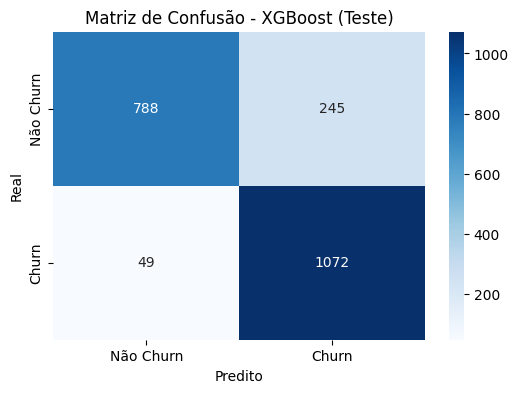

In [ ]:
from xgboost import XGBClassifier
from sklearn.model_selection import StratifiedKFold
from scipy.stats import ks_2samp
import optuna
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Objective function for Optuna - XGBoost
def objective_xgb(trial):
    print(f"Starting Trial {trial.number}")

    # Hiperparâmetros sugeridos pelo Optuna
    n_estimators = trial.suggest_int('n_estimators', 50, 500)
    max_depth = trial.suggest_int('max_depth', 3, 10)
    learning_rate = trial.suggest_float('learning_rate', 0.01, 0.3, log=True)
    subsample = trial.suggest_float('subsample', 0.5, 1.0)
    colsample_bytree = trial.suggest_float('colsample_bytree', 0.5, 1.0)
    min_child_weight = trial.suggest_int('min_child_weight', 1, 10)
    gamma = trial.suggest_float('gamma', 0.0, 5.0)

    model = XGBClassifier(
        n_estimators=n_estimators,
        max_depth=max_depth,
        learning_rate=learning_rate,
        subsample=subsample,
        colsample_bytree=colsample_bytree,
        min_child_weight=min_child_weight,
        gamma=gamma,
        objective='binary:logistic',
        eval_metric='logloss',
        random_state=42,
        n_jobs=-1
    )

    skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    ks_scores = []

    for fold, (train_idx, val_idx) in enumerate(skf.split(X_trainval_trees, y_trainval_trees), 1):
        X_tr, X_val = X_trainval_trees[train_idx], X_trainval_trees[val_idx]
        y_tr, y_val = y_trainval_trees[train_idx], y_trainval_trees[val_idx]

        model.fit(X_tr, y_tr)
        y_pred_prob = model.predict_proba(X_val)[:, 1]  # Probabilidade da classe positiva

        ks_value = ks_2samp(y_pred_prob[y_val == 0], y_pred_prob[y_val == 1]).statistic
        ks_scores.append(ks_value)

        print(f"  Fold {fold} KS: {ks_value:.4f}")

    mean_ks = np.mean(ks_scores)
    print(f"Trial {trial.number} finished with mean KS: {mean_ks:.4f}")
    return mean_ks

print("Realizando otimização de hiperparâmetros para XGBoost com Optuna...")

study_xgb = optuna.create_study(direction='maximize')
study_xgb.optimize(objective_xgb, n_trials=50)

print("Otimização de hiperparâmetros para XGBoost concluída.")
print(f"Melhores hiperparâmetros para XGBoost: {study_xgb.best_params}")
print(f"Melhor KS score (CV) para XGBoost: {study_xgb.best_value:.4f}")

# Treinar o melhor modelo no conjunto de treino+validação
best_xgb_model = XGBClassifier(**study_xgb.best_params,
                                objective='binary:logistic',
                                eval_metric='logloss',
                                use_label_encoder=False,
                                random_state=42,
                                n_jobs=-1)
best_xgb_model.fit(X_trainval_trees, y_trainval_trees)

# Avaliar no conjunto de teste
print("\nAvaliação do melhor modelo XGBoost no conjunto de teste:")
avaliar_modelo(best_xgb_model, X_test_trees, y_test_trees)

# Matriz de confusão
print("\nMatriz de Confusão (Teste):")
cm_xgb_test = confusion_matrix(y_test_trees, best_xgb_model.predict(X_test_trees))
plt.figure(figsize=(6, 4))
sns.heatmap(cm_xgb_test, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Não Churn', 'Churn'], yticklabels=['Não Churn', 'Churn'])
plt.xlabel('Predito')
plt.ylabel('Real')
plt.title('Matriz de Confusão - XGBoost (Teste)')
plt.show()


# 📊 6. Avaliação (Pessoa 4)

## 6.1. Métricas de avaliação

## 6.2. Visualizações

- Matriz de confusão
- Curvas ROC e Precision-Recall
- Comparação de modelos em tabela

## 7.1. Organização dos notebooks
- Juntar notebooks por responsável
- Separar funções reutilizáveis em arquivo `.py`

## 7.2. Instruções de uso (README.md)
- Como executar o projeto
- Dependências (`requirements.txt`)
- Estrutura de diretórios

# 📎 9. Referências
- [Dataset do Kaggle](https://www.kaggle.com/datasets/kapturovalexander/customers-churned-in-telecom-services/data)
- Germano Vasconcelos (slides)
- Documentação do Scikit-Learn, Keras e XGBoost

## 3.6. Visualização e Análise dos Dados Após Cada Etapa de Pré-processamento

Nesta seção, visualizaremos os dados após cada etapa de pré-processamento para entender as transformações aplicadas e o impacto na estrutura dos dados.